# Machine Learning in Python - Predictive Modelling (MNIST_fashion)



dataset is taken from https://www.kaggle.com/zalando-research/fashionmnist


## import libraries


In [4]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import data_viz_target
from TAS_Python_Utilities import visualize_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors

%matplotlib inline
%qtconsole
print('done')

done


## Load data

In [7]:
dataset = pd.read_csv('fashion-mnist_test.csv')

display 1st 10 rows

In [8]:
dataset.head(10)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0      14      53   
3      2       0       0       0       0       0       0       0       0   
4      3       0       0       0       0       0       0       0       0   
5      2       0       0       0       0       0      44     105      44   
6      8       0       0       0       0       0       0       0       0   
7      6       0       0       0       0       0       0       0       1   
8      5       0       0       0       0       0       0       0       0   
9      0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0       8    ...          103        87        56         0         0   
1       0    ...           34         0         0         0         0   
2      99    ...            0         0         0         0        63   
3       0    ...          137       126       140         0       133   
4       0    ...            0         0         0         0         0   
5      10    ...          105        64        30         0         0   
6       0    ...            0         0         0         0         0   
7       0    ...          174       136       155        31         0   
8       0    ...            0         0         0         0         0   
9       0    ...           57        70        28         0         2   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0         0  
1         0         0         0         0         0  
2        53        31         0         0         0  
3       224       222        56         0         0  
4         0         0         0         0         0  
5         0         0         0         0         0  
6         0         0         0         0         0  
7         1         0         0         0         0  
8         0         0         0         0         0  
9         0         0         0         0         0  

[10 rows x 785 columns]

examine the distribution of label

In [11]:
dataset['label'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

In [13]:
display(dataset.select_dtypes(include=[np.number]).describe())

label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.208600      0.349200      0.826700      2.321200      5.457800   
std        4.669183      5.657849      8.591731     15.031508     23.359019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    223.000000    247.000000    218.000000    244.000000   

          ...           pixel775      pixel776      pixel777      pixel778  \
count     ...       10000.000000  10000.000000  10000.000000  10000.000000   
mean      ...          34.320800     23.071900     16.432000     17.870600   
std       ...          57.888679     49.049749     42.159665     44.140552   
min       ...           0.000000      0.000000      0.000000      0.000000   
25%       ...           0.000000      0.000000      0.000000      0.000000   
50%       ...           0.000000      0.000000      0.000000      0.000000   
75%       ...          55.000000      6.000000      0.000000      0.000000   
max       ...         254.000000    252.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      22.860000     17.790200      8.353500      2.541600      0.629500   
std       51.706601     45.128107     28.765769     16.417363      7.462533   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    240.000000    225.000000    205.000000   

          pixel784  
count  10000.00000  
mean       0.06560  
std        1.93403  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      107.00000  

[8 rows x 785 columns]

ditribution of features

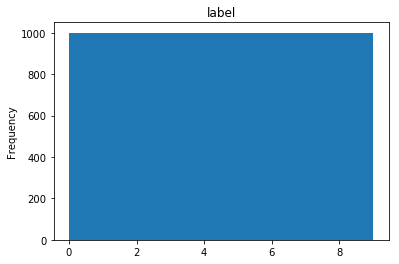

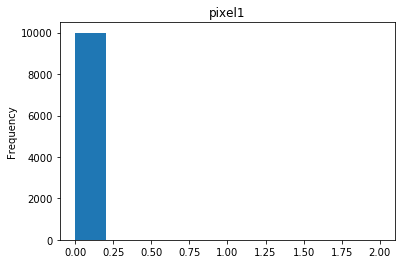

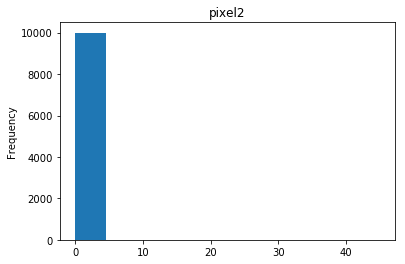

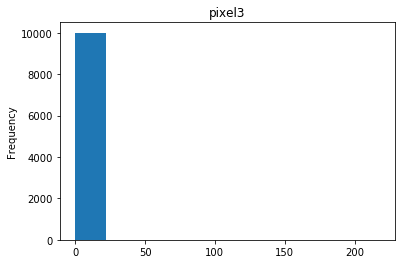

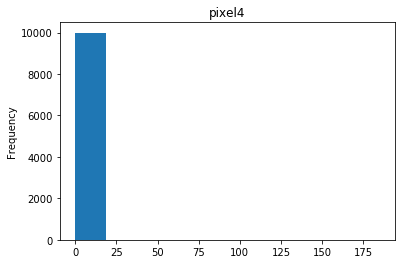

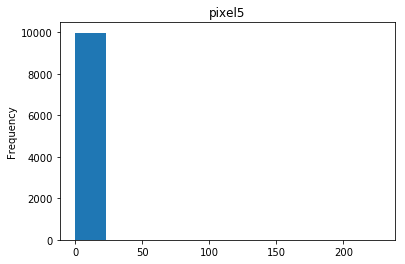

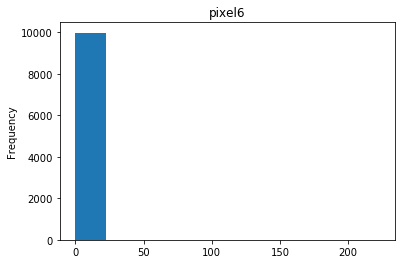

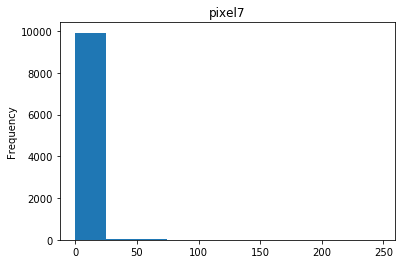

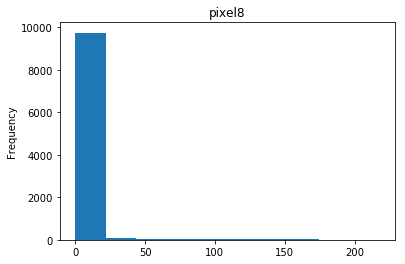

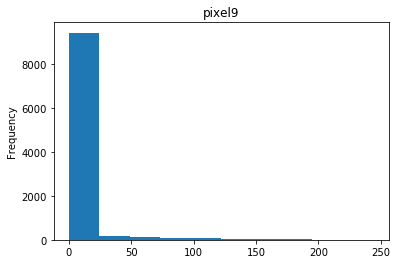

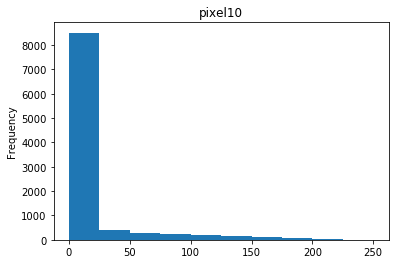

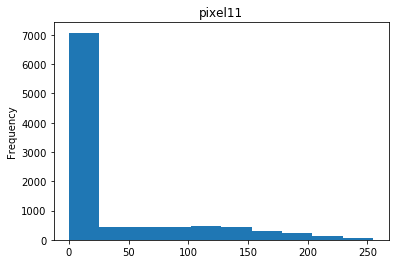

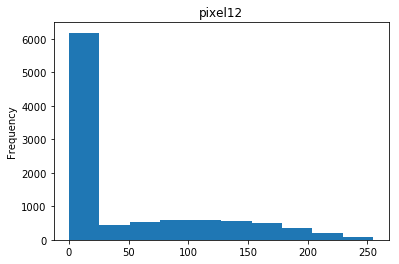

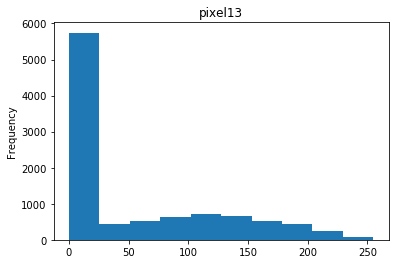

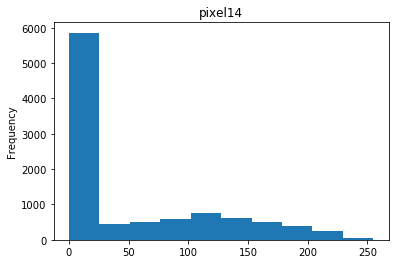

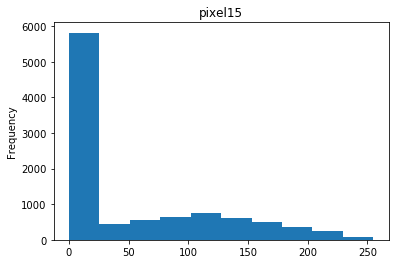

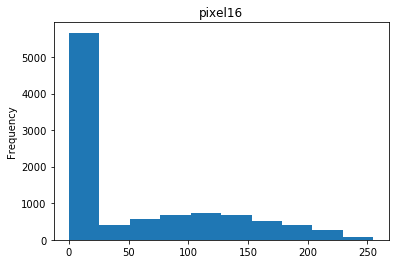

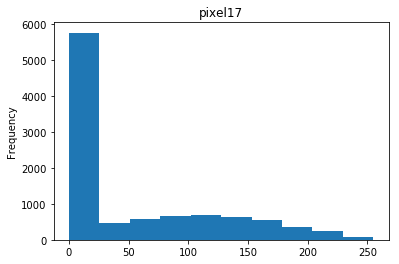

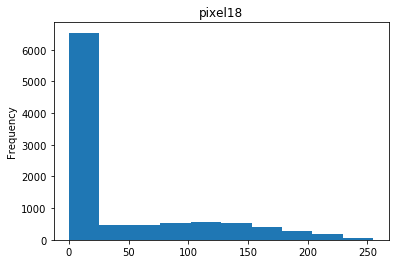

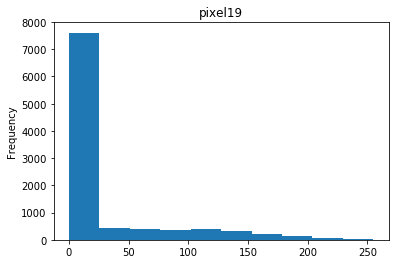

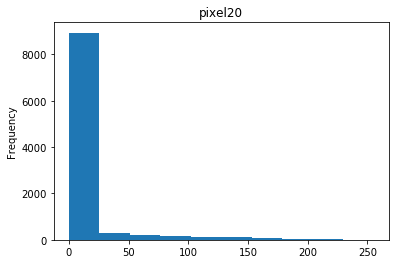

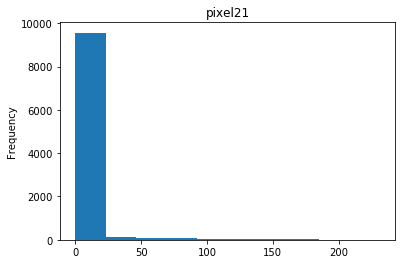

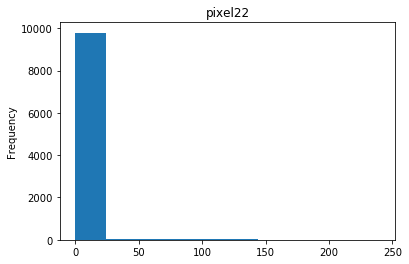

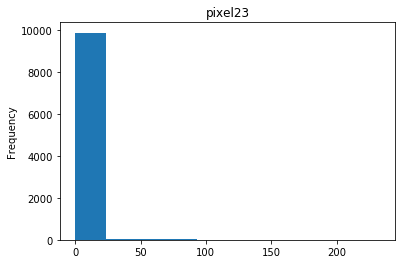

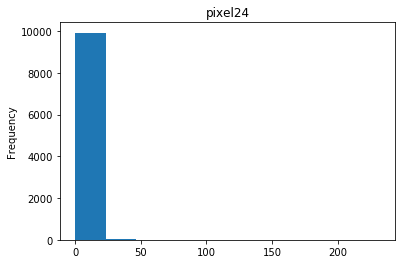

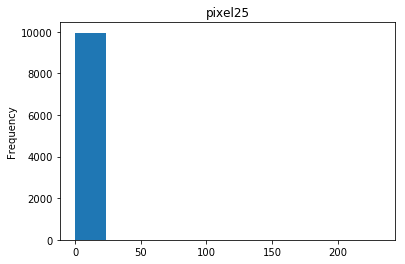

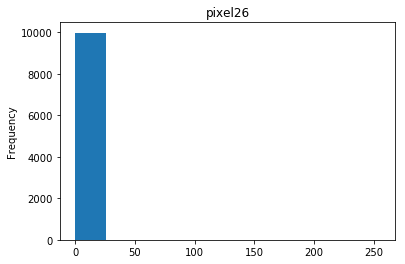

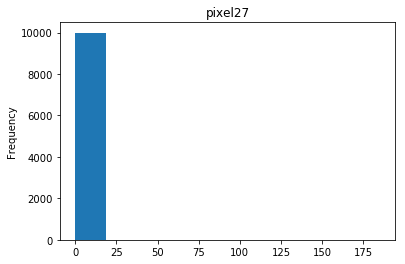

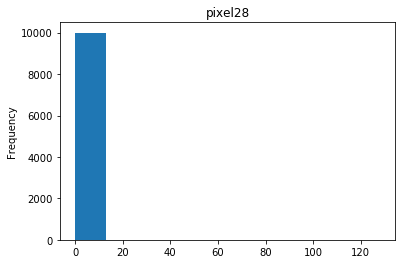

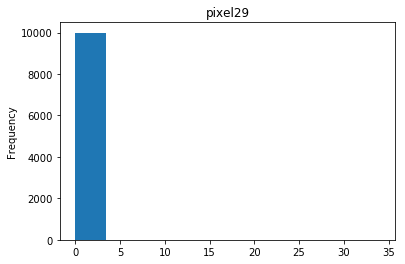

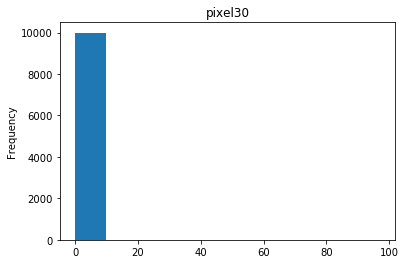

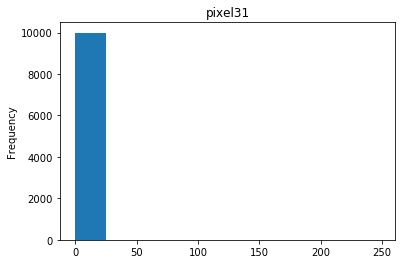

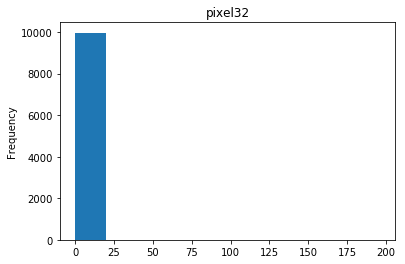

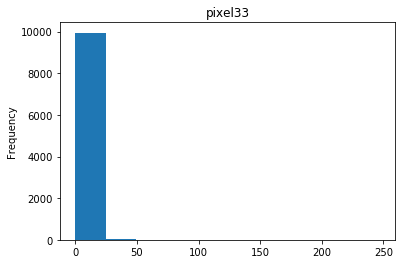

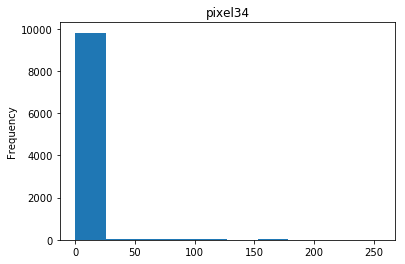

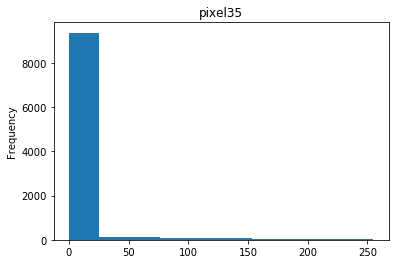

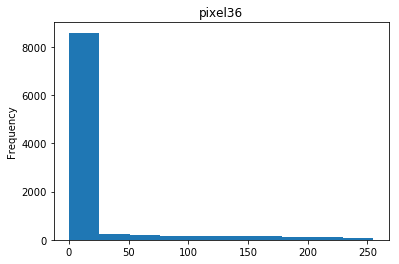

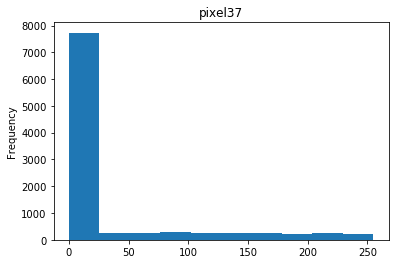

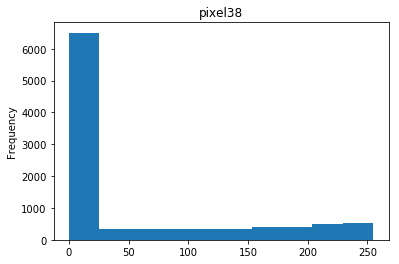

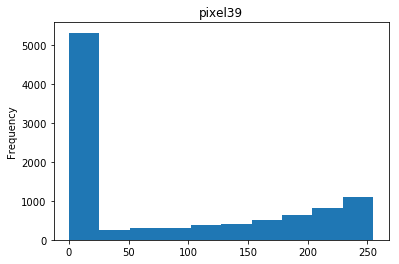

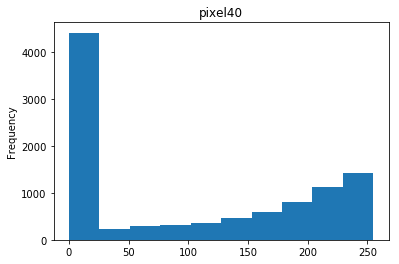

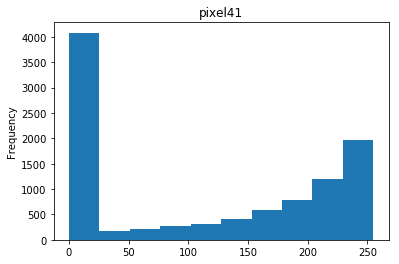

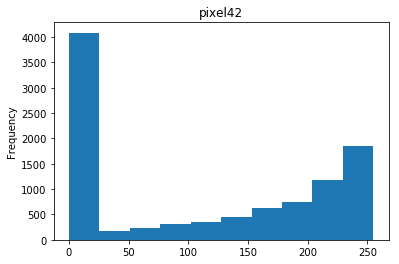

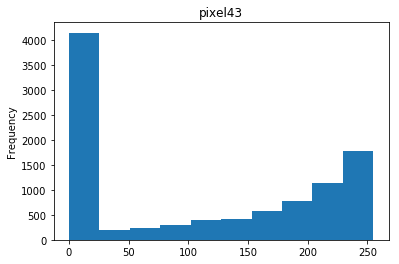

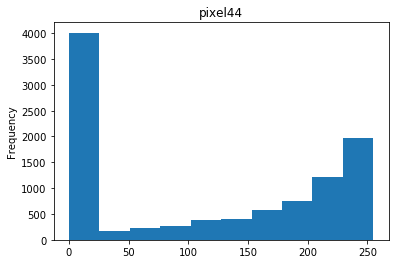

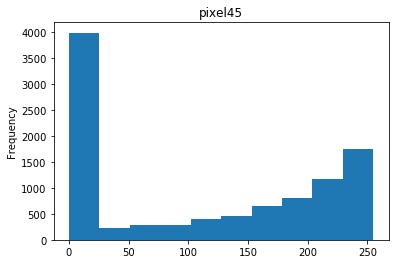

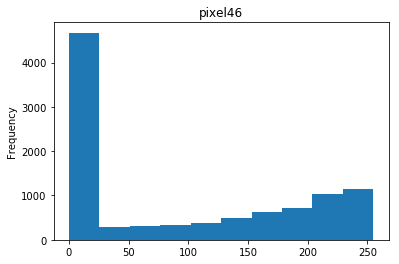

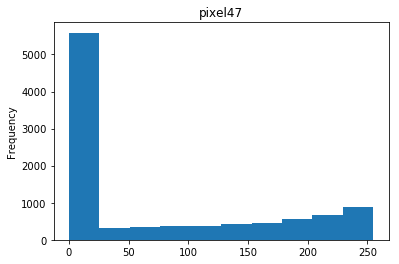

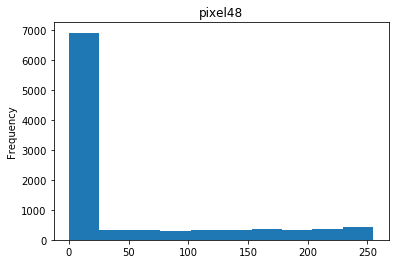

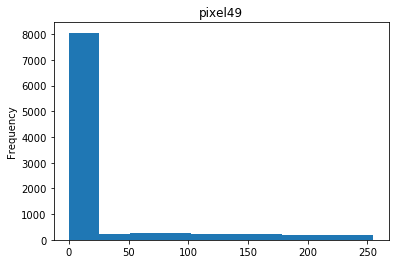

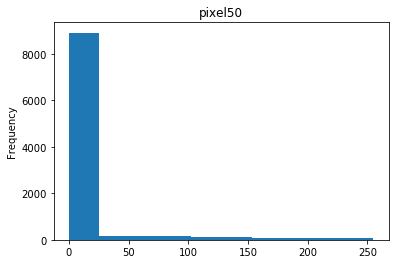

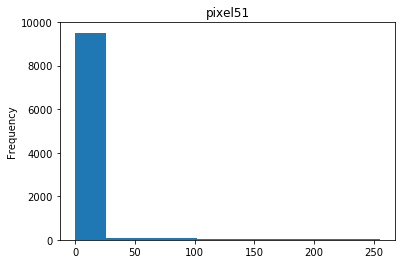

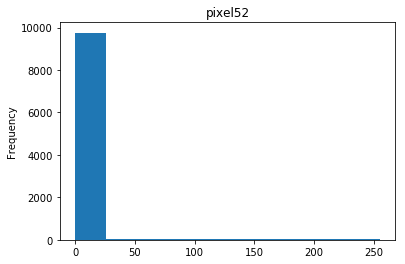

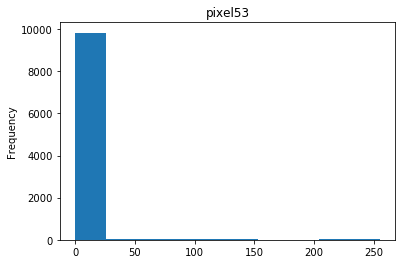

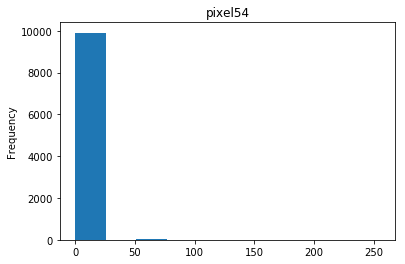

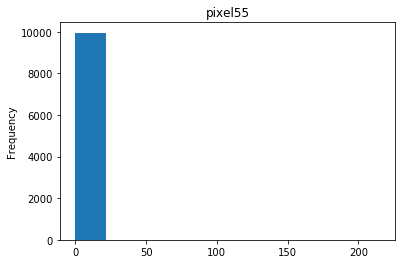

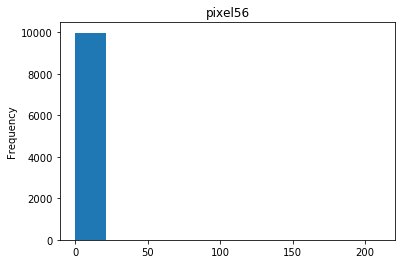

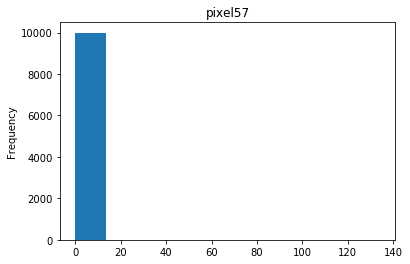

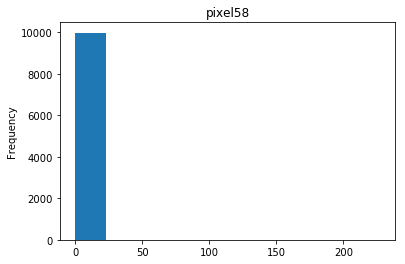

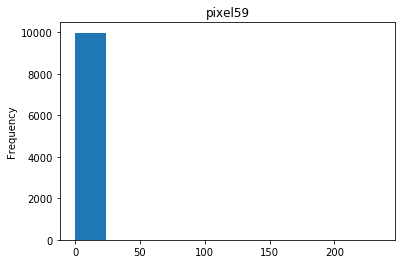

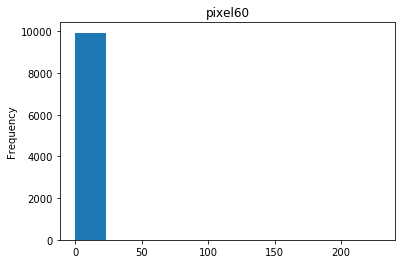

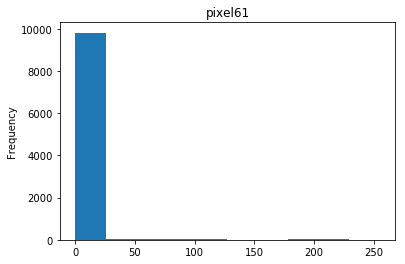

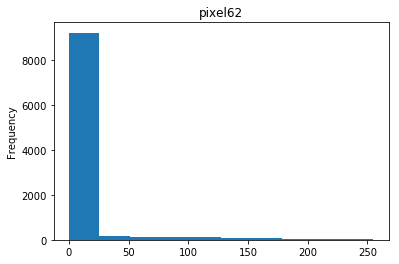

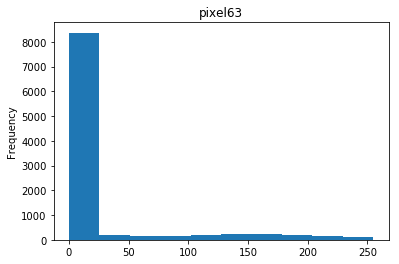

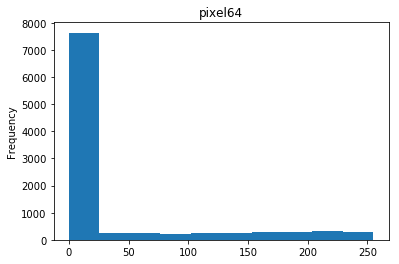

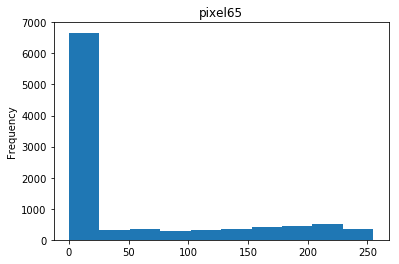

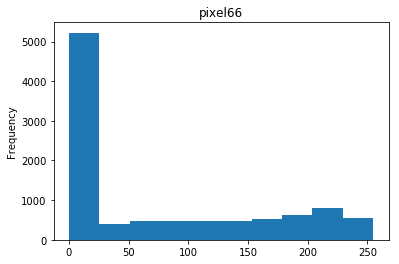

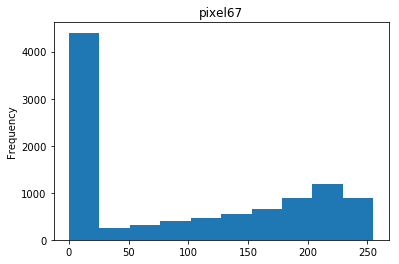

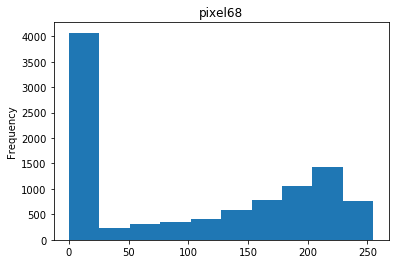

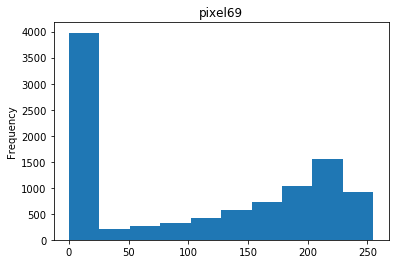

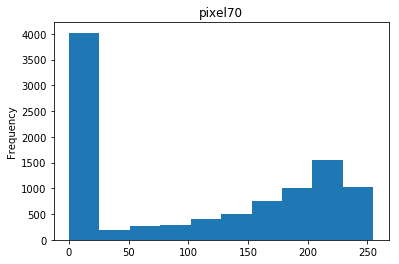

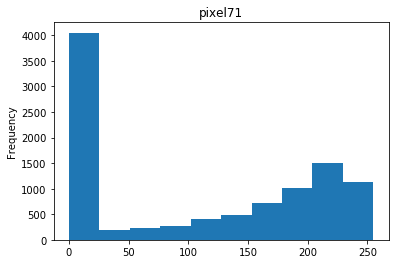

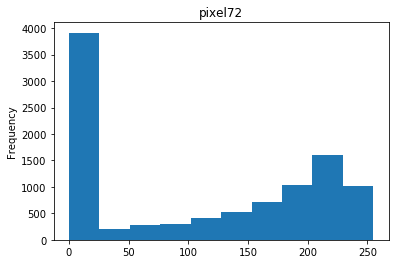

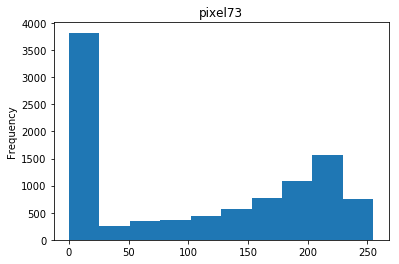

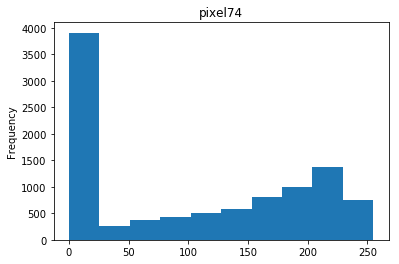

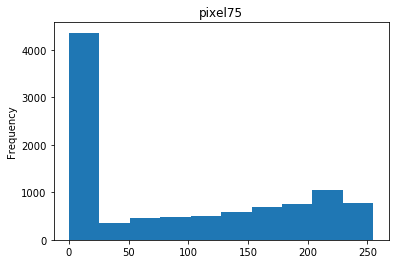

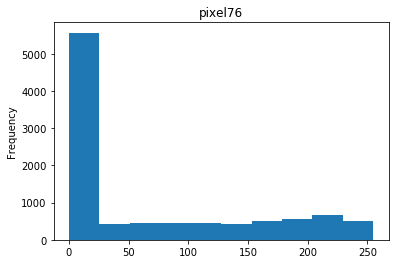

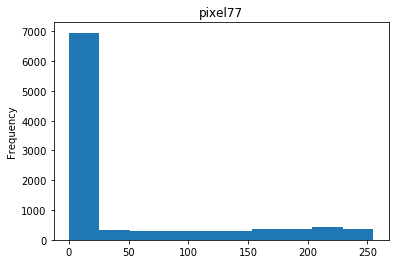

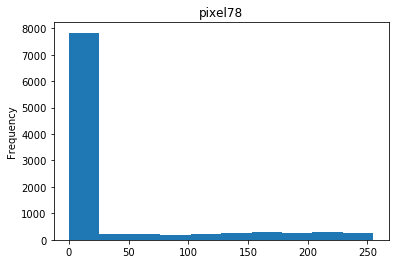

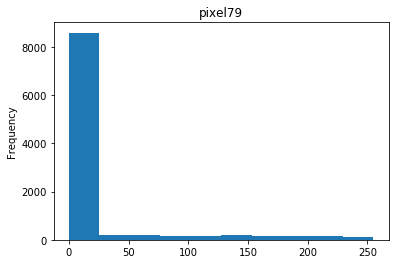

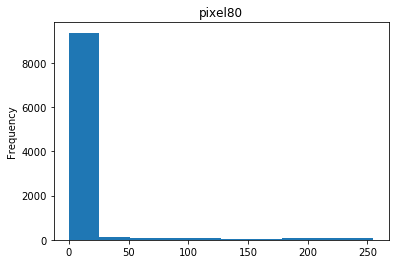

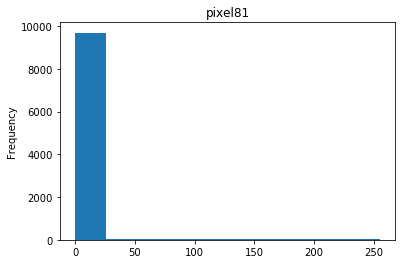

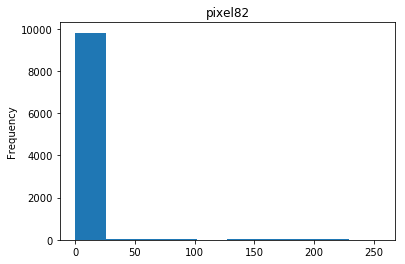

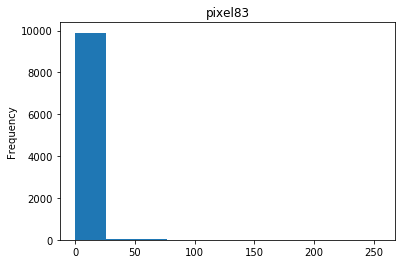

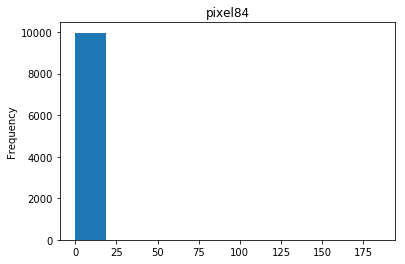

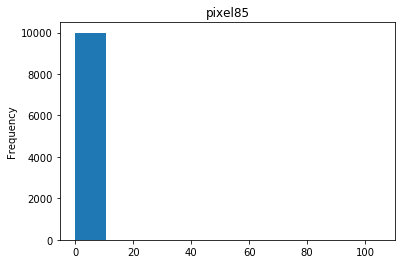

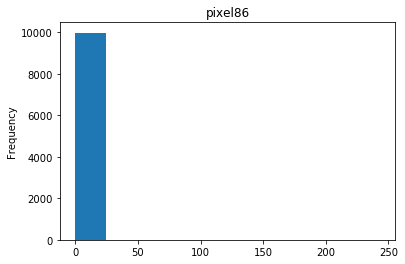

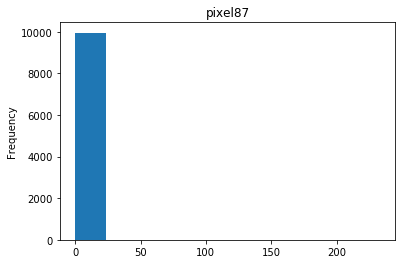

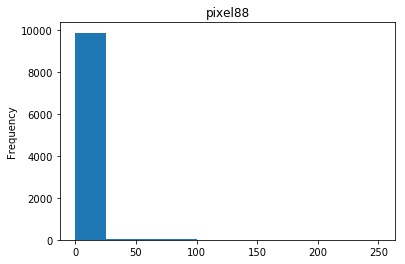

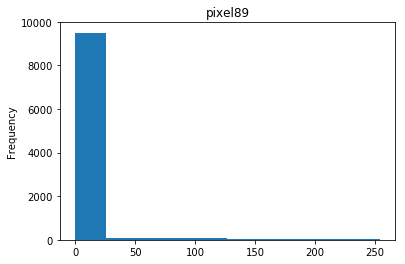

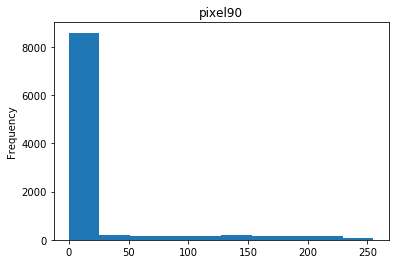

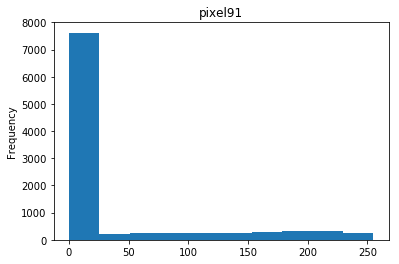

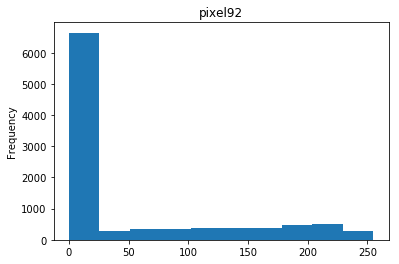

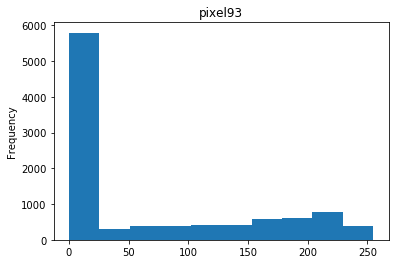

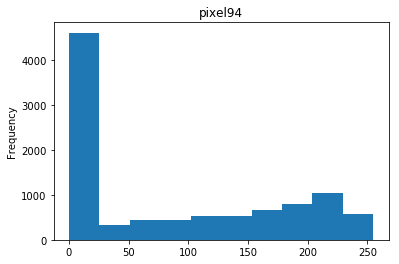

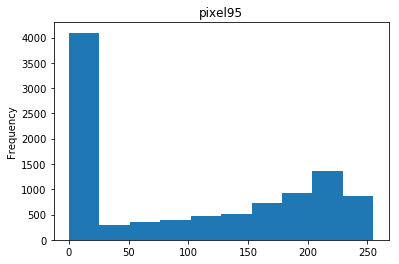

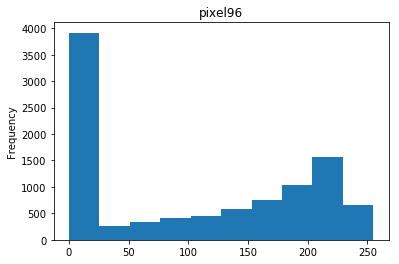

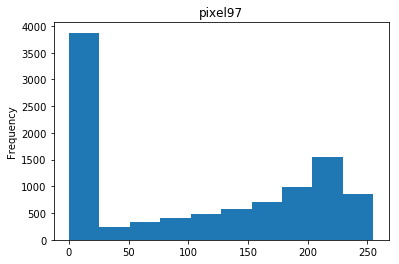

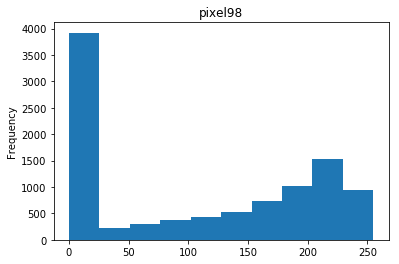

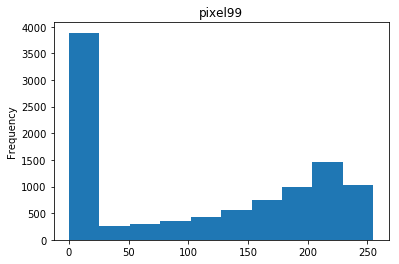

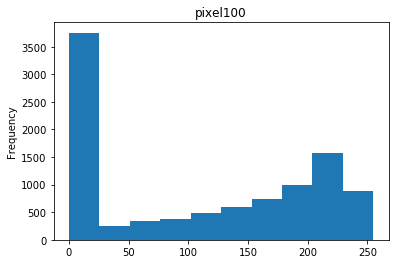

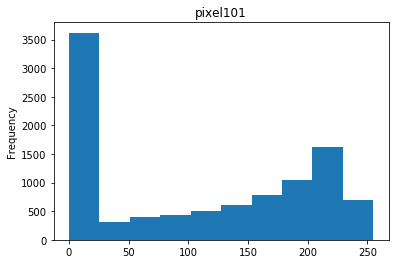

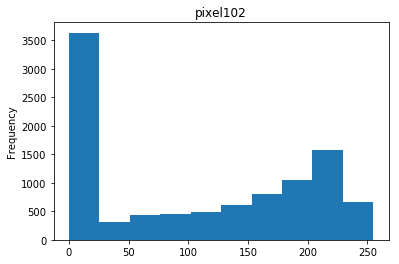

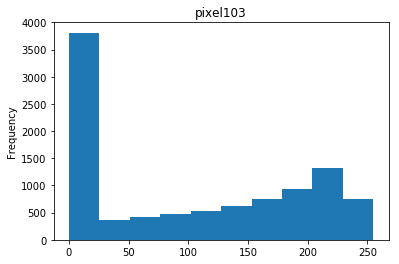

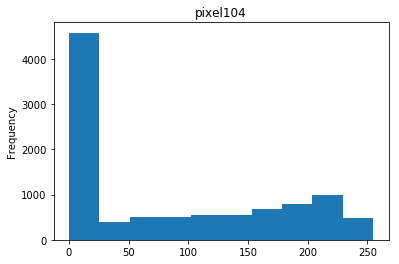

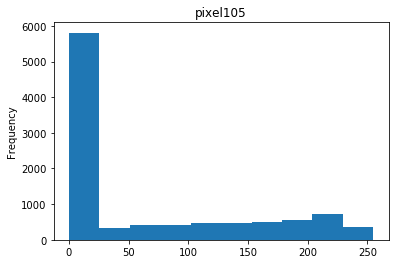

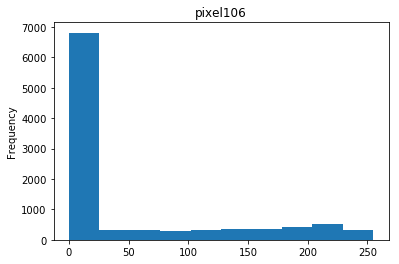

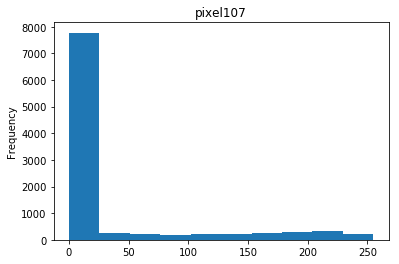

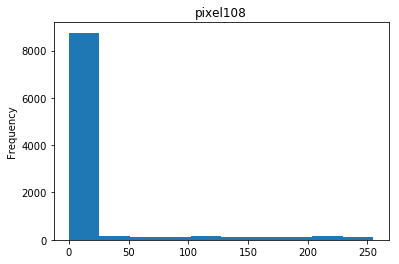

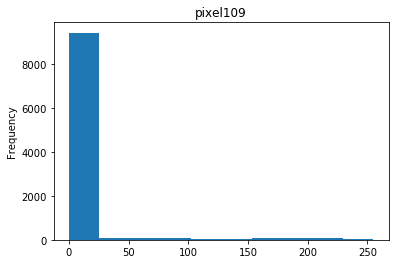

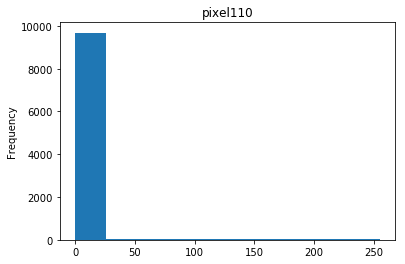

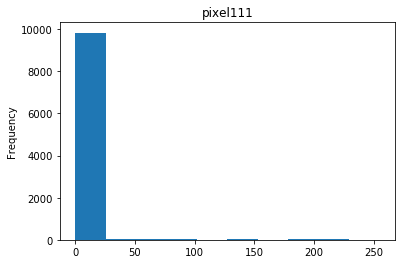

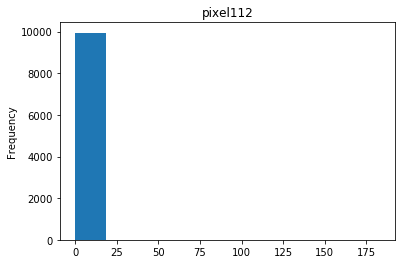

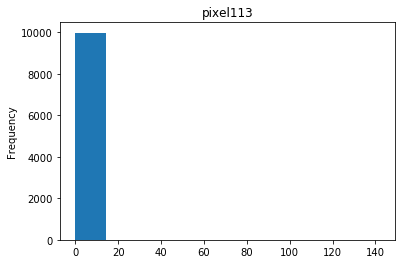

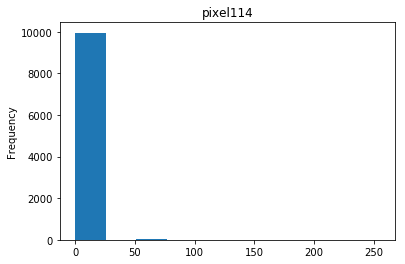

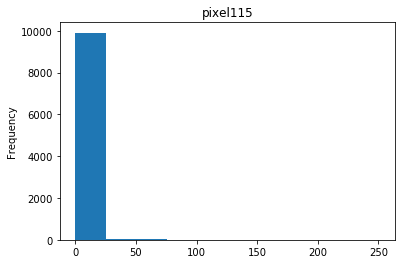

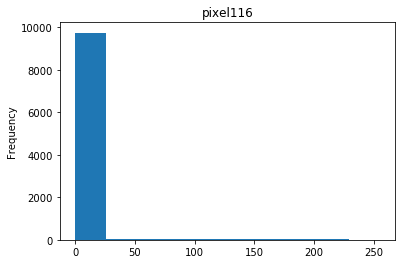

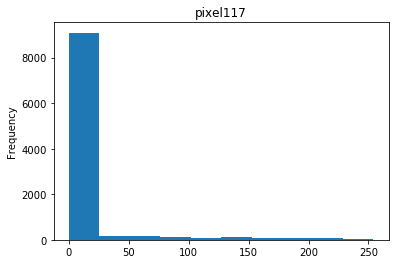

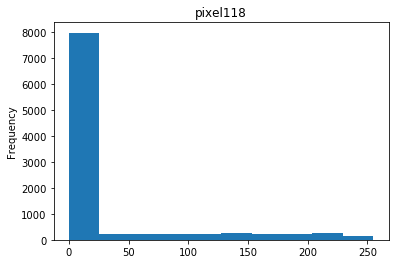

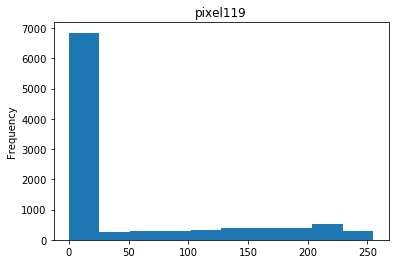

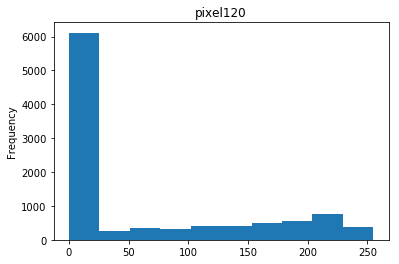

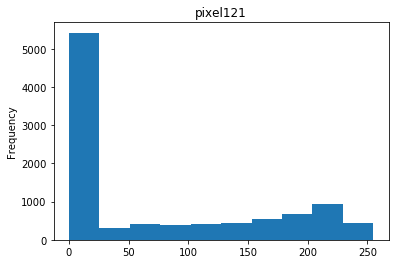

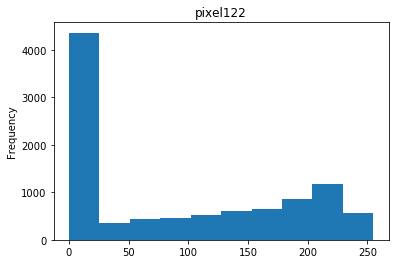

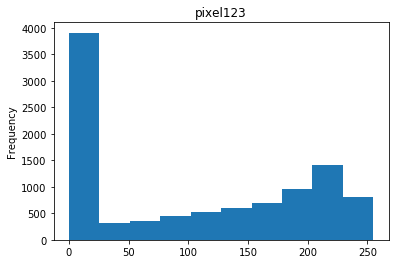

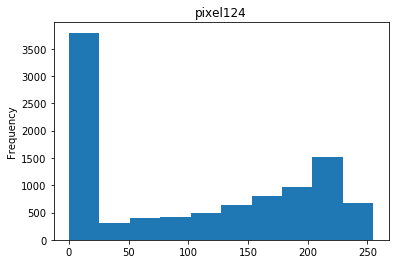

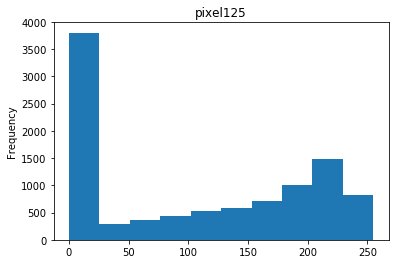

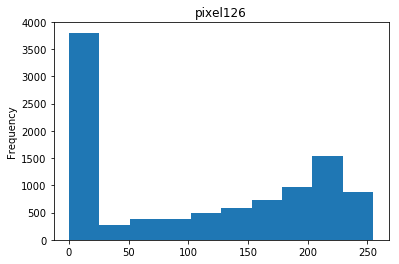

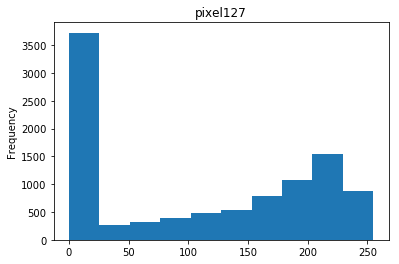

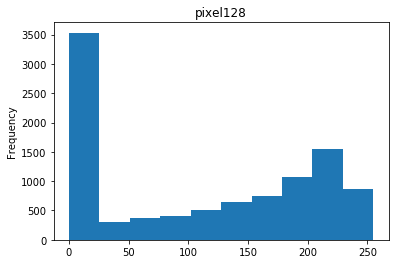

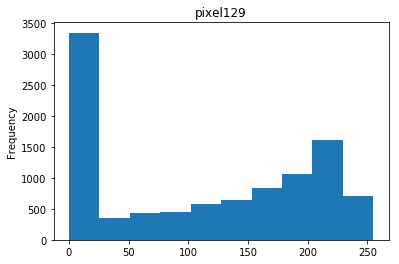

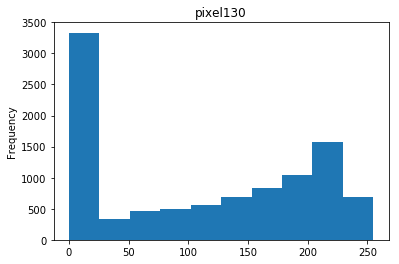

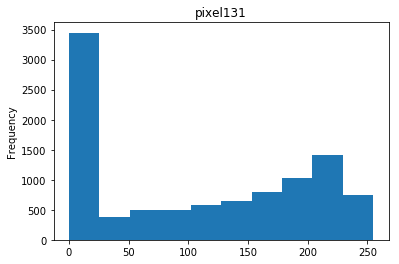

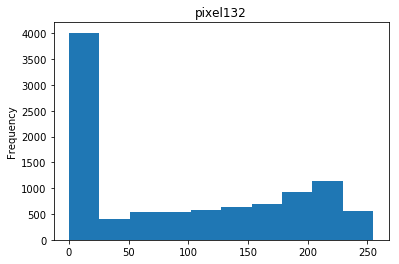

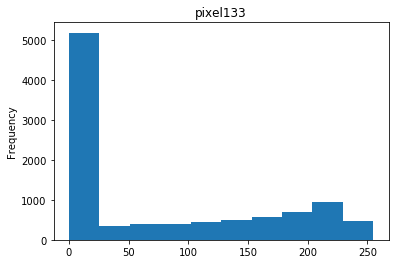

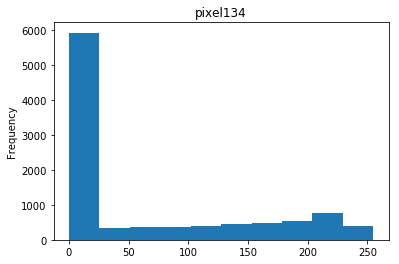

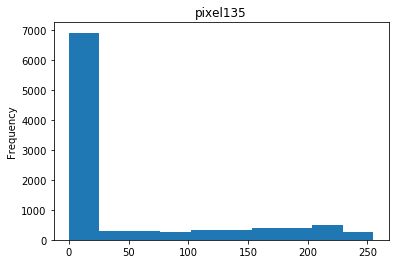

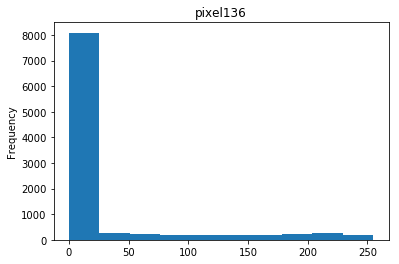

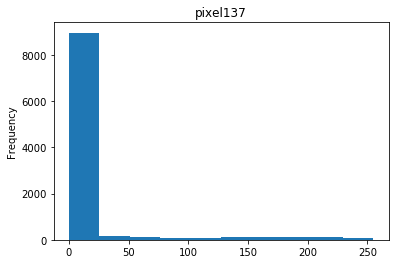

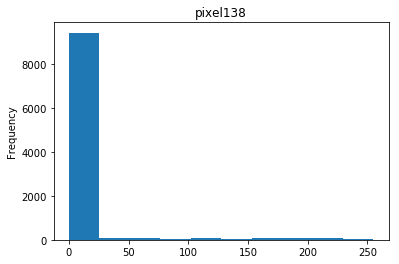

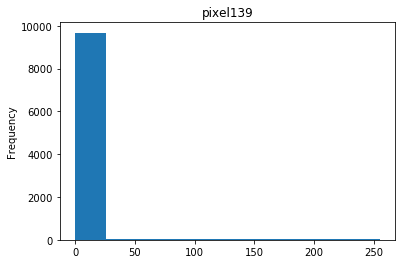

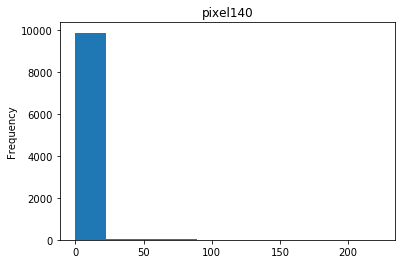

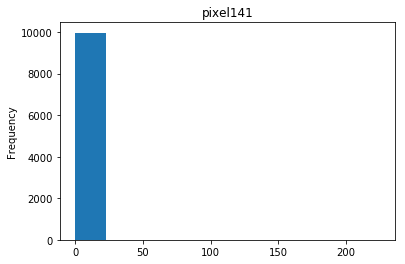

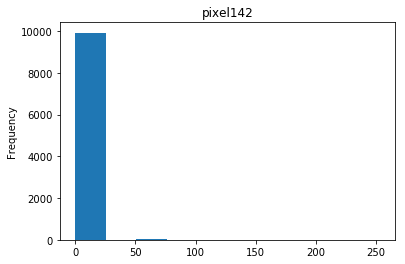

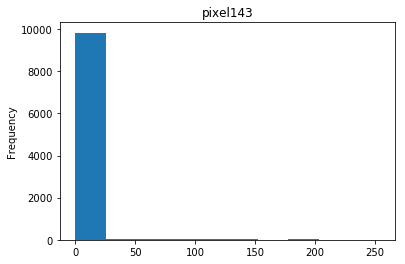

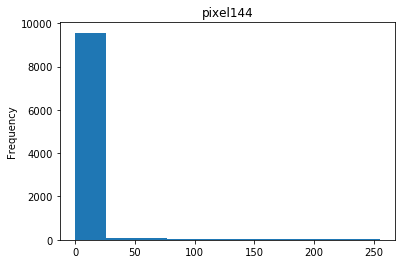

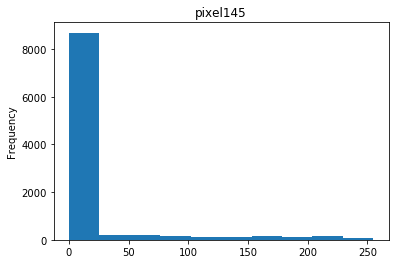

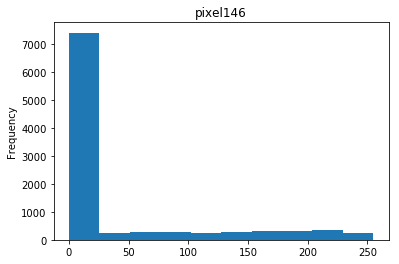

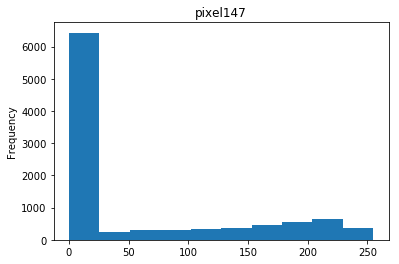

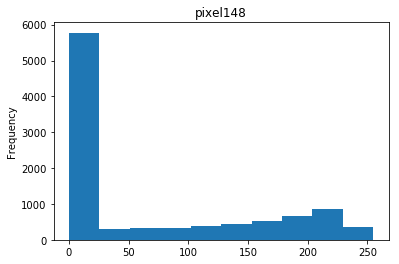

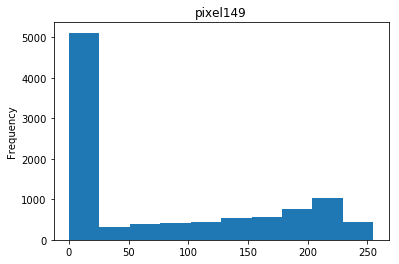

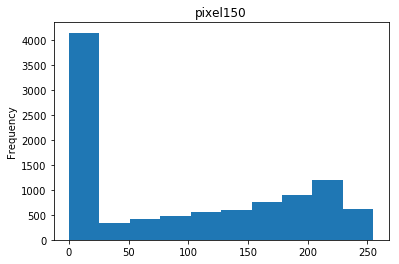

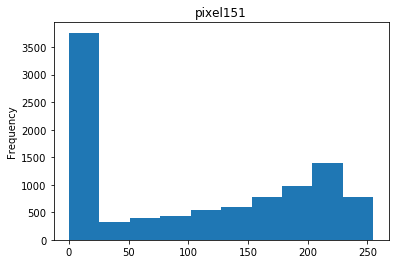

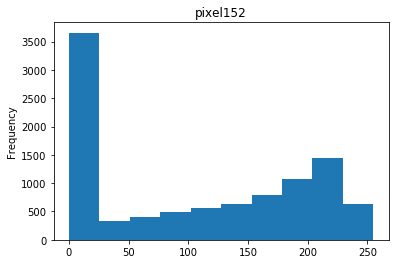

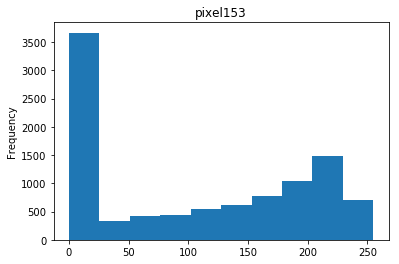

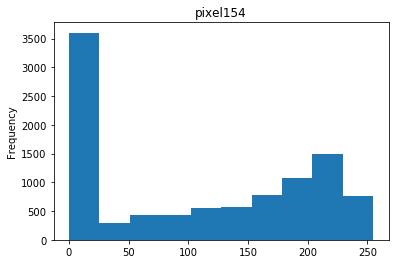

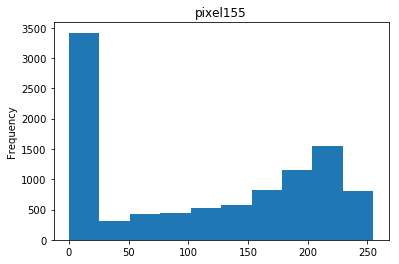

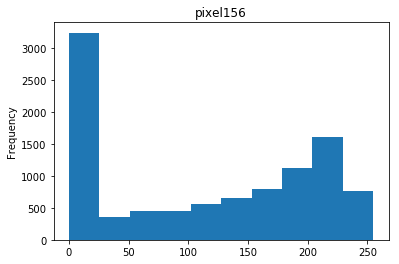

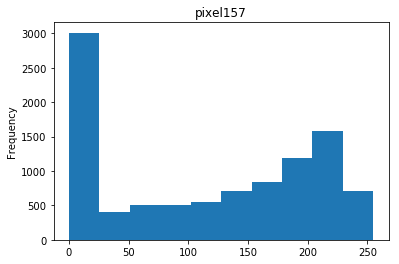

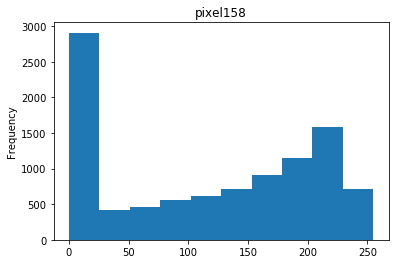

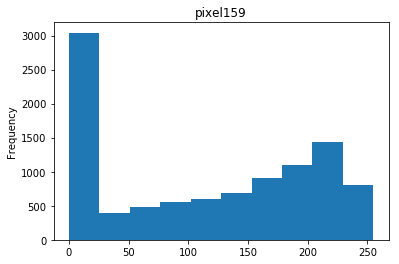

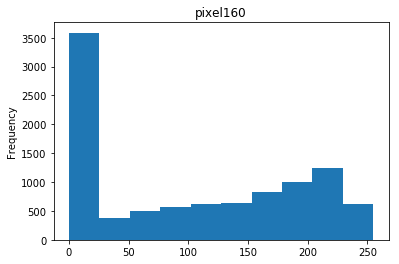

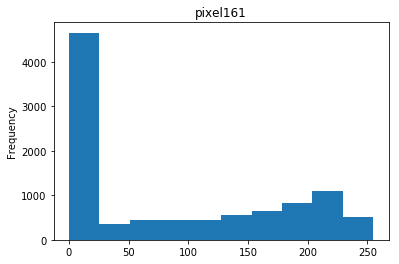

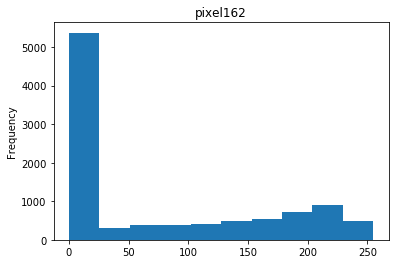

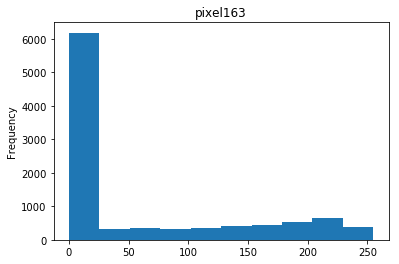

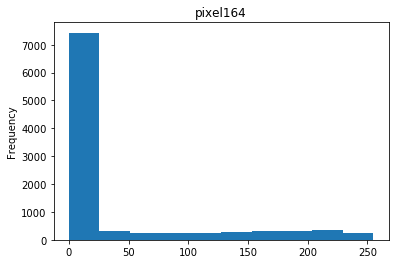

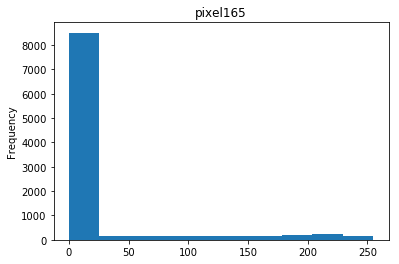

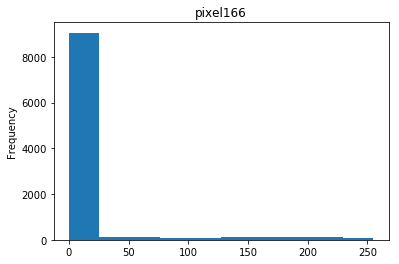

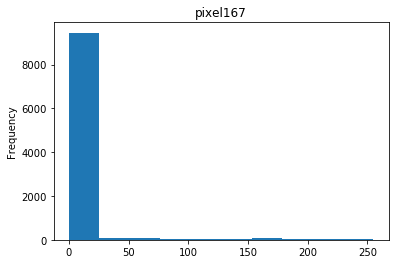

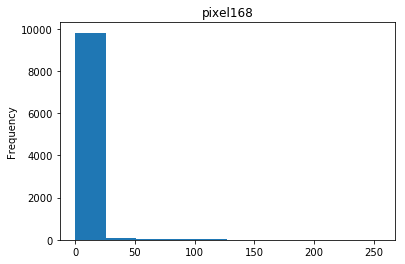

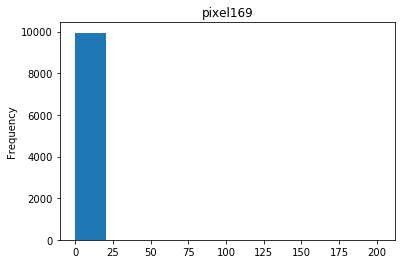

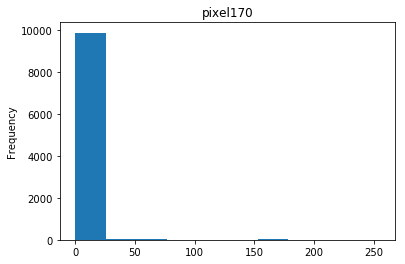

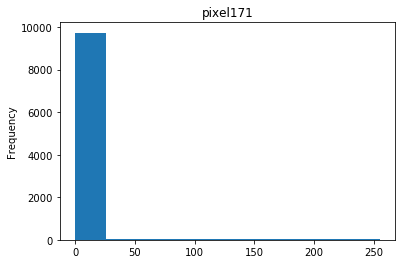

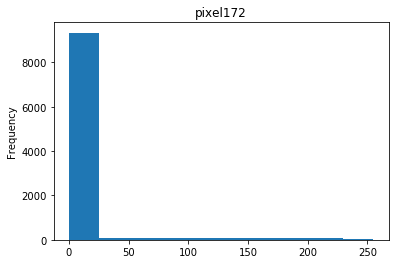

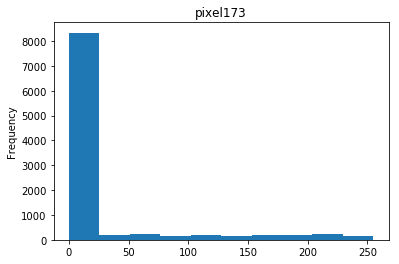

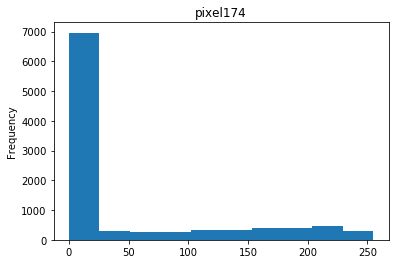

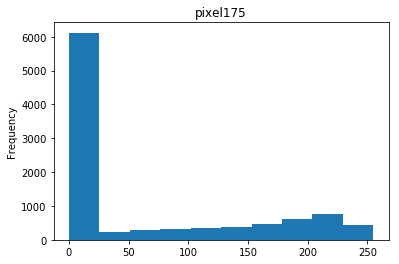

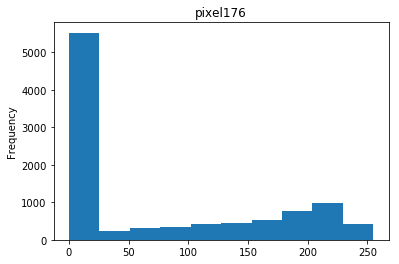

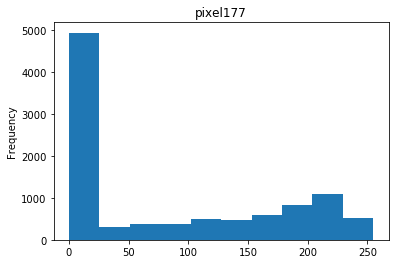

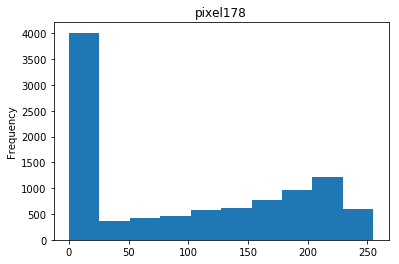

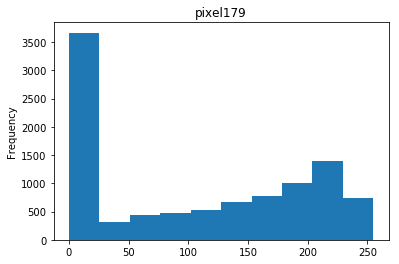

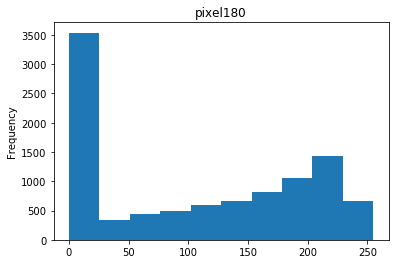

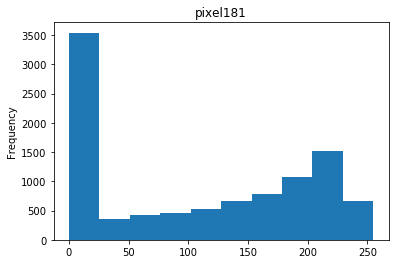

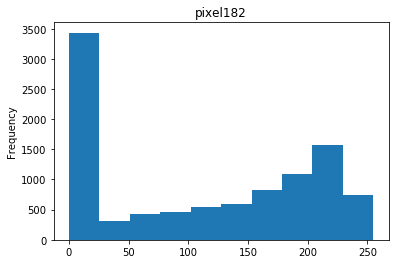

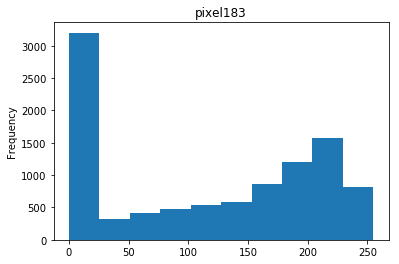

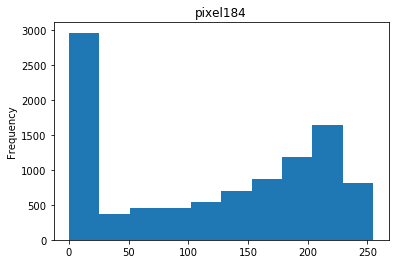

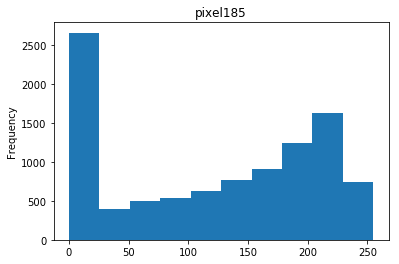

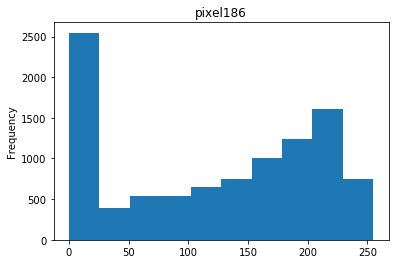

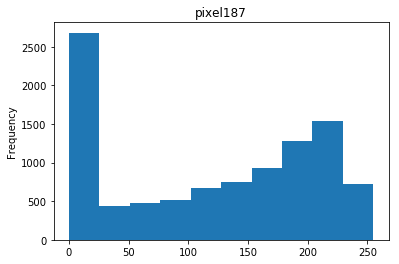

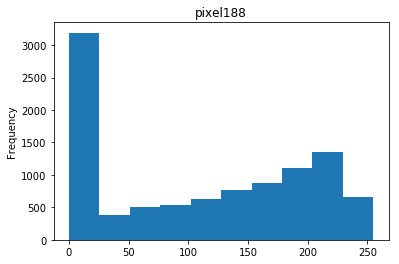

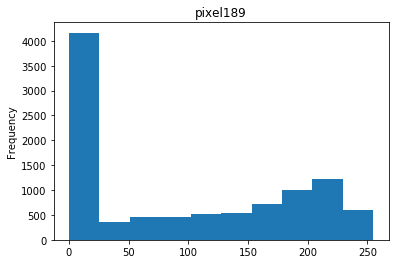

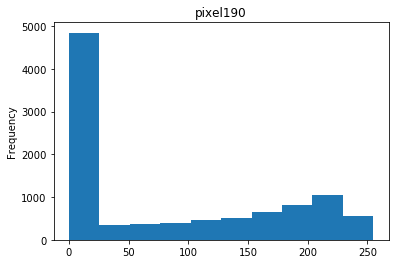

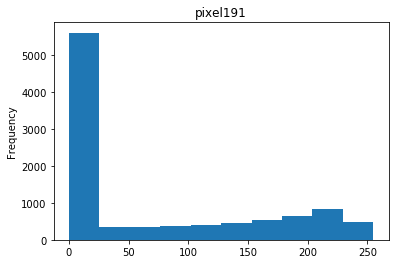

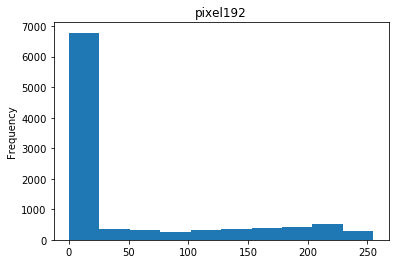

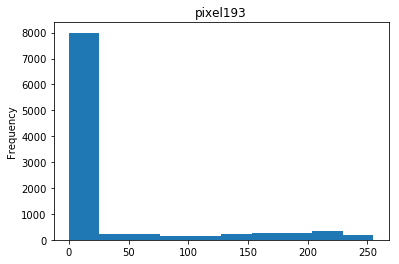

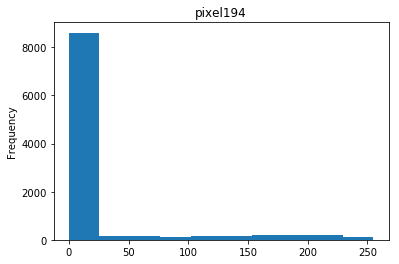

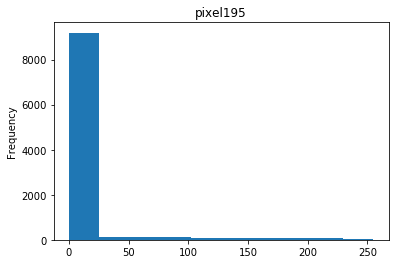

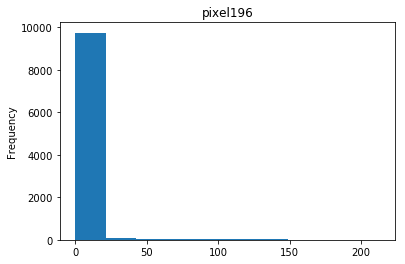

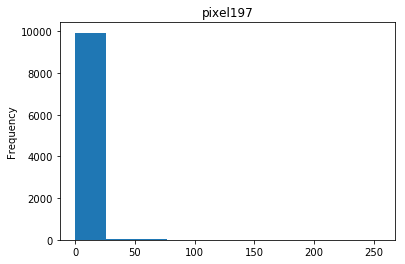

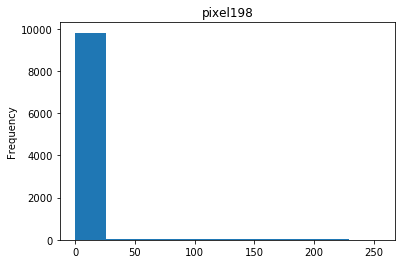

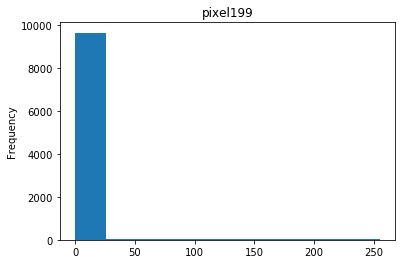

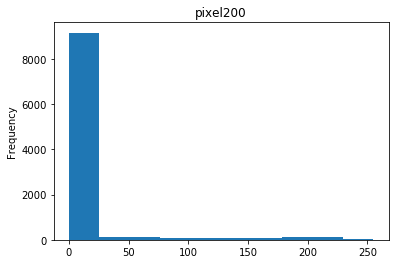

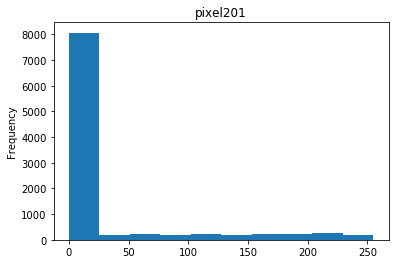

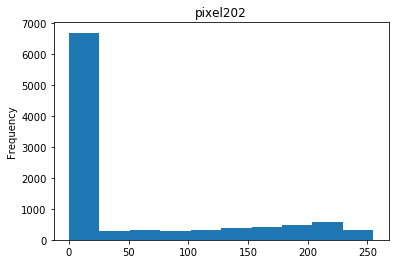

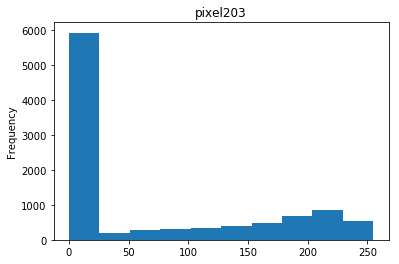

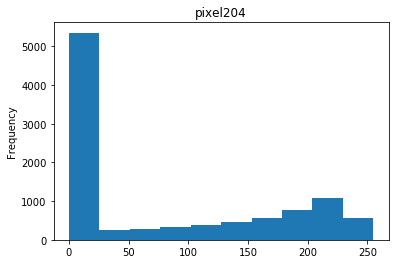

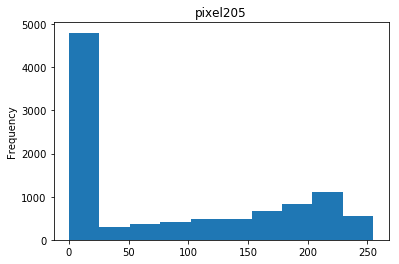

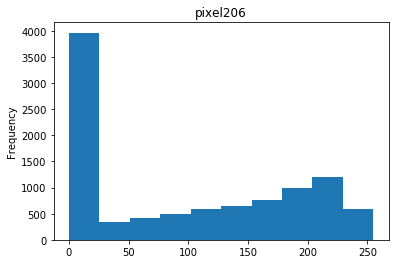

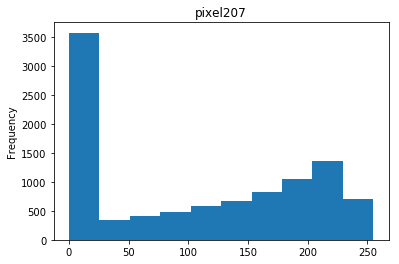

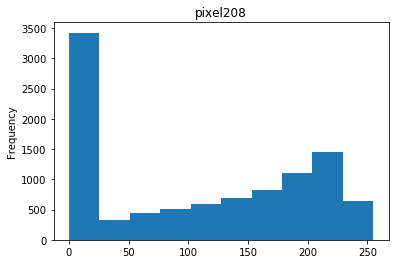

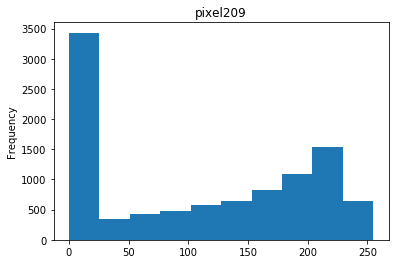

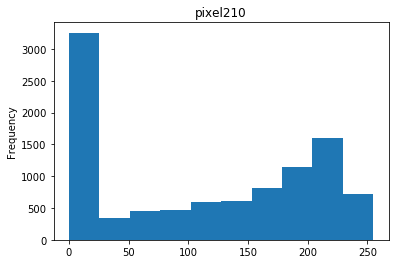

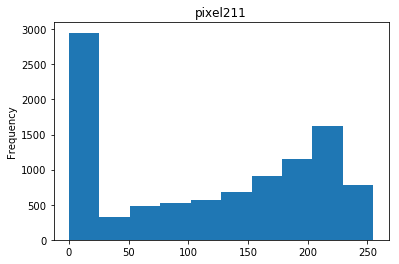

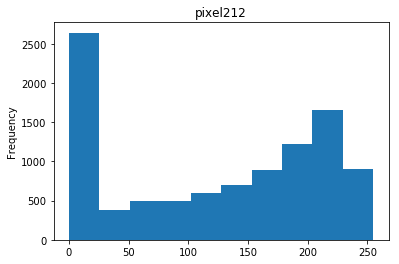

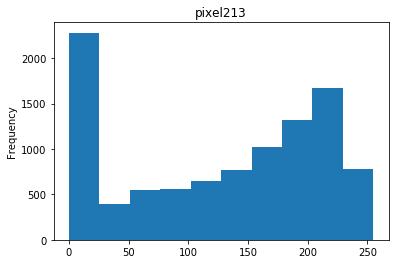

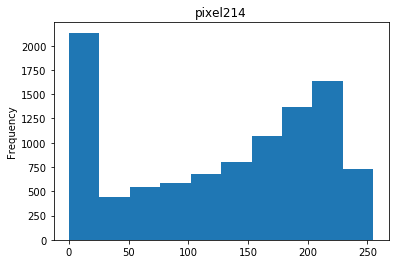

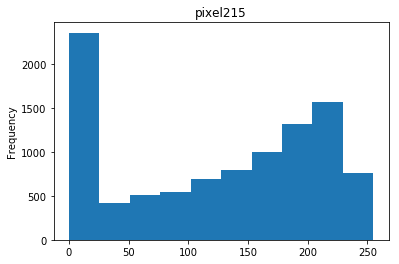

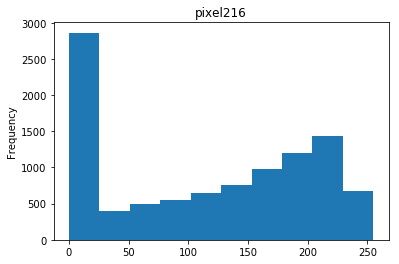

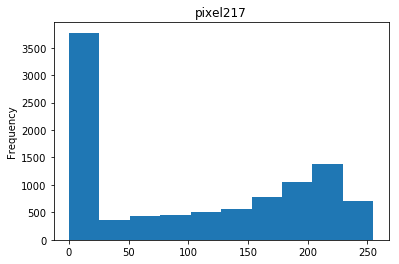

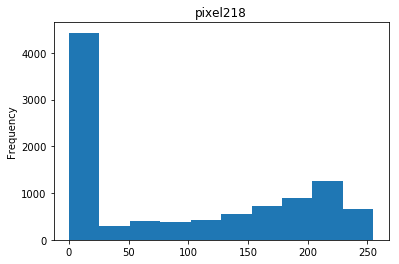

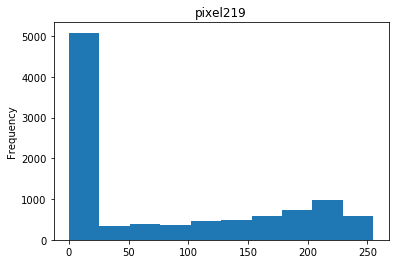

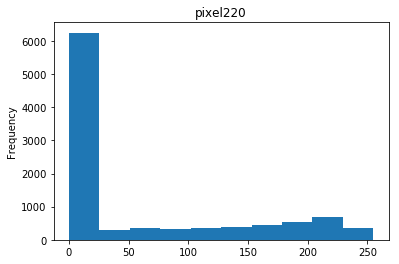

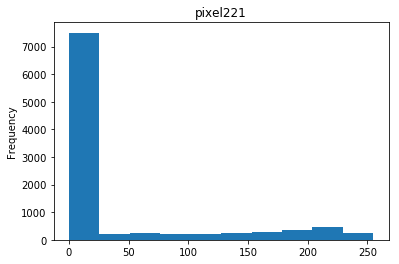

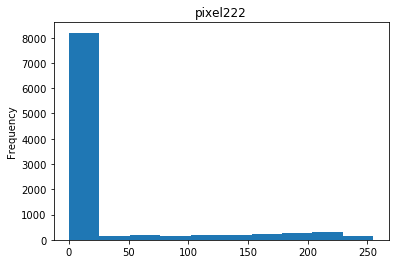

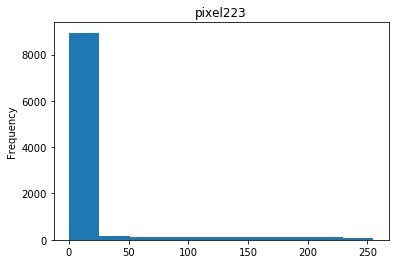

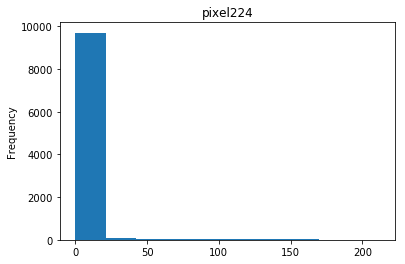

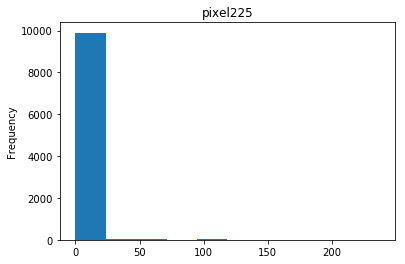

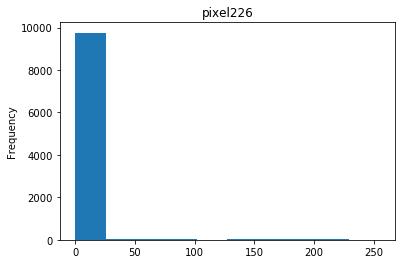

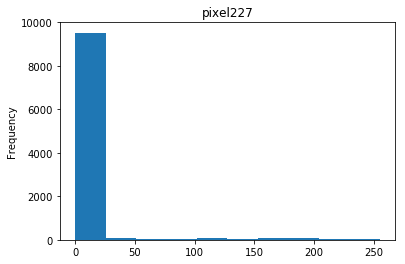

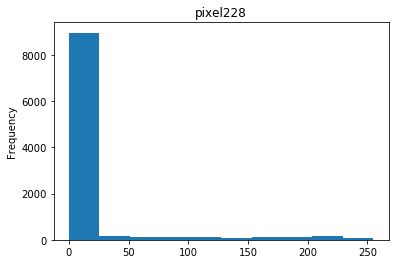

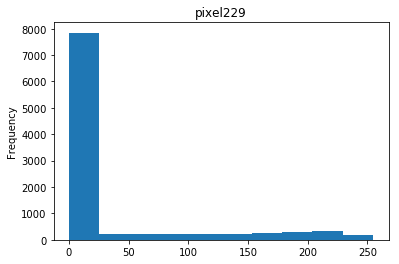

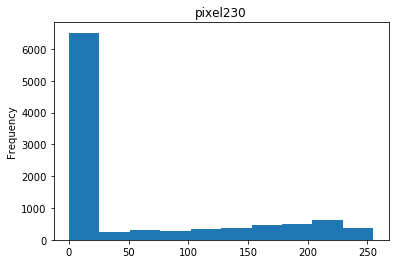

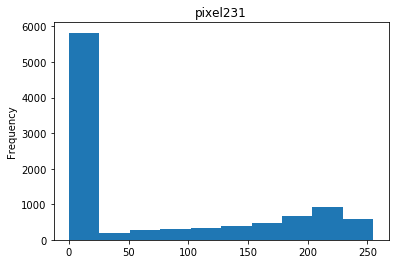

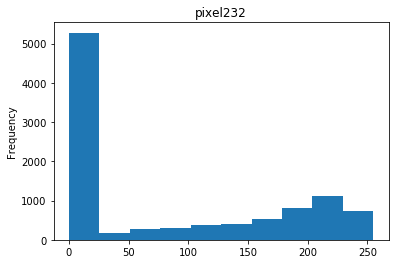

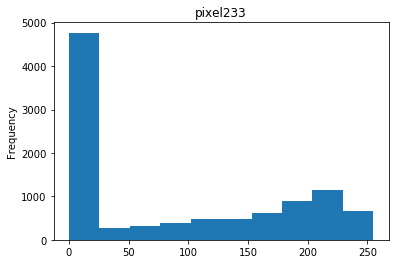

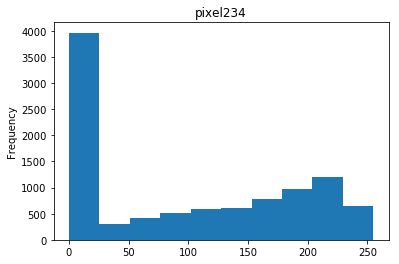

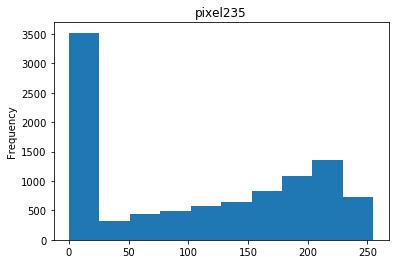

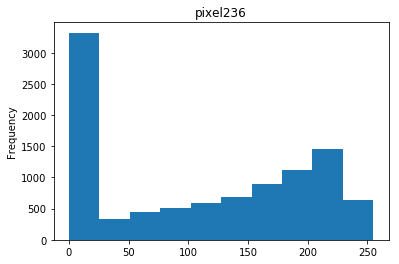

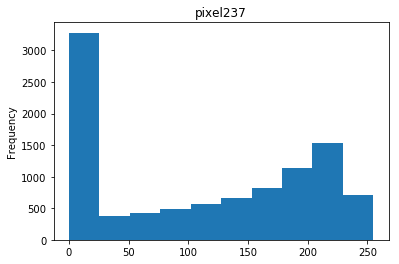

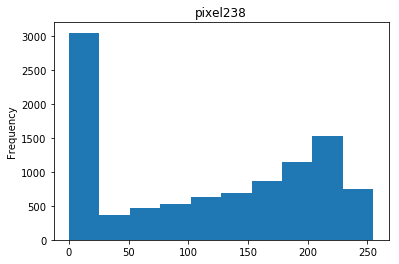

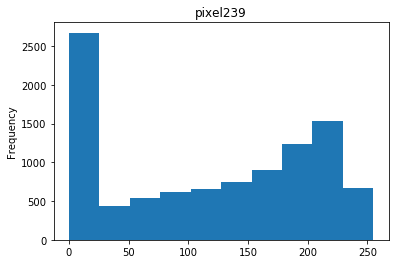

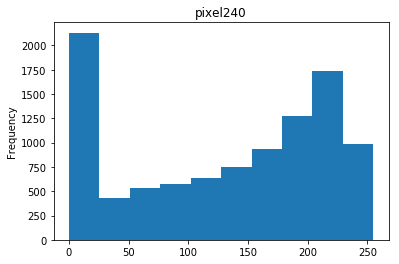

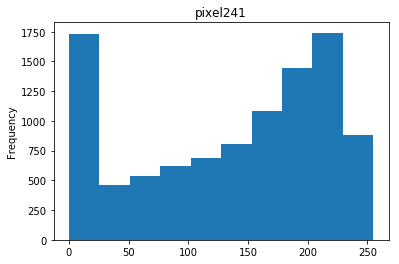

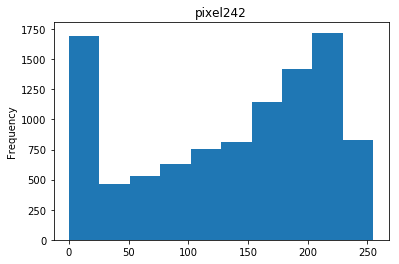

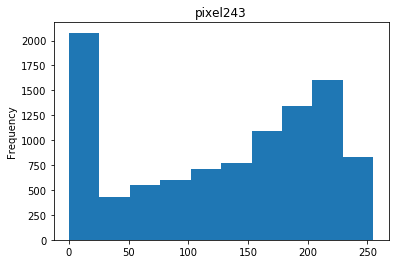

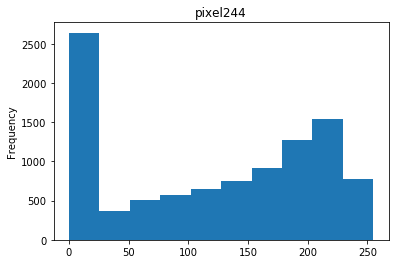

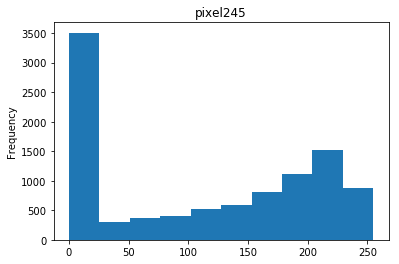

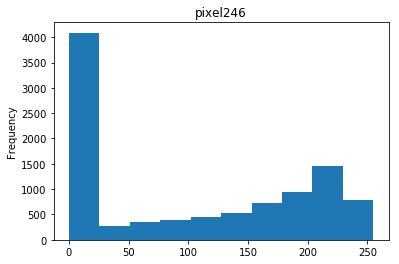

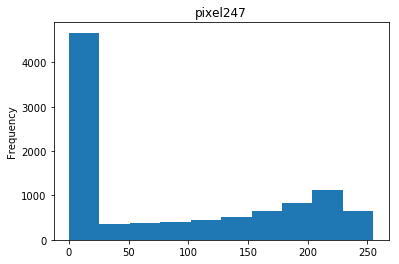

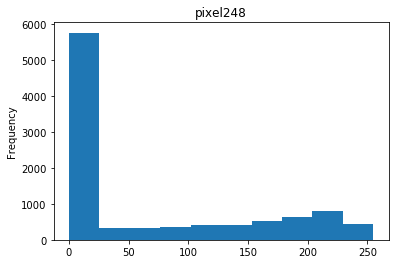

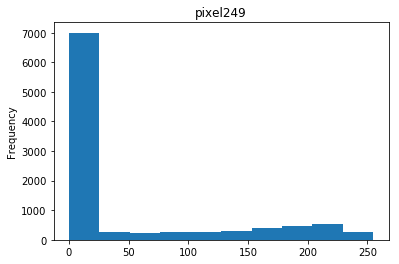

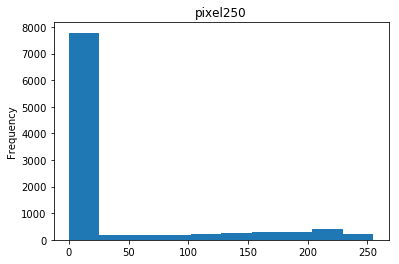

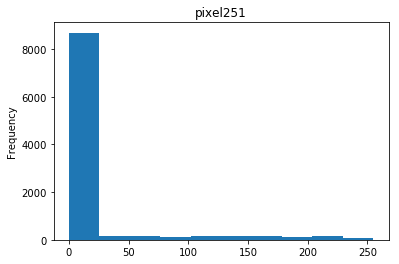

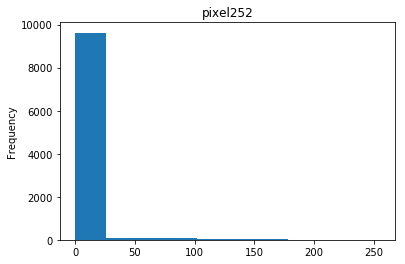

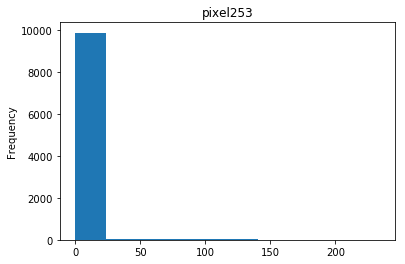

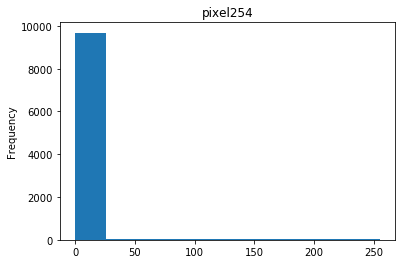

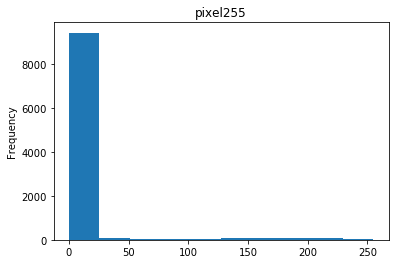

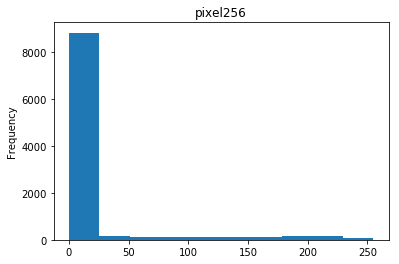

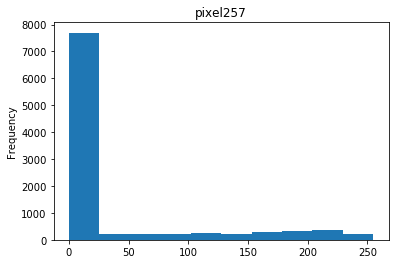

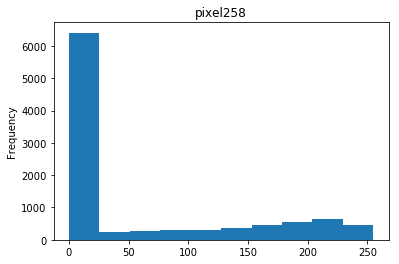

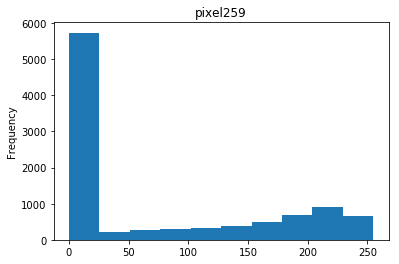

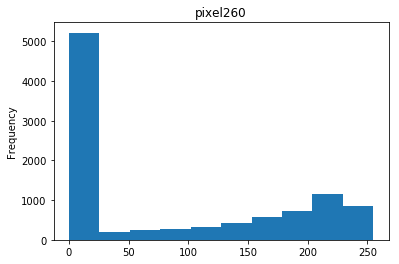

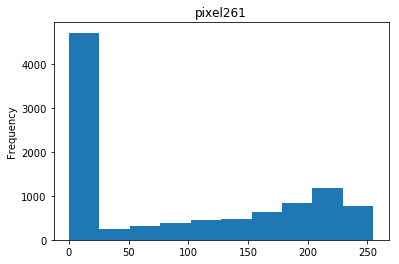

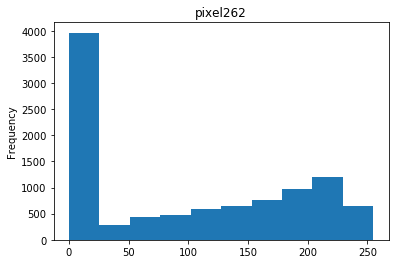

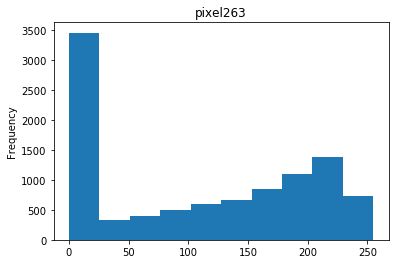

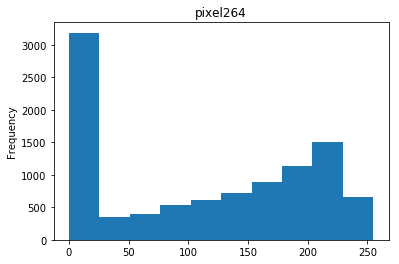

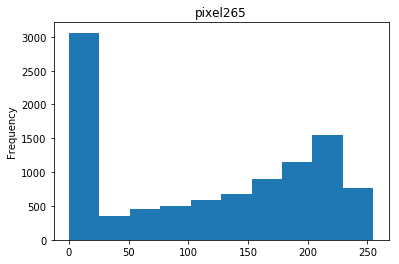

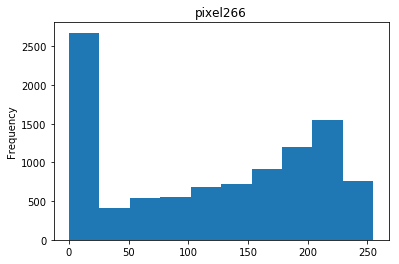

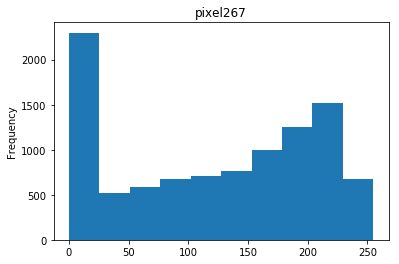

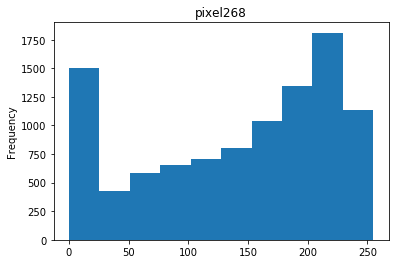

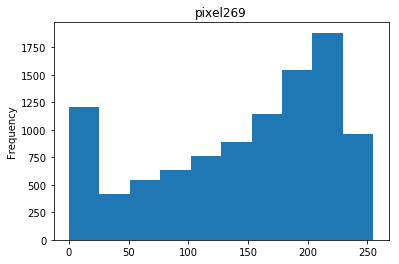

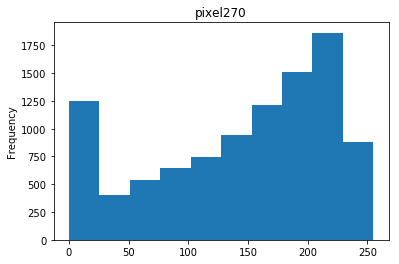

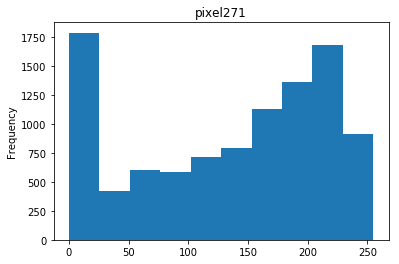

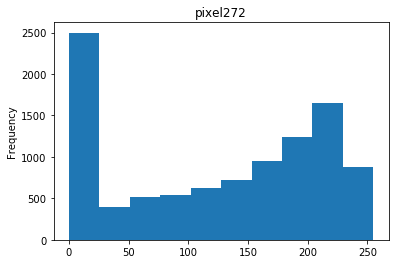

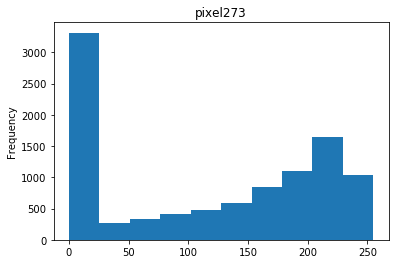

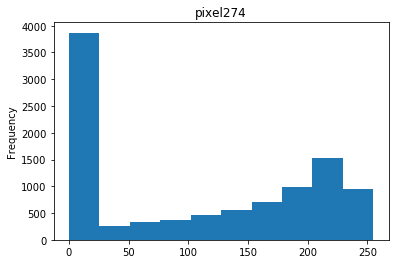

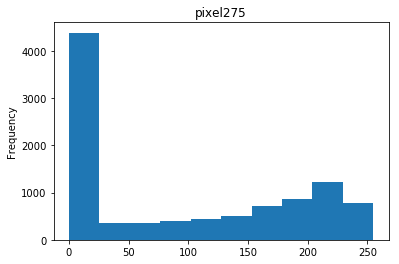

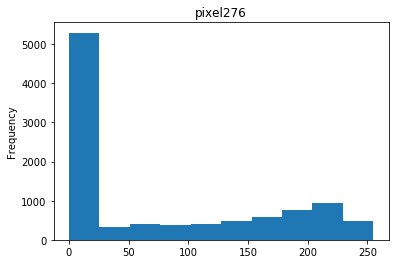

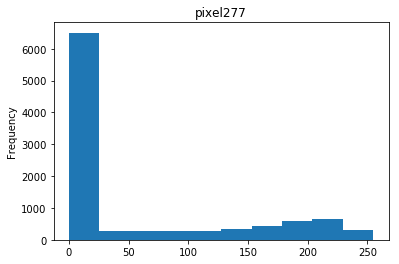

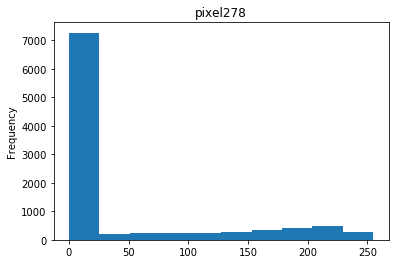

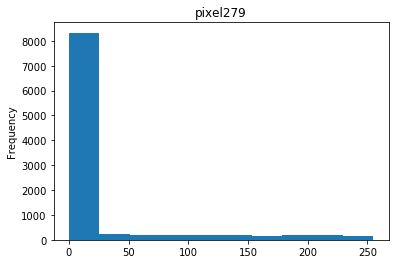

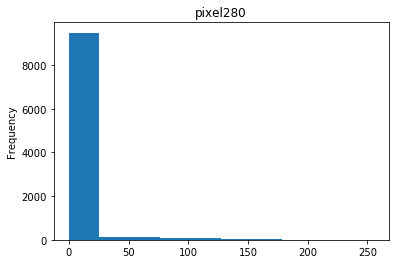

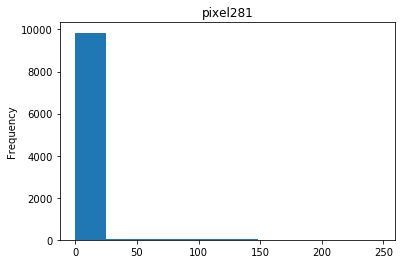

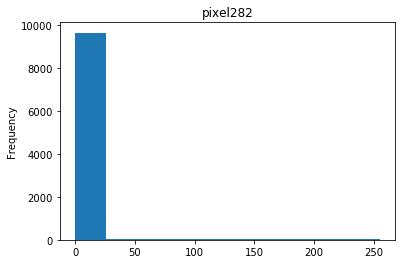

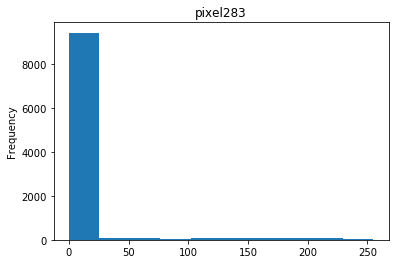

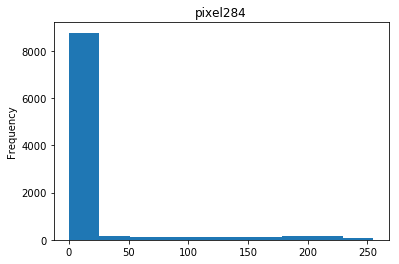

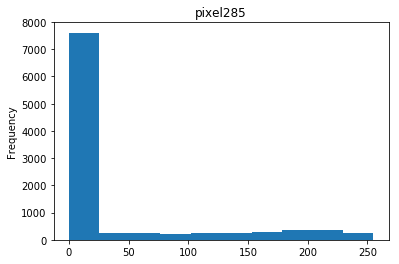

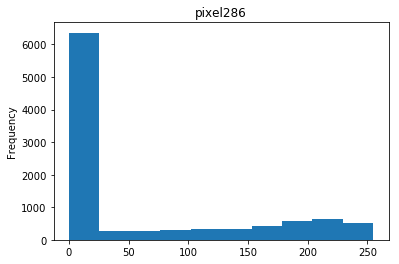

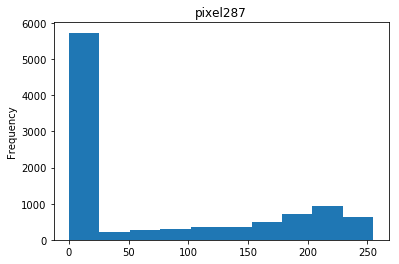

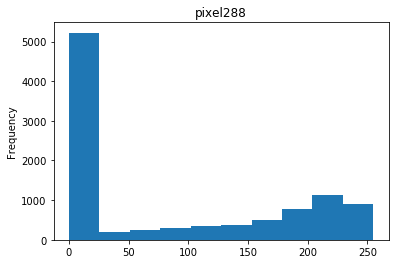

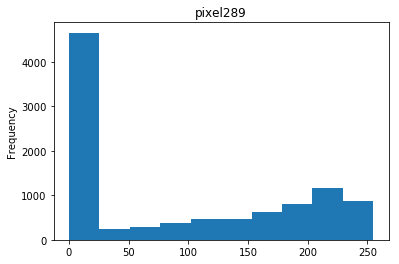

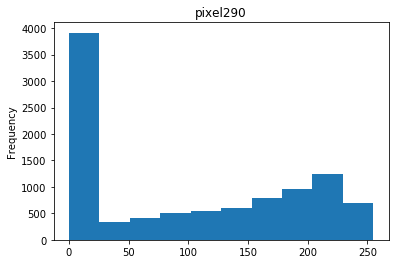

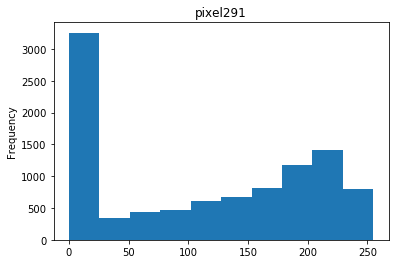

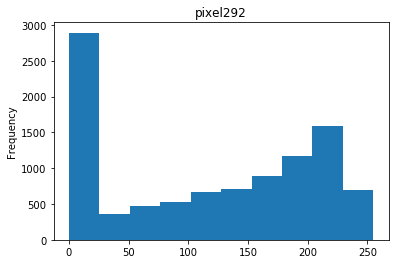

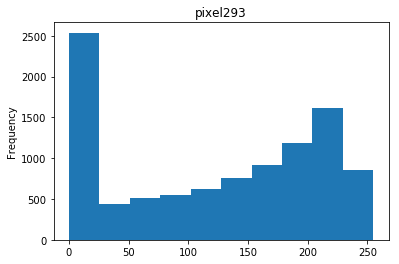

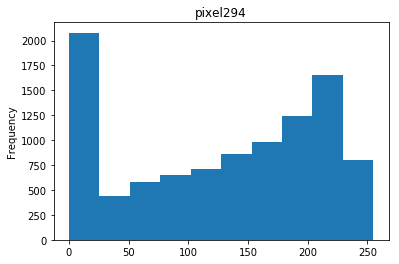

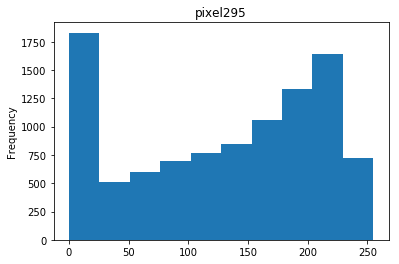

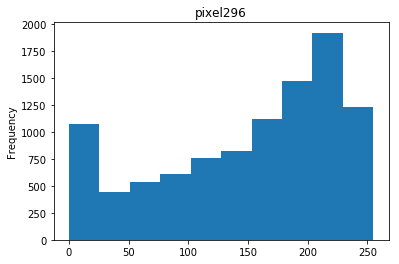

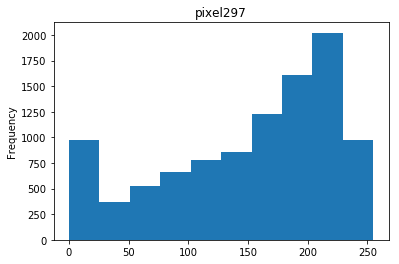

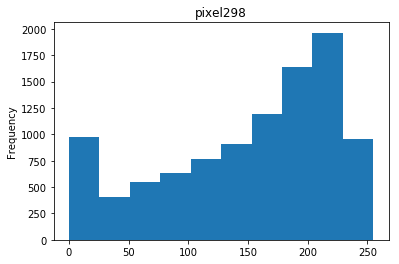

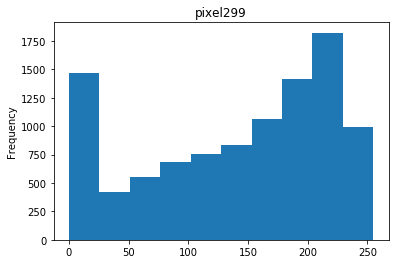

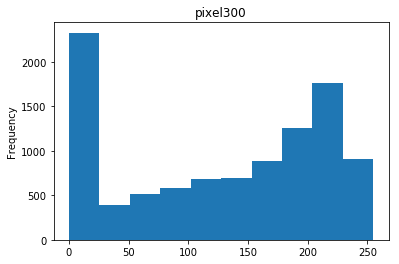

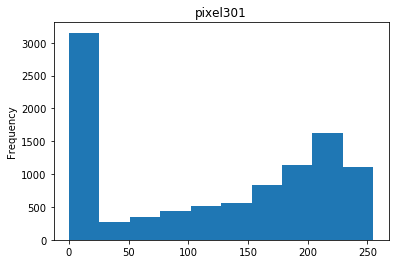

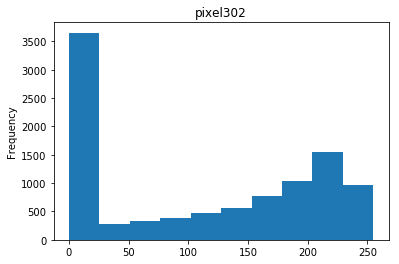

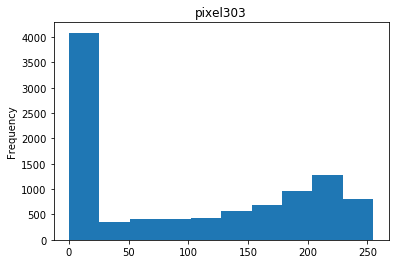

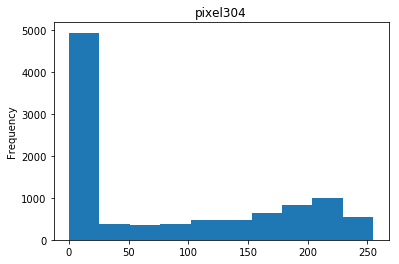

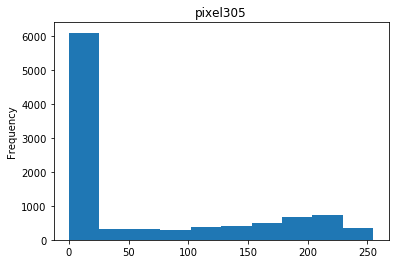

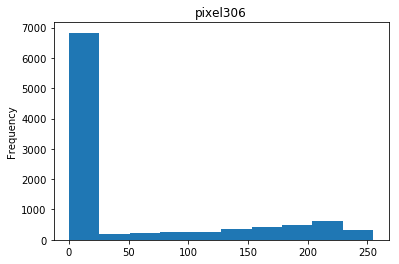

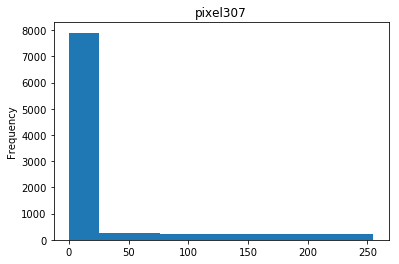

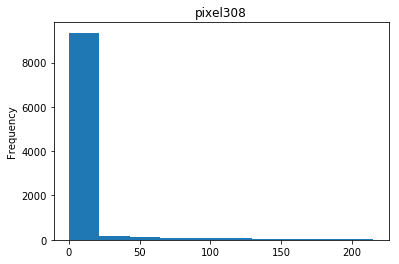

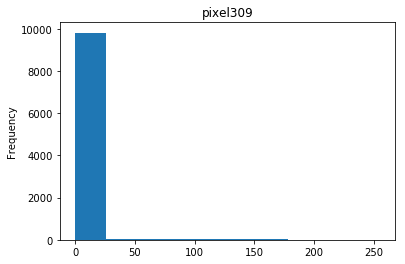

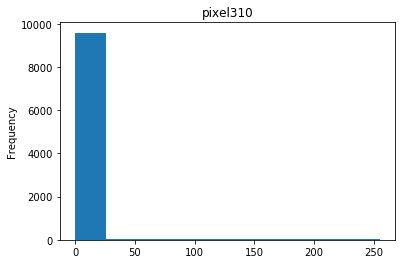

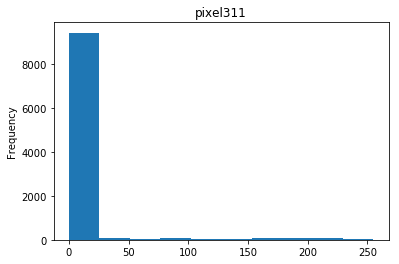

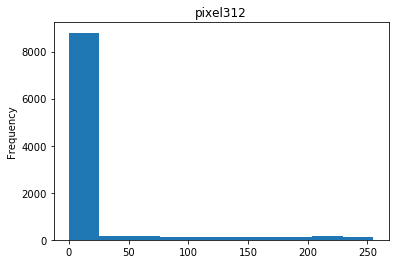

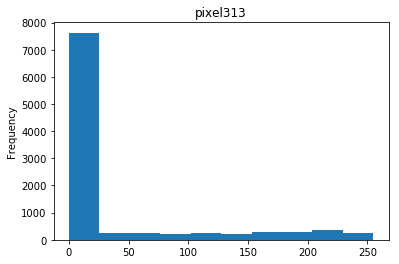

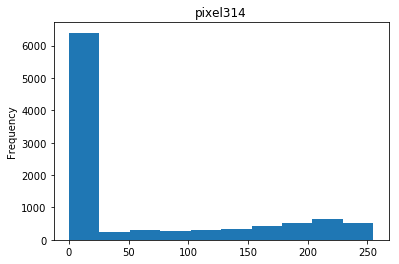

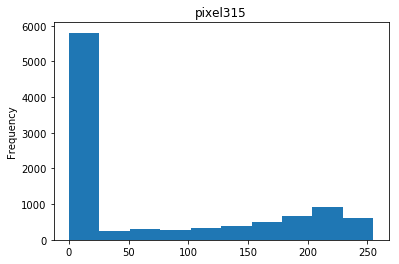

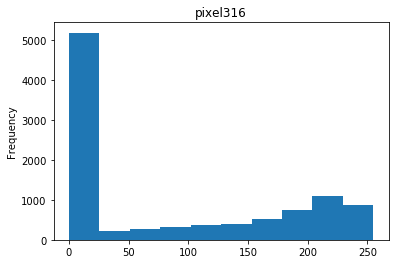

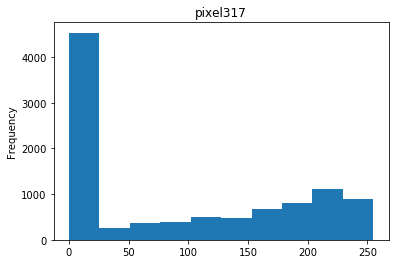

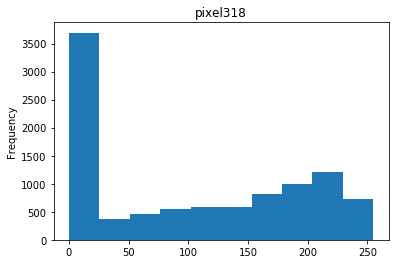

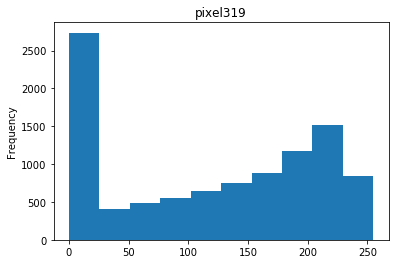

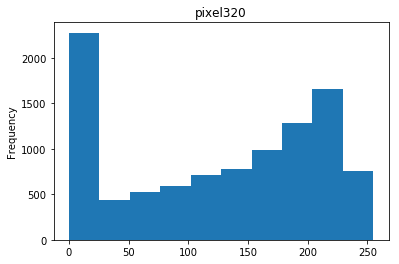

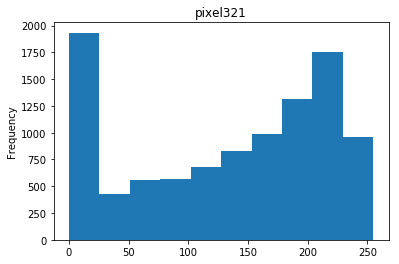

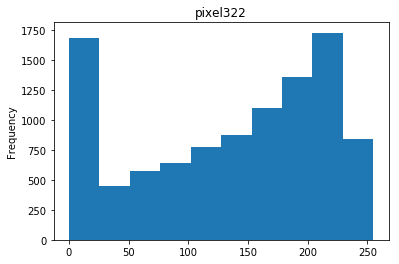

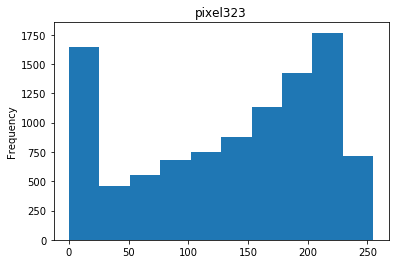

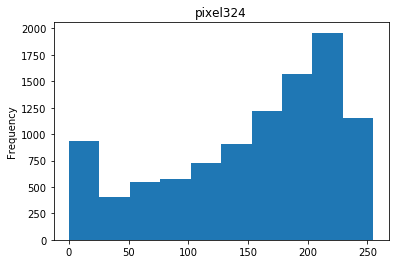

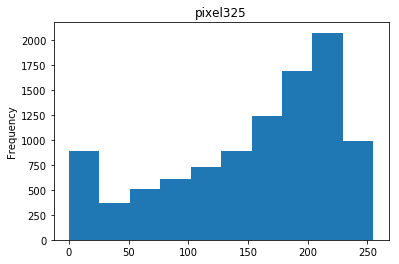

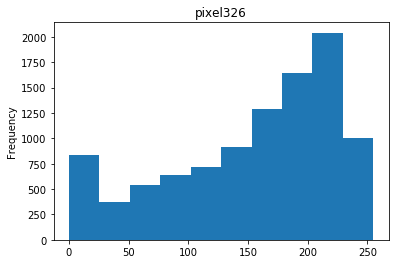

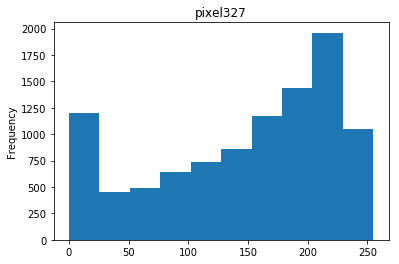

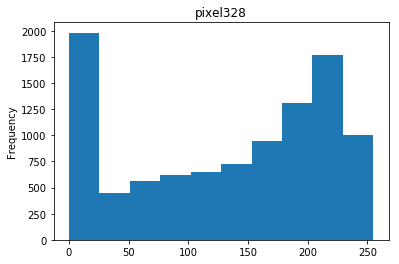

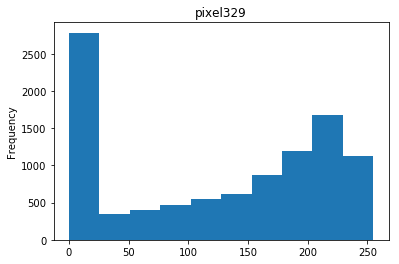

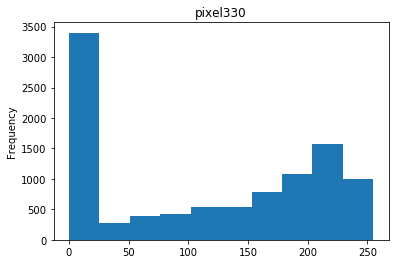

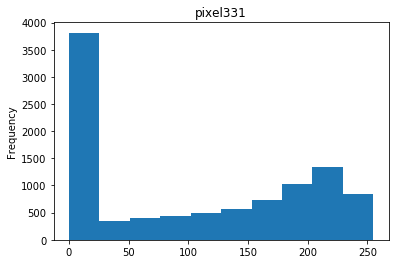

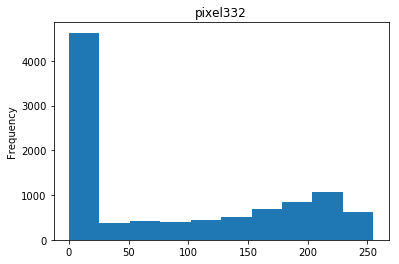

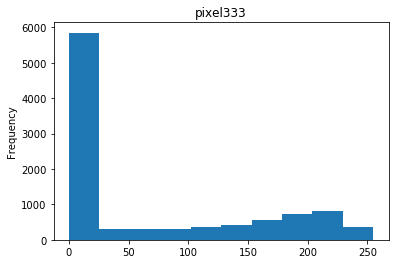

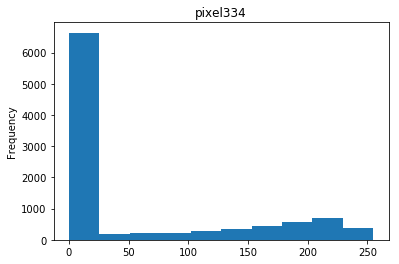

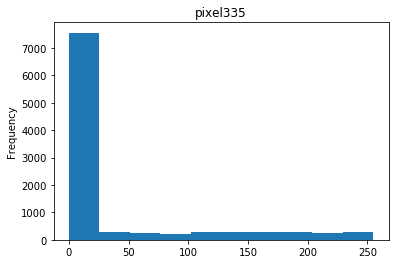

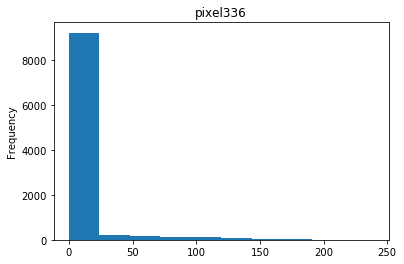

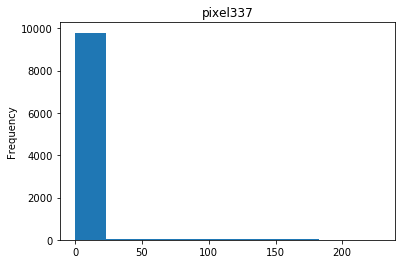

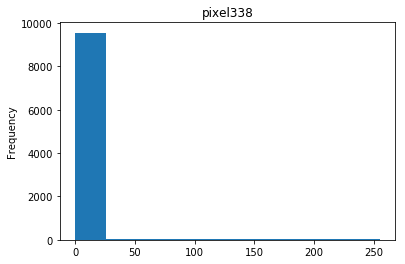

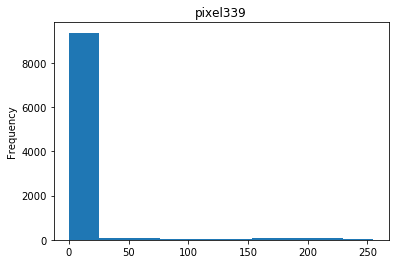

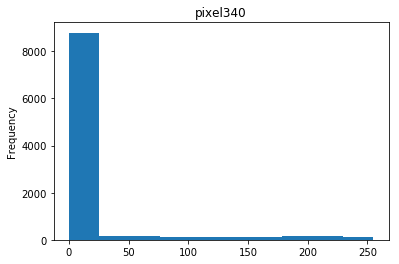

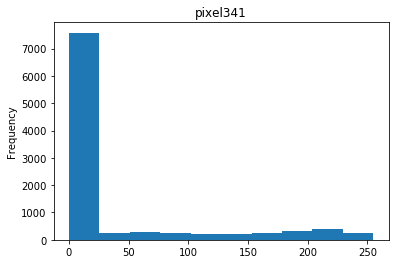

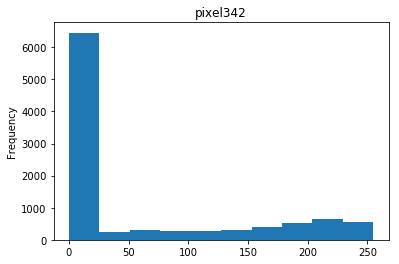

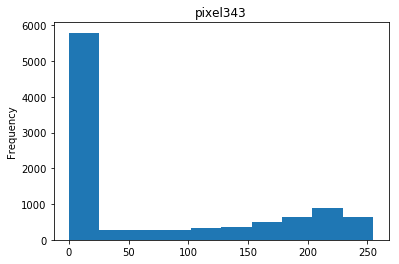

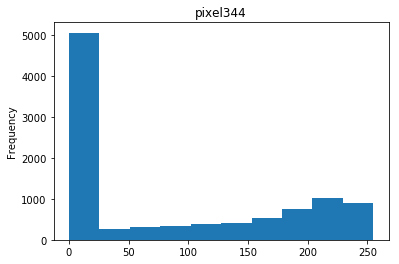

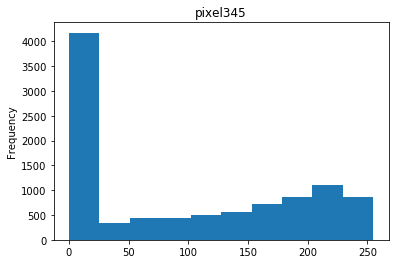

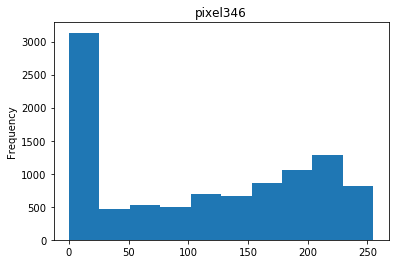

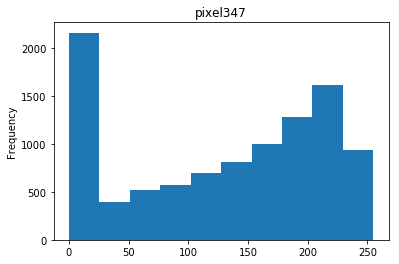

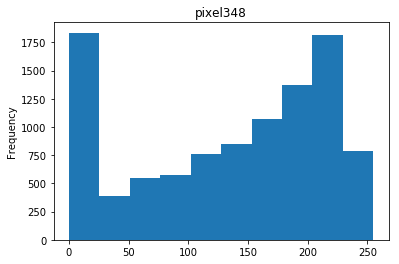

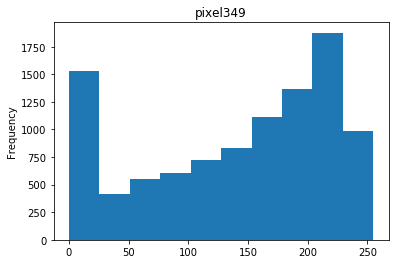

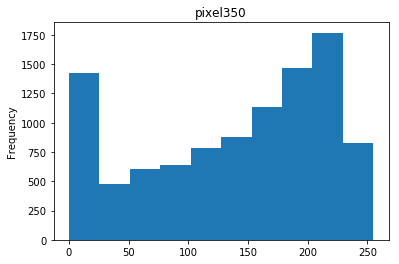

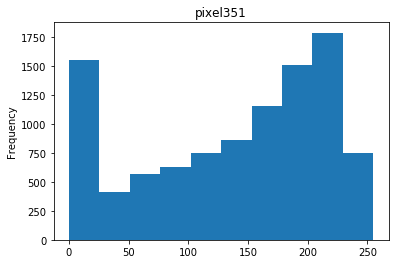

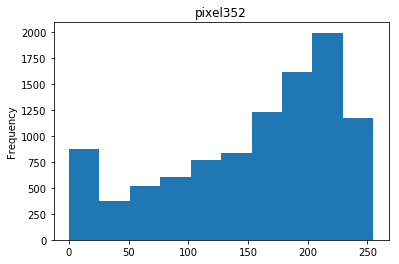

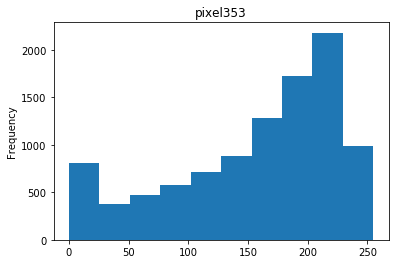

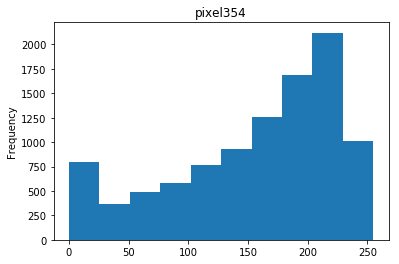

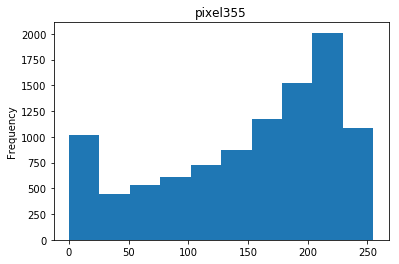

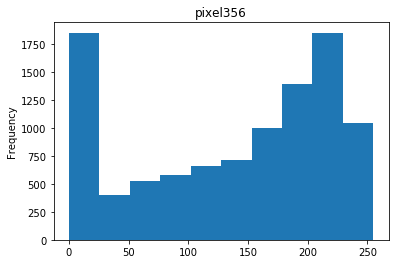

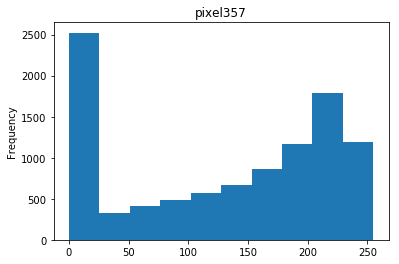

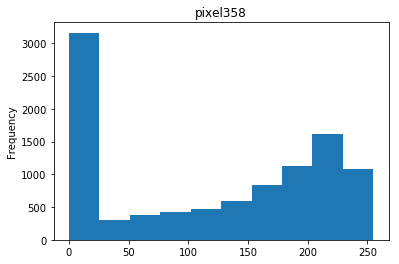

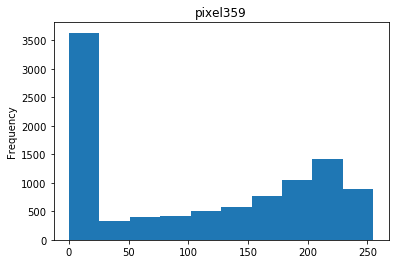

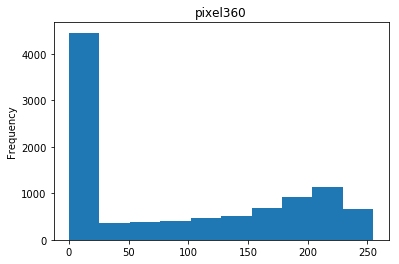

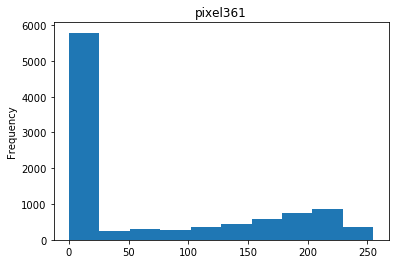

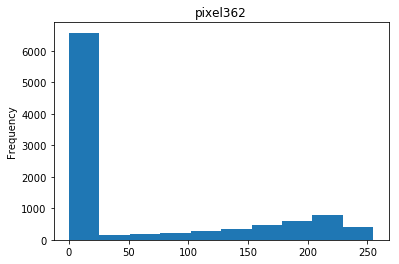

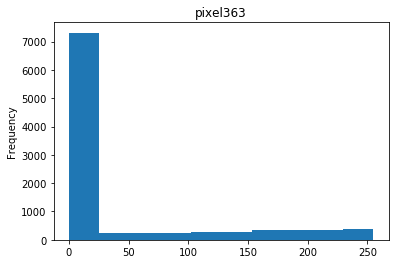

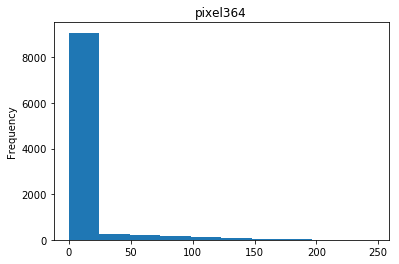

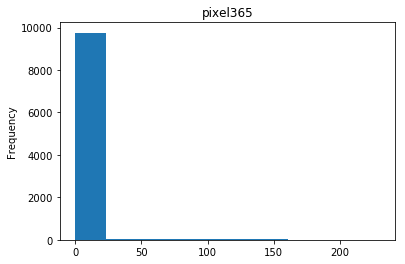

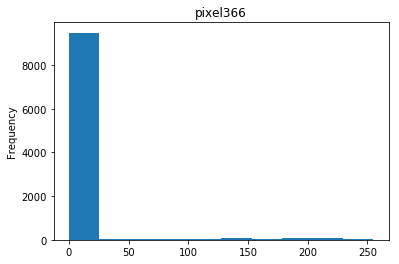

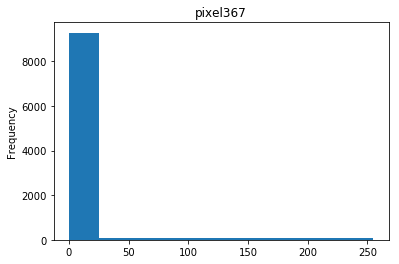

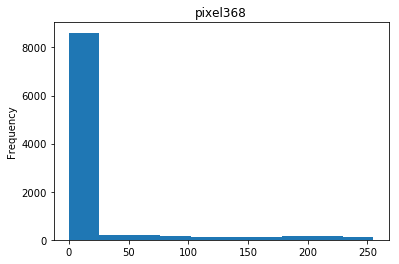

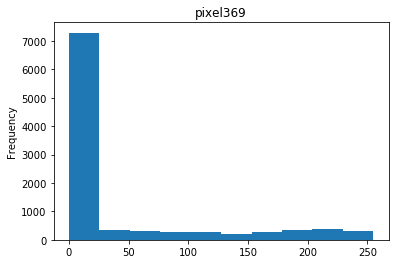

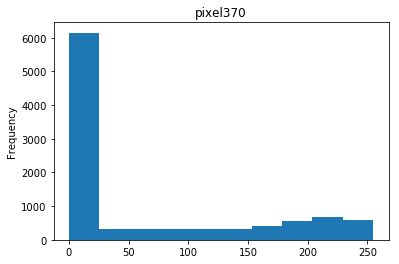

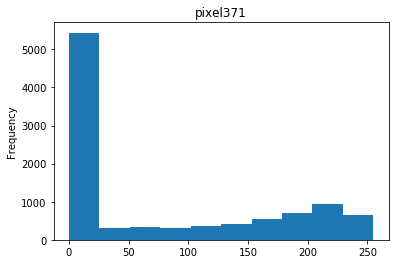

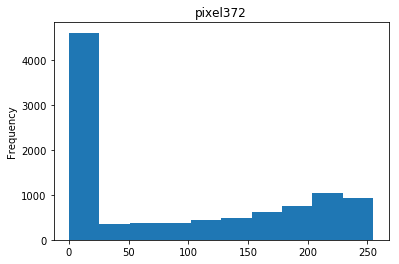

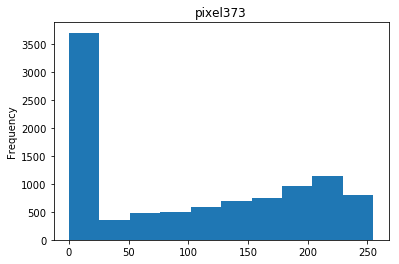

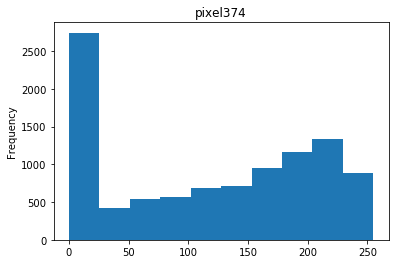

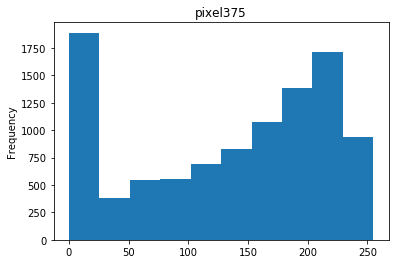

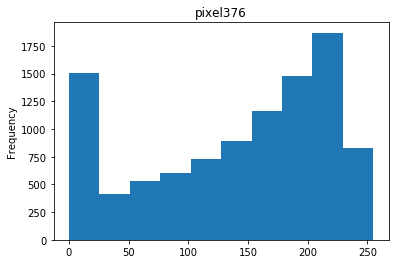

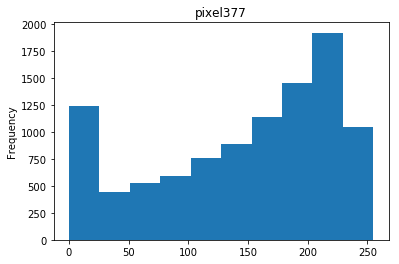

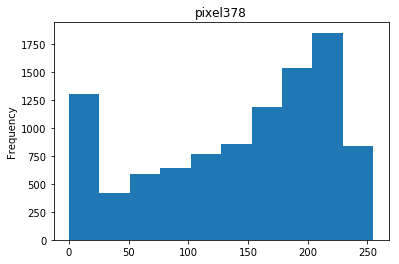

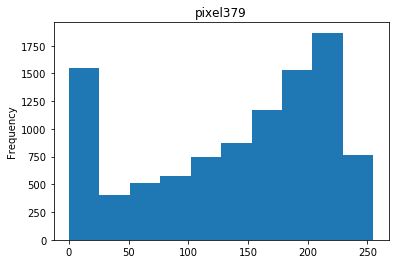

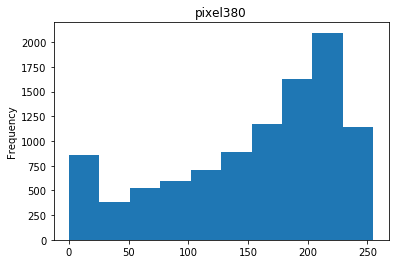

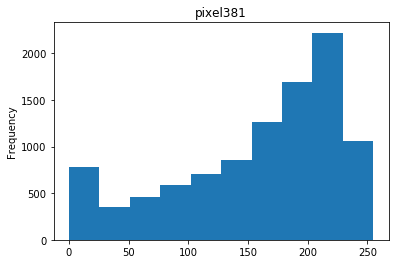

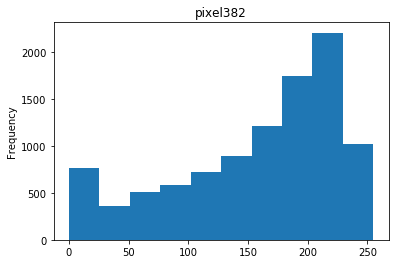

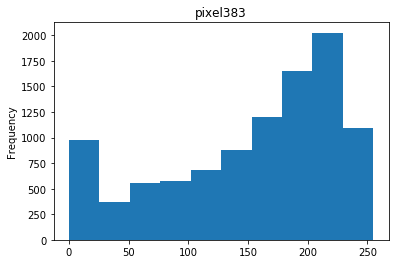

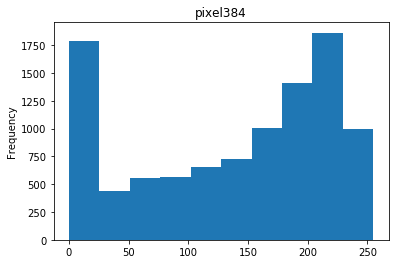

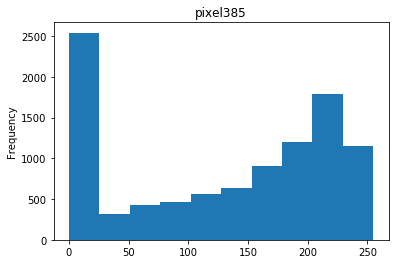

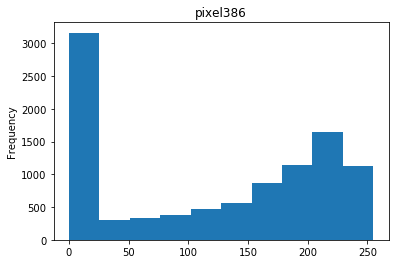

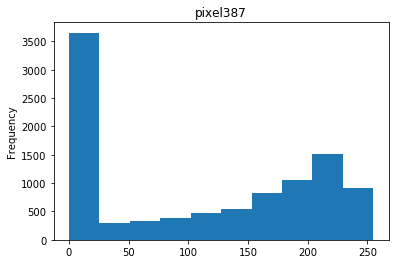

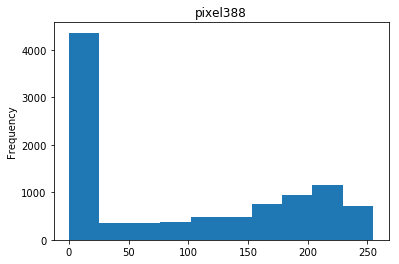

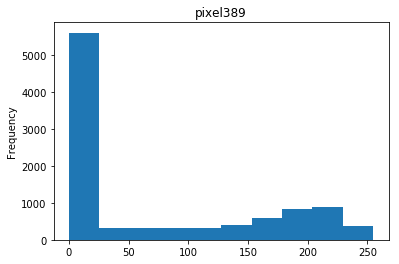

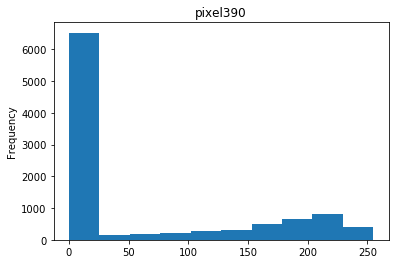

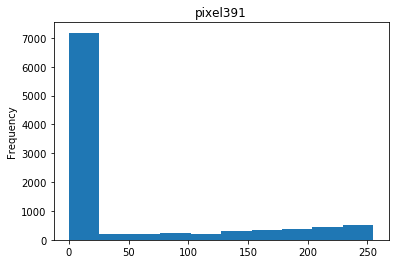

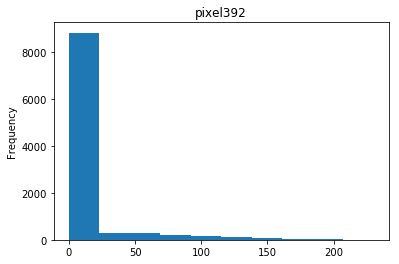

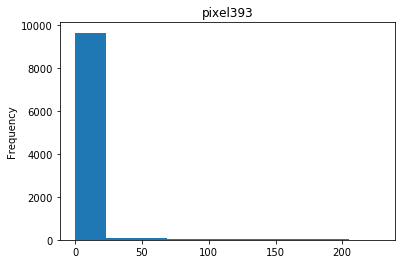

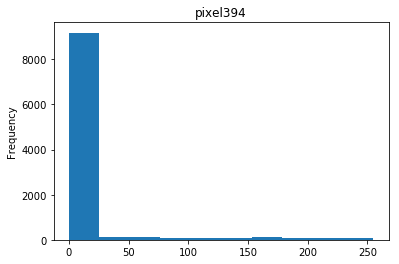

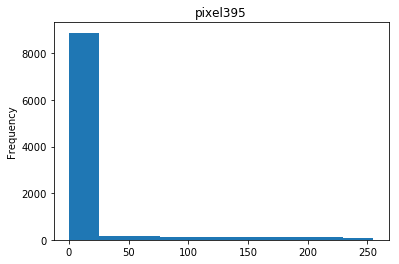

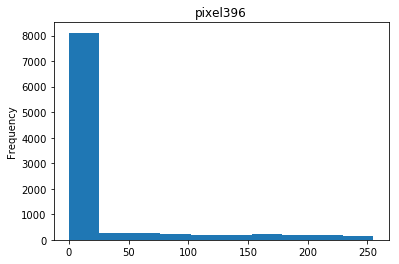

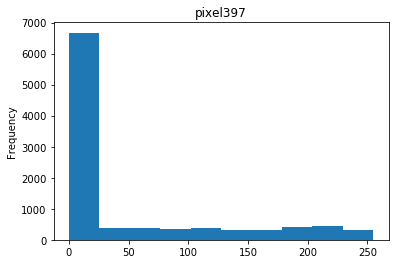

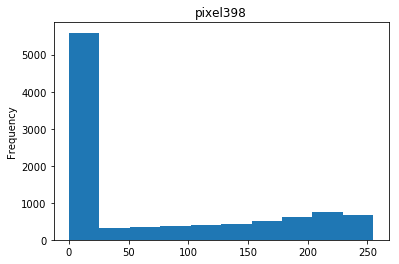

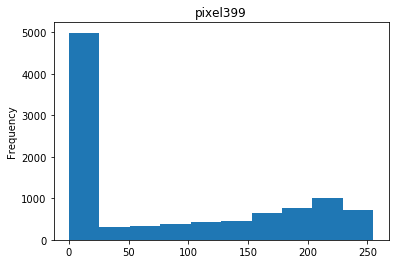

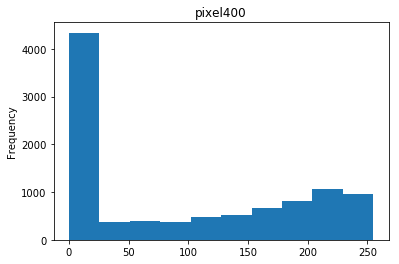

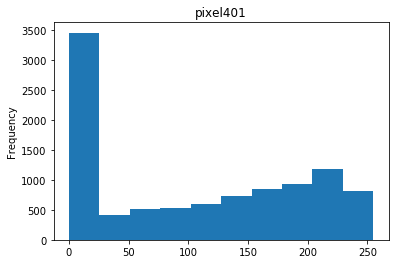

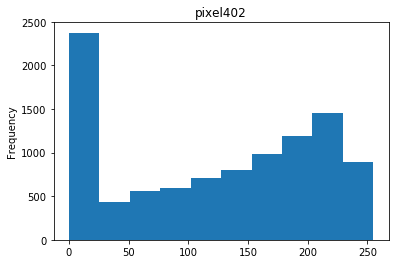

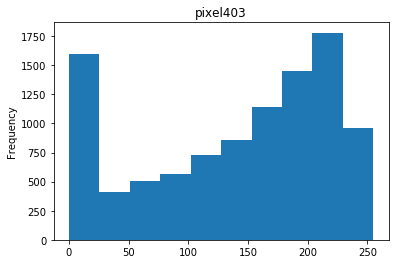

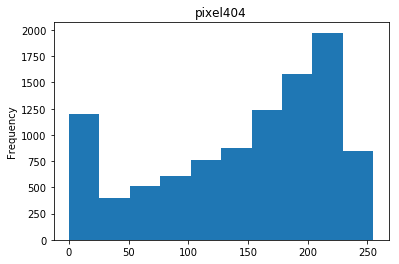

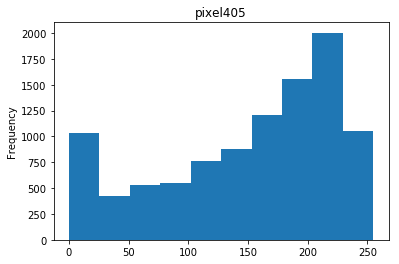

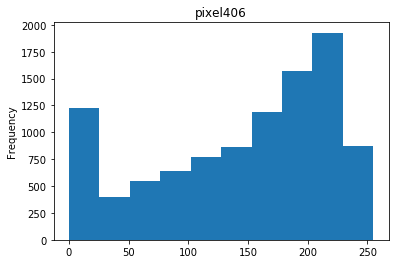

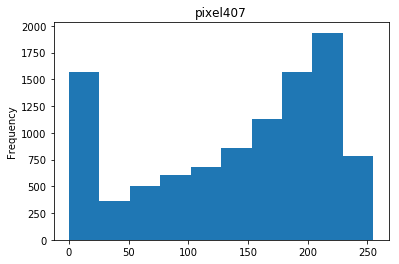

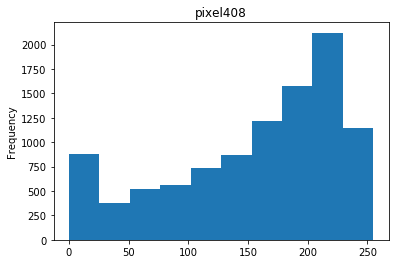

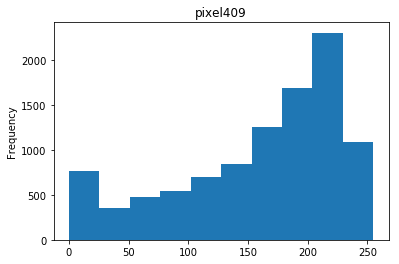

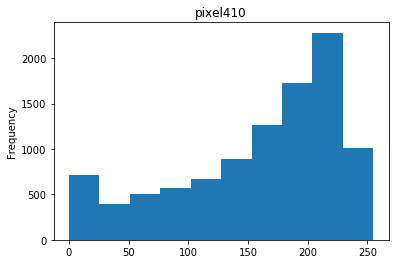

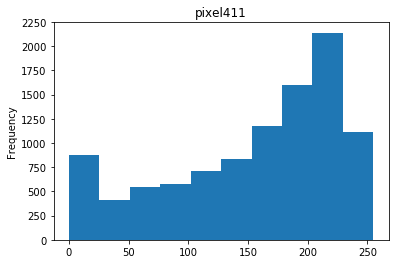

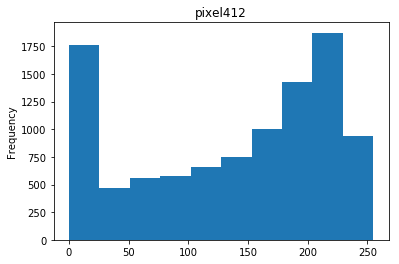

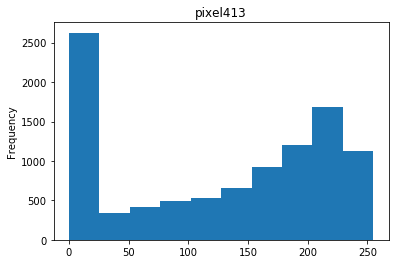

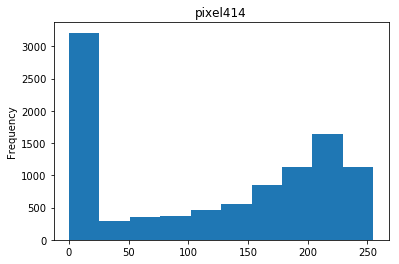

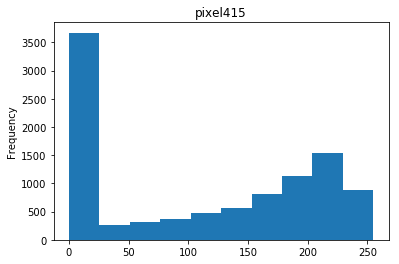

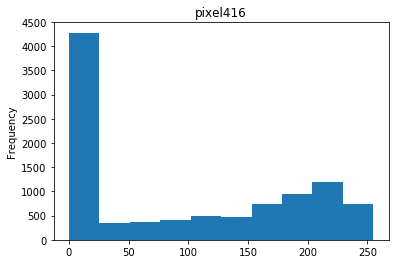

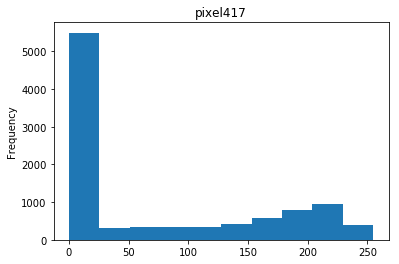

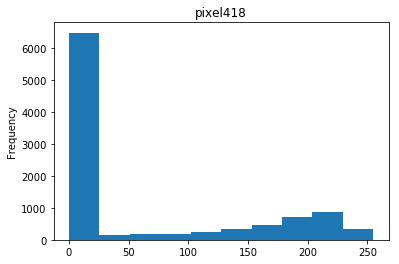

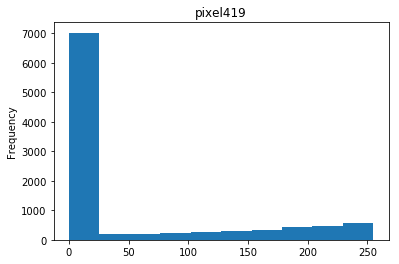

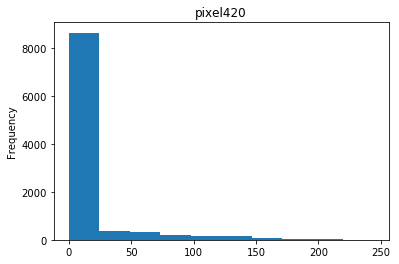

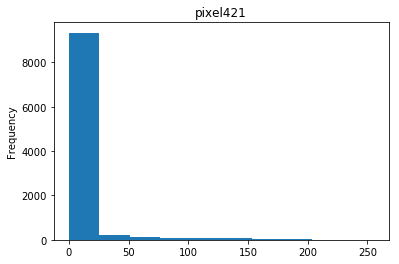

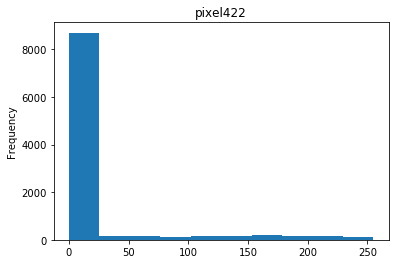

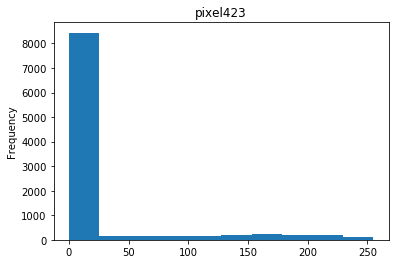

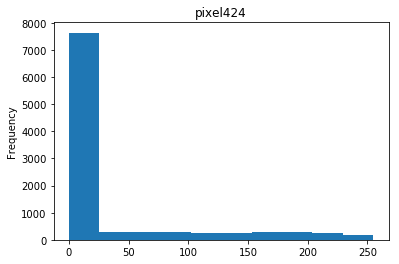

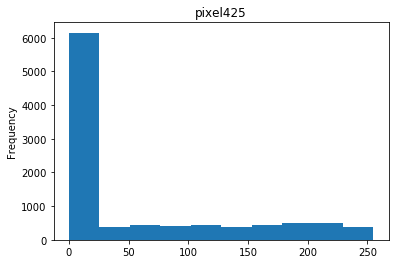

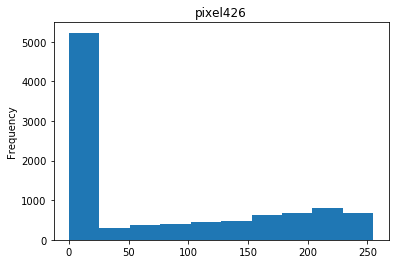

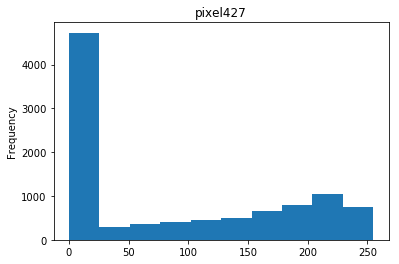

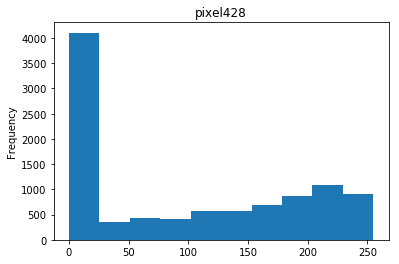

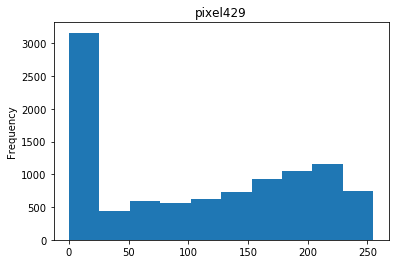

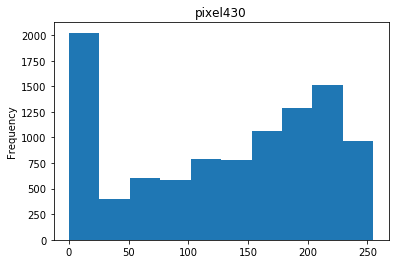

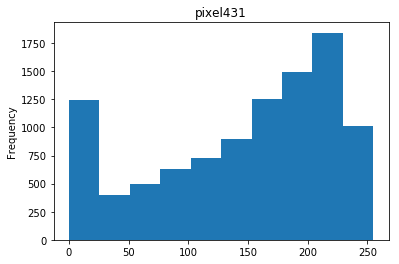

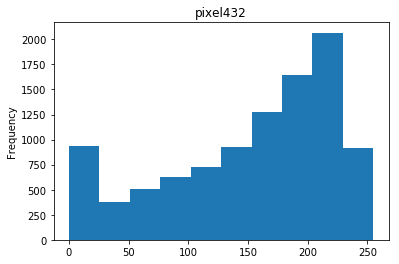

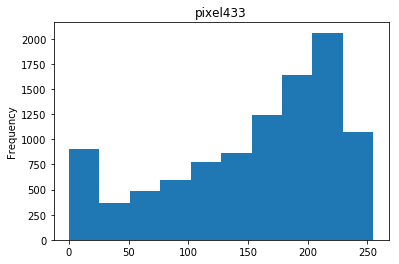

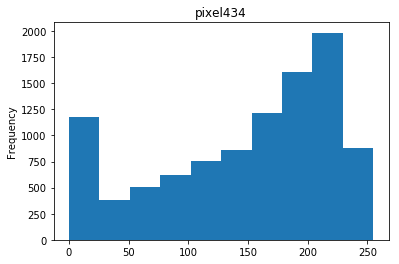

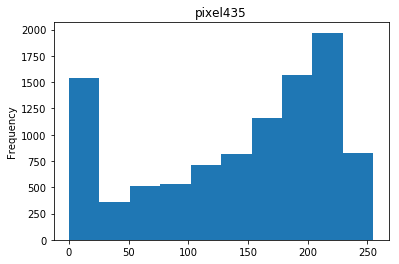

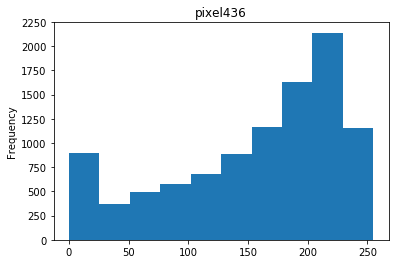

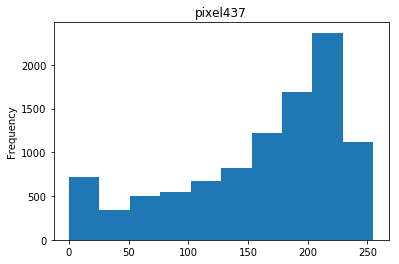

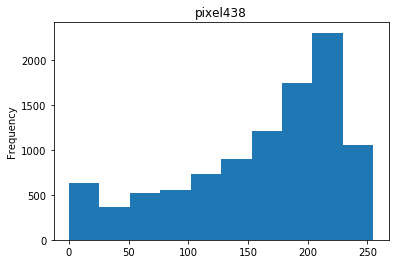

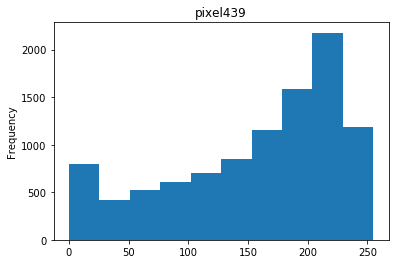

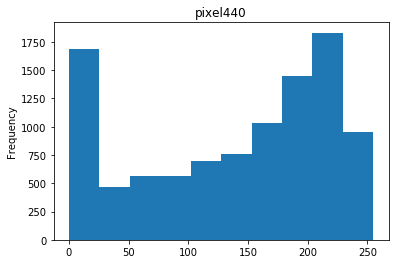

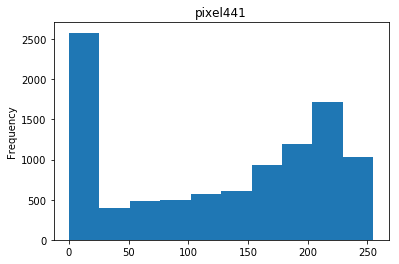

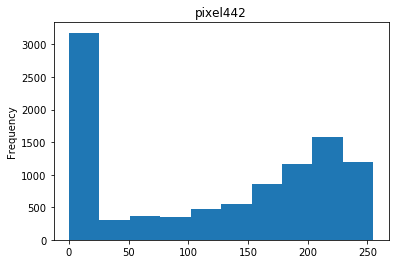

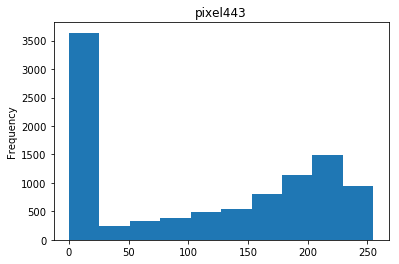

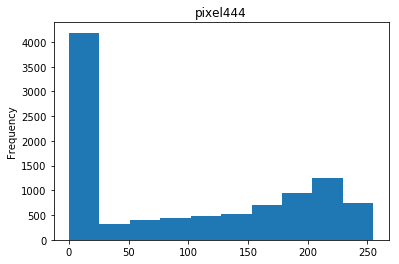

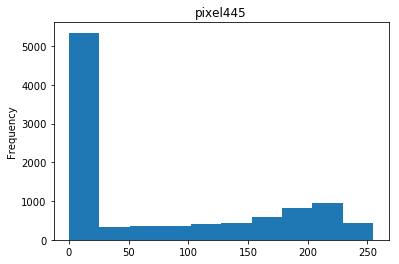

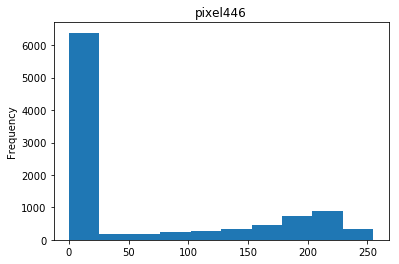

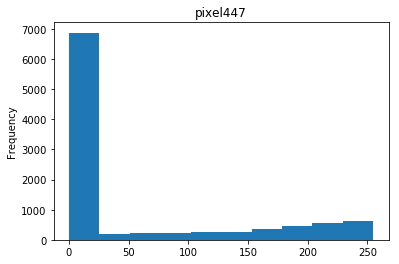

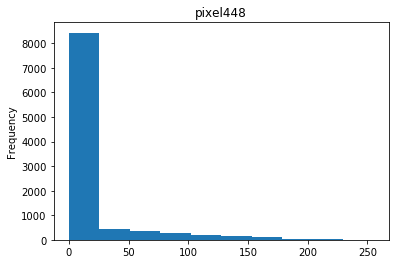

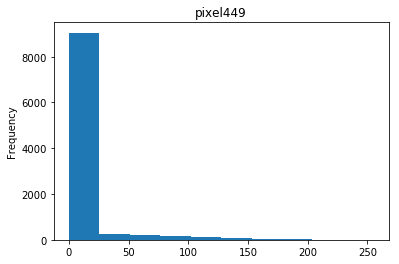

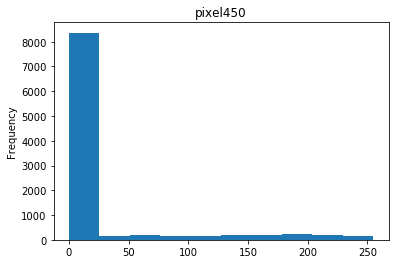

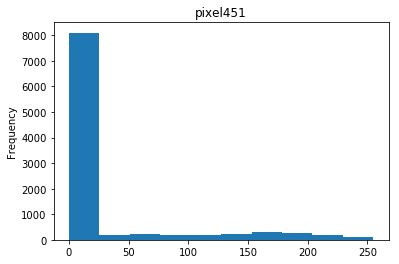

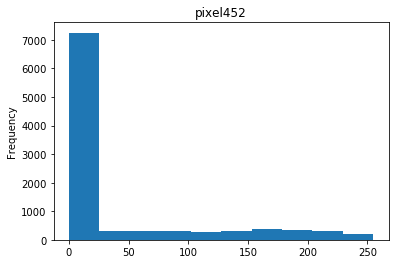

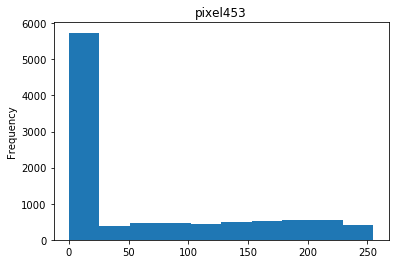

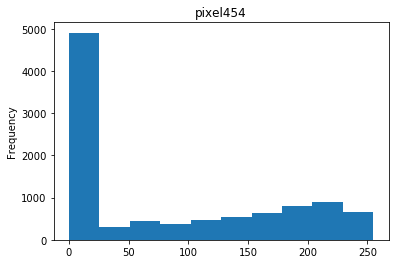

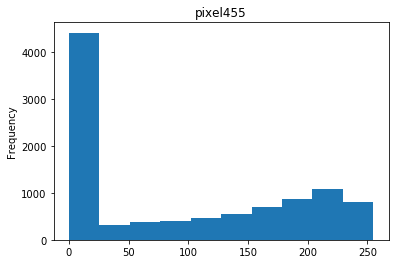

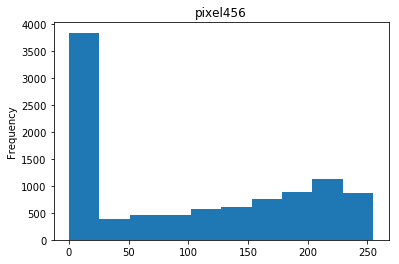

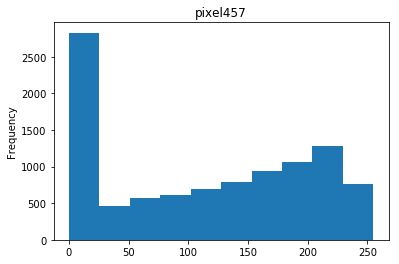

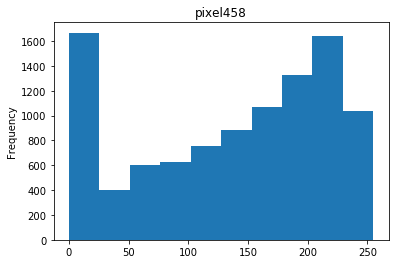

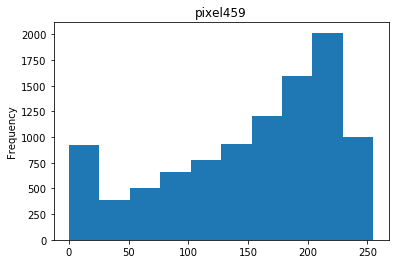

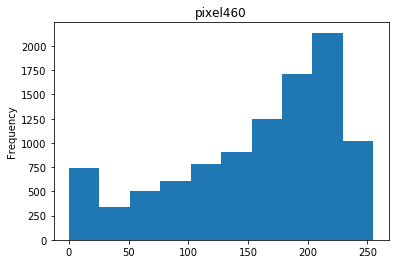

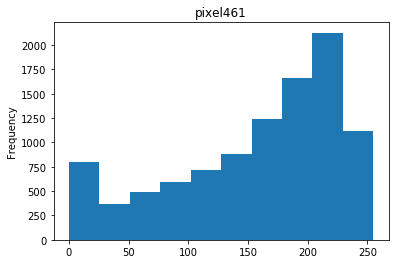

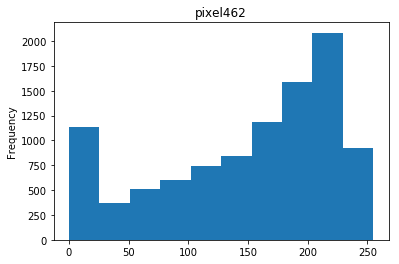

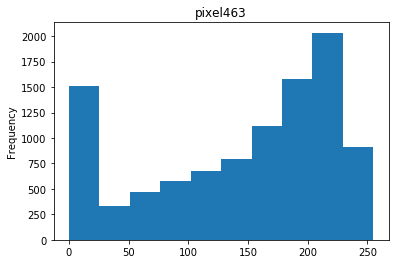

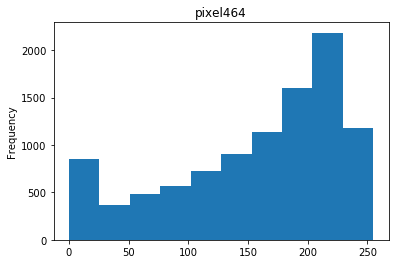

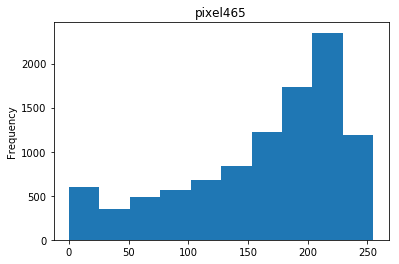

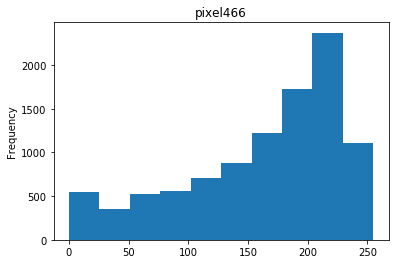

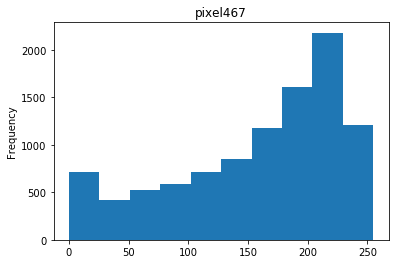

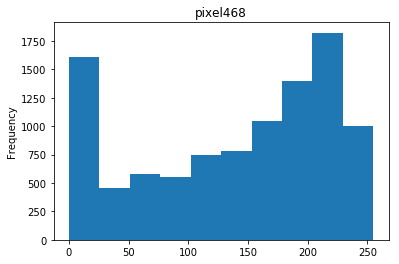

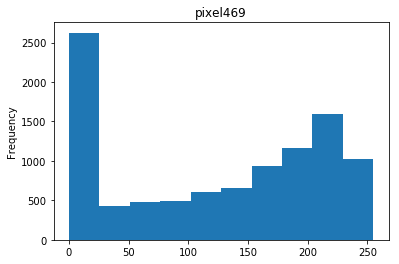

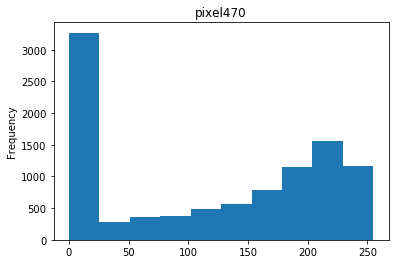

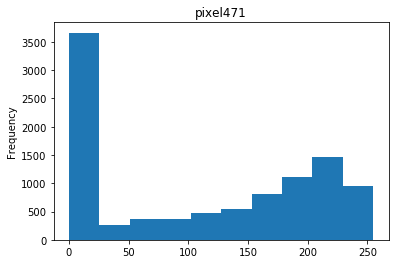

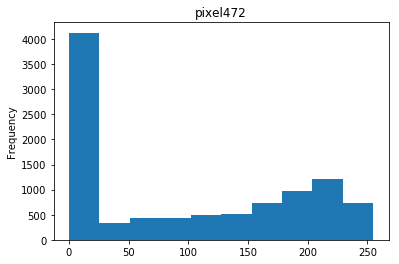

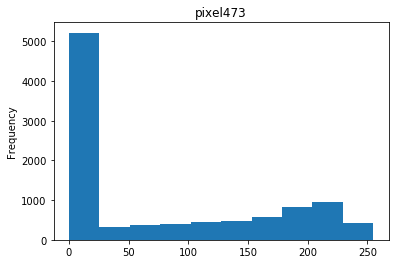

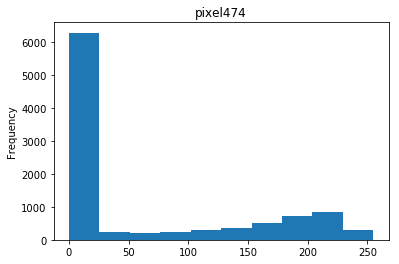

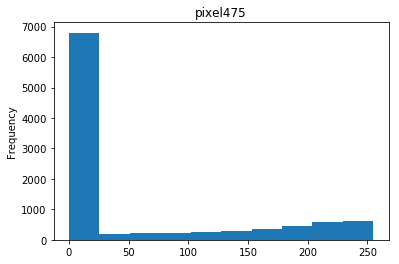

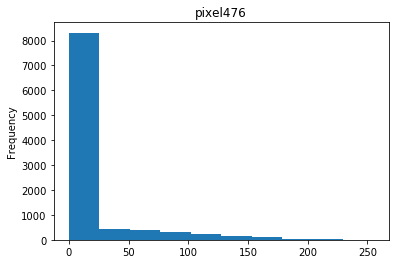

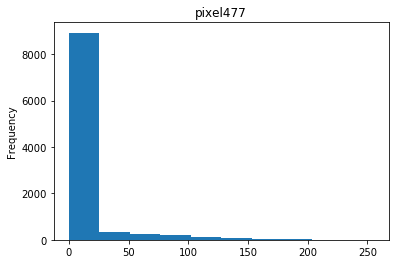

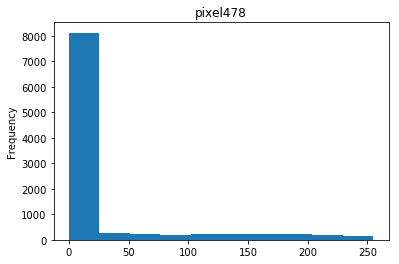

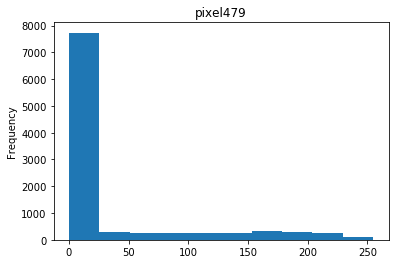

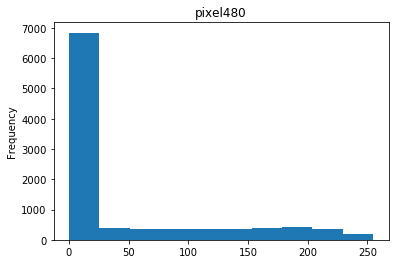

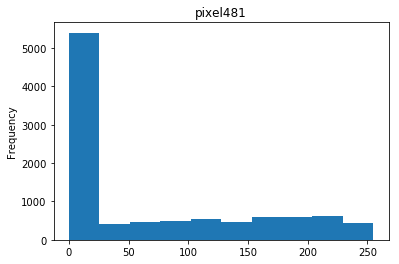

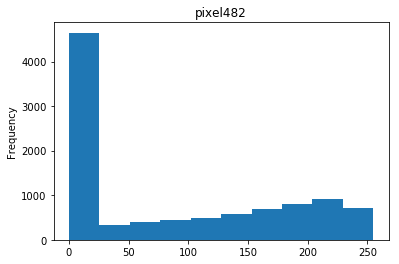

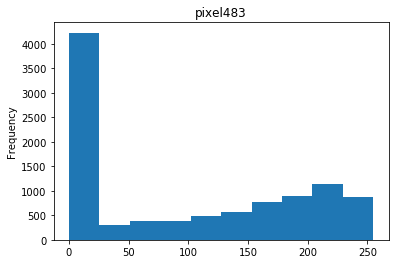

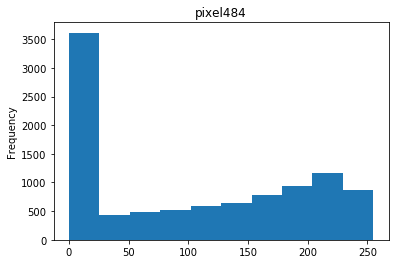

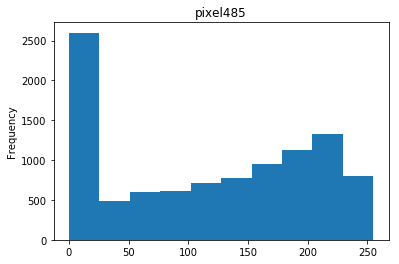

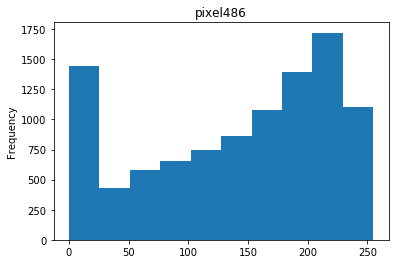

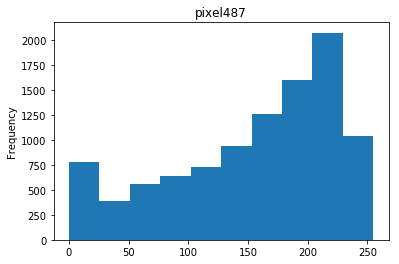

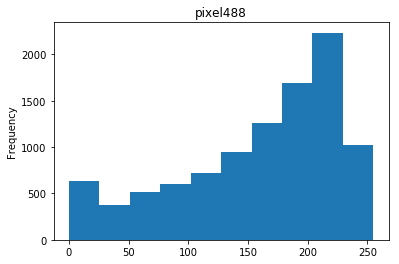

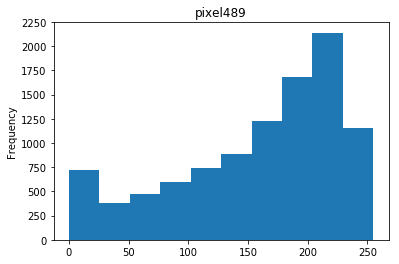

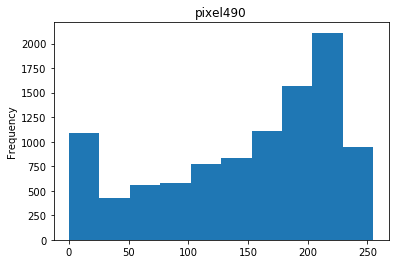

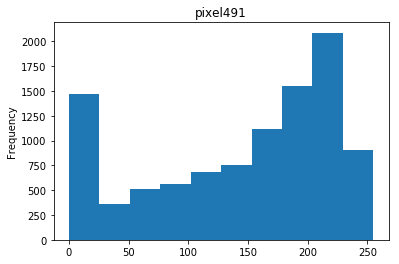

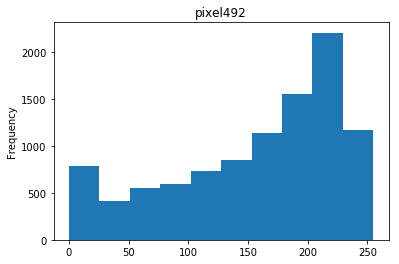

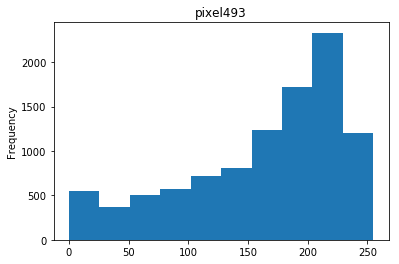

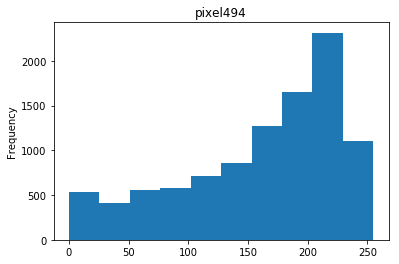

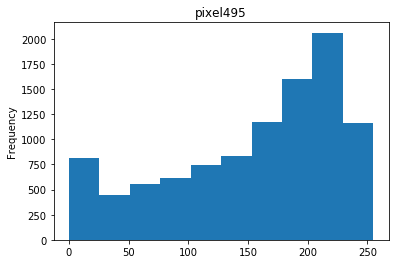

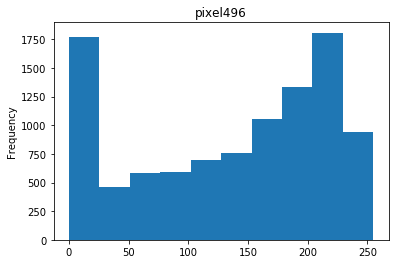

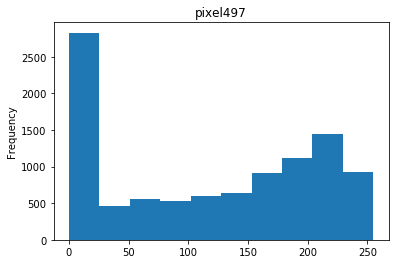

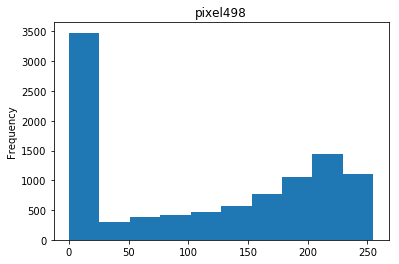

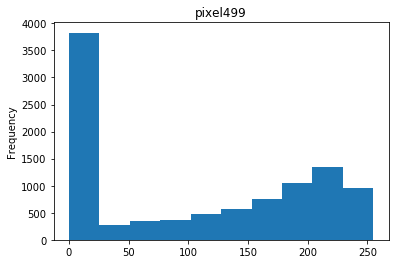

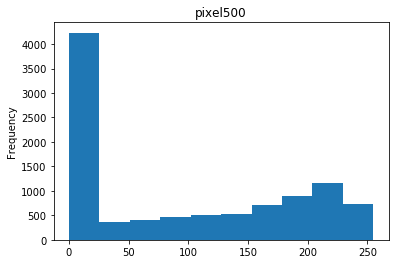

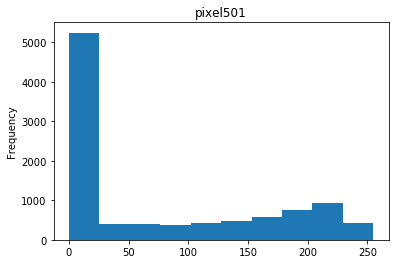

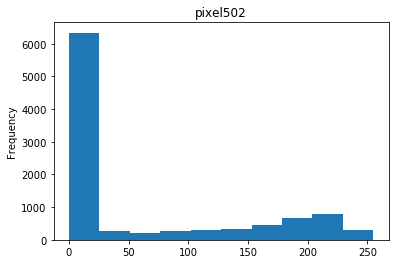

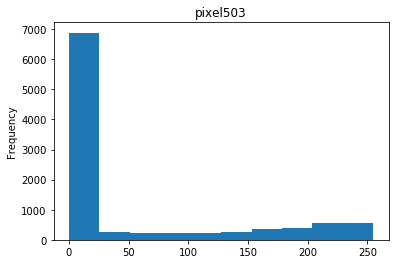

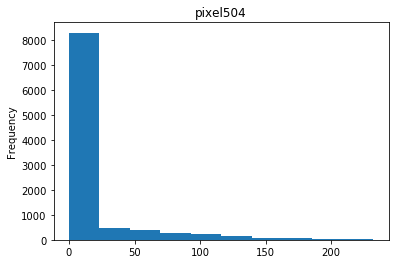

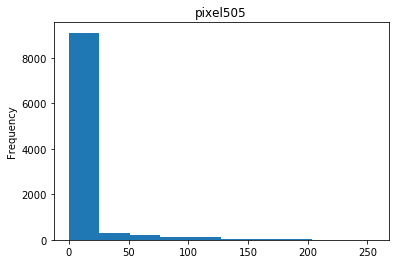

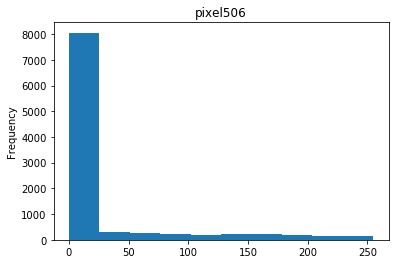

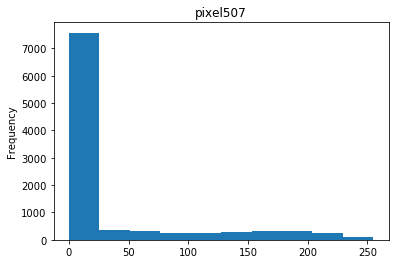

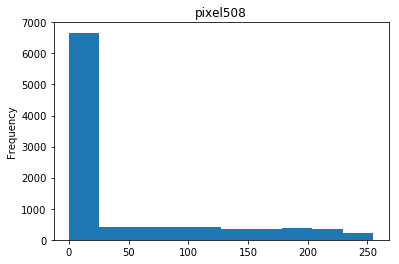

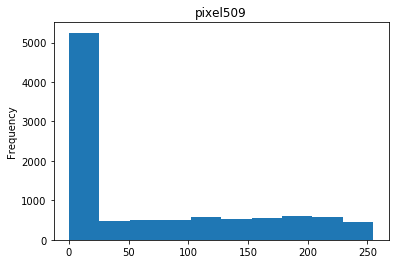

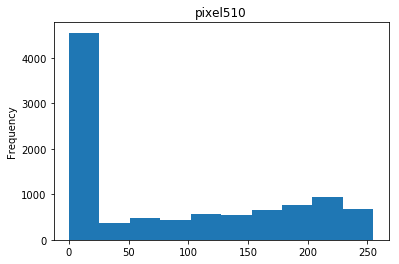

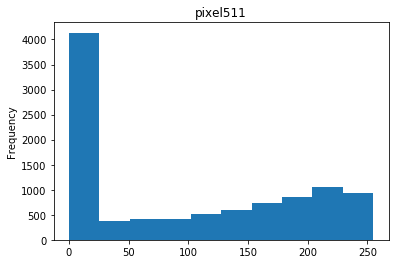

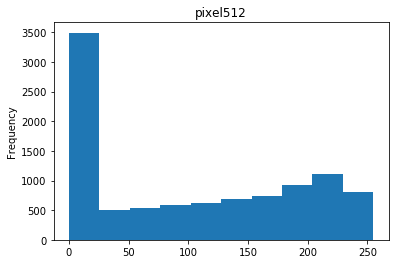

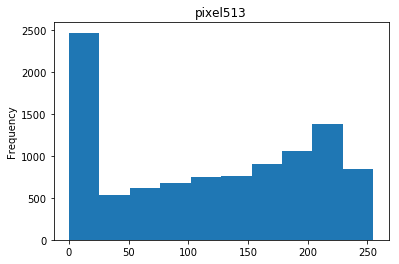

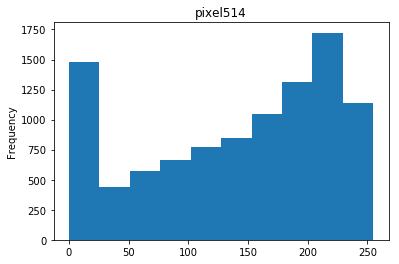

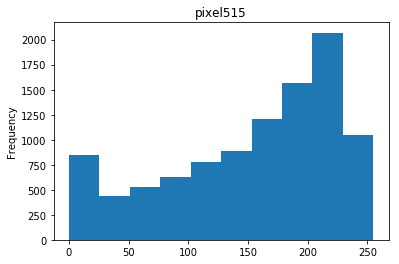

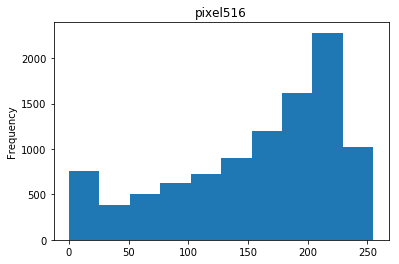

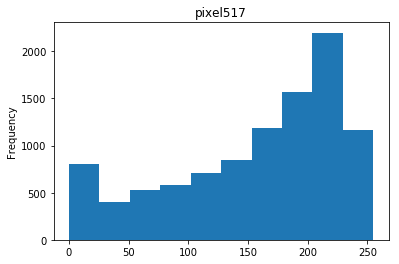

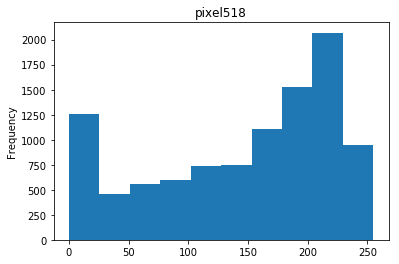

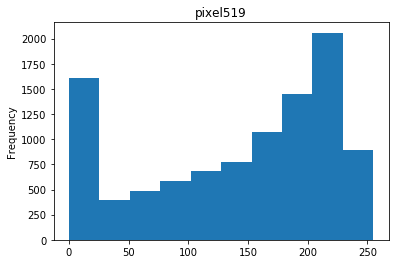

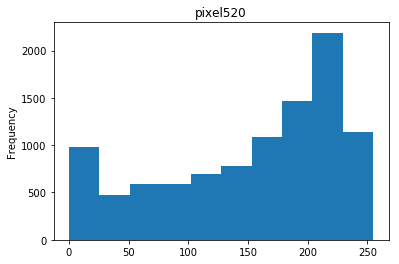

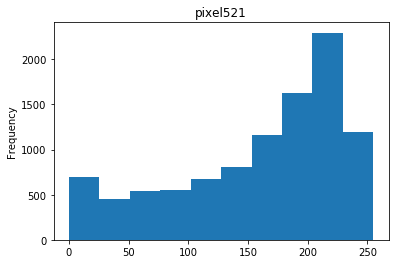

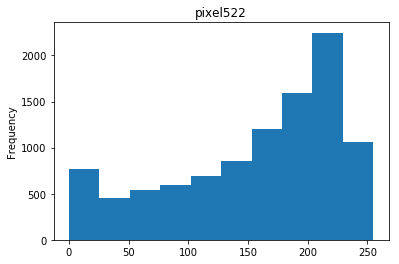

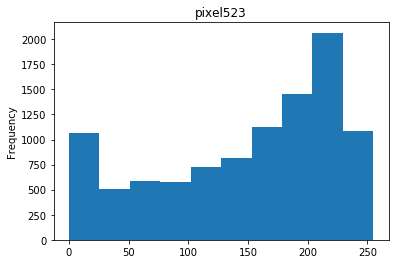

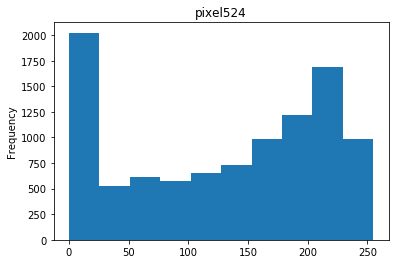

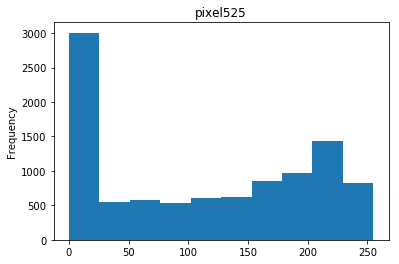

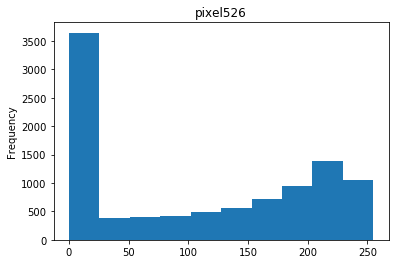

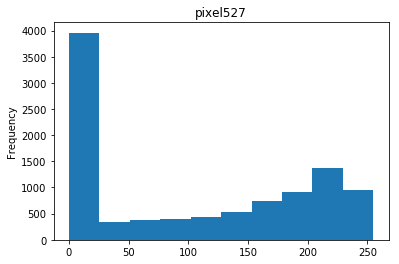

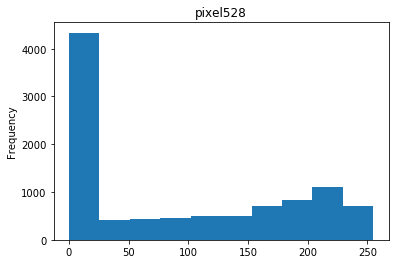

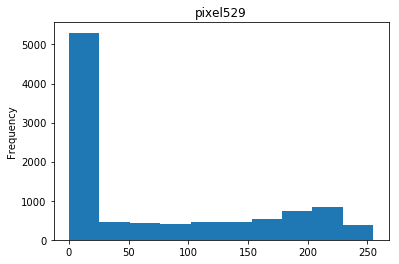

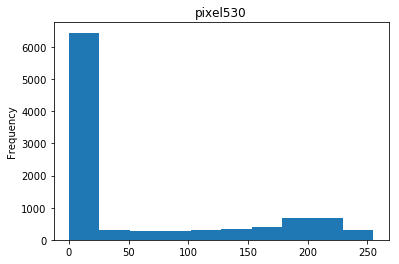

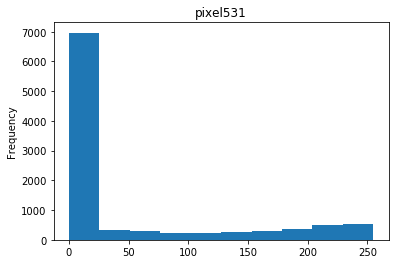

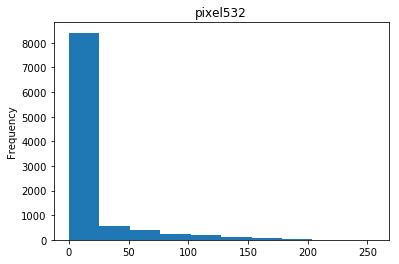

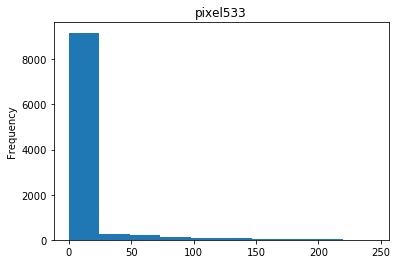

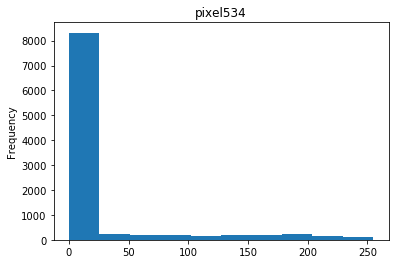

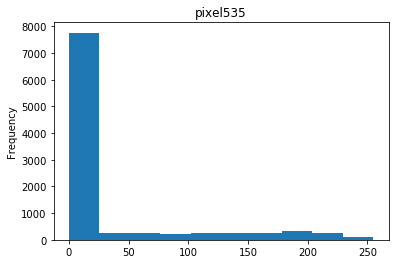

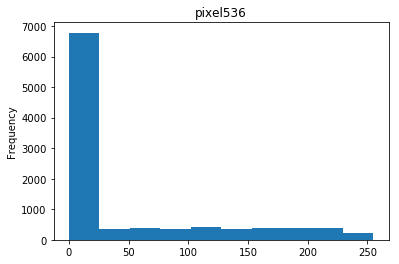

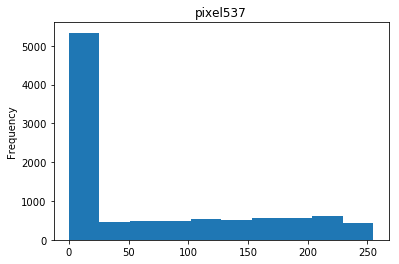

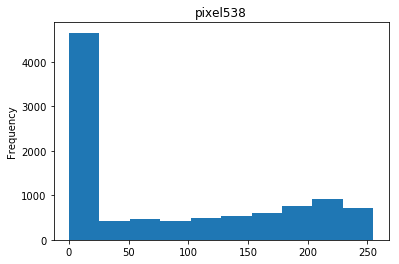

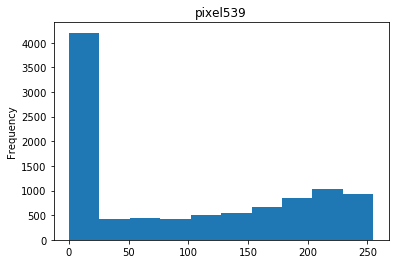

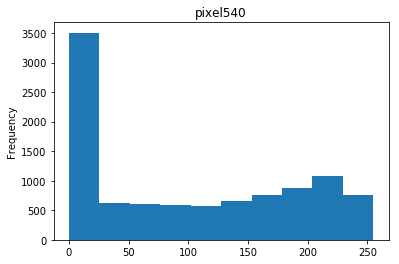

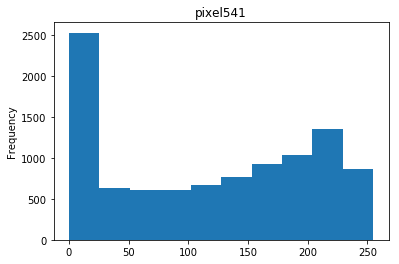

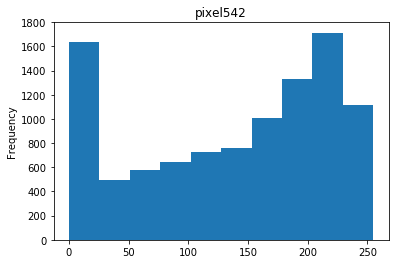

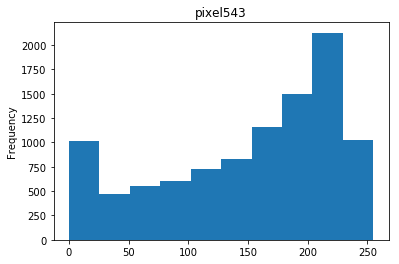

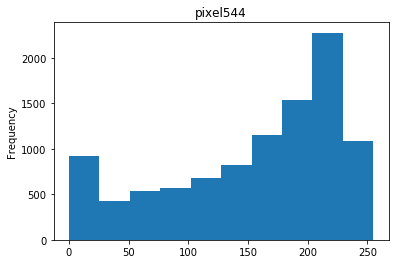

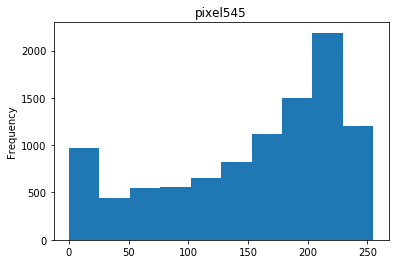

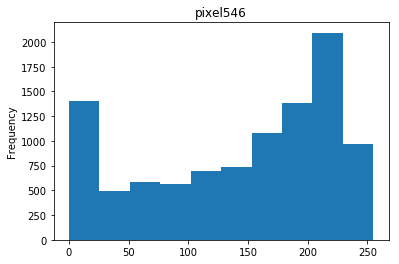

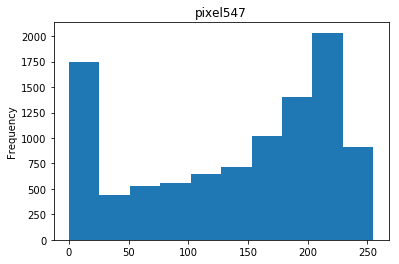

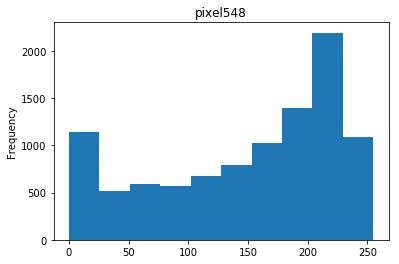

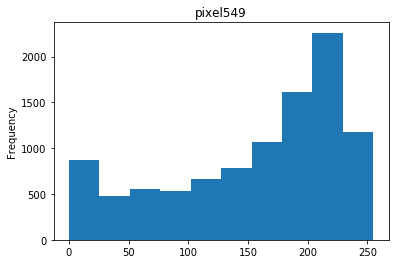

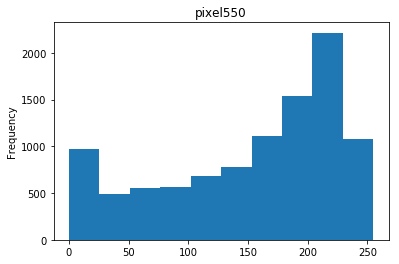

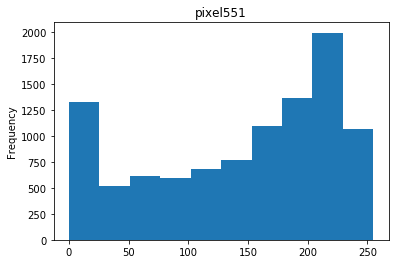

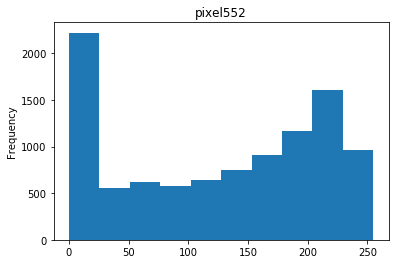

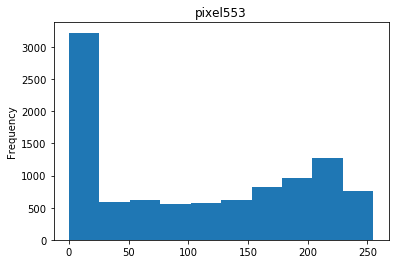

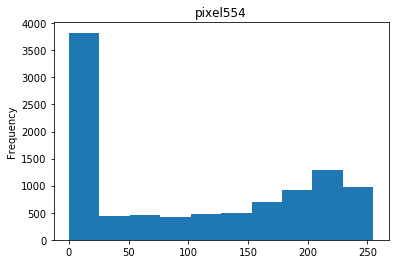

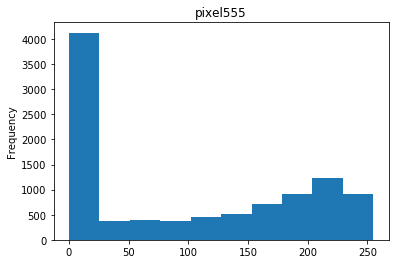

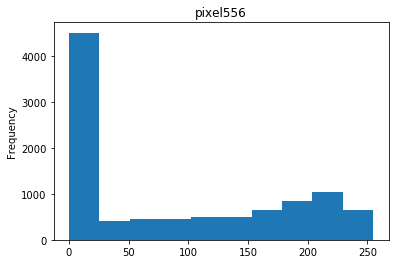

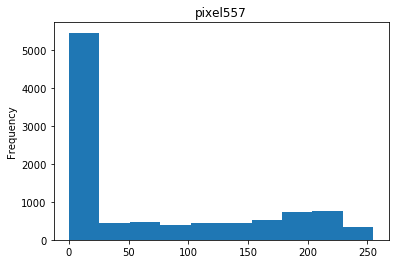

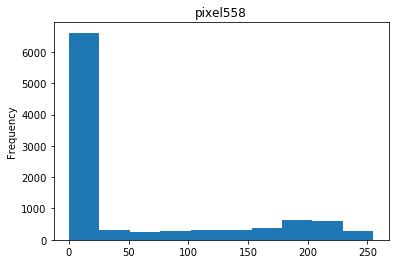

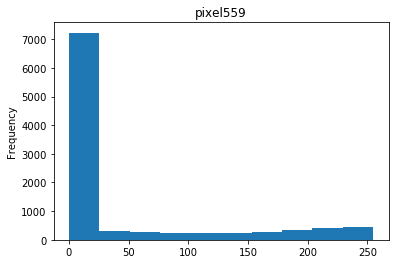

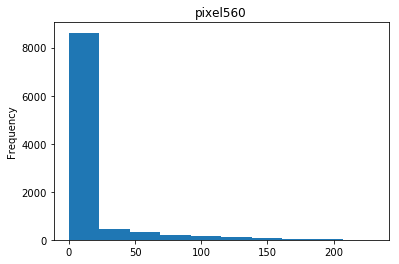

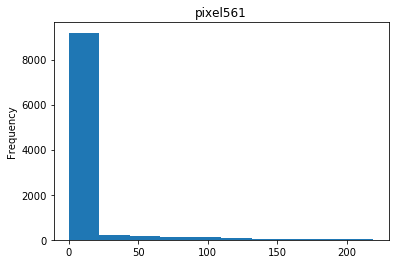

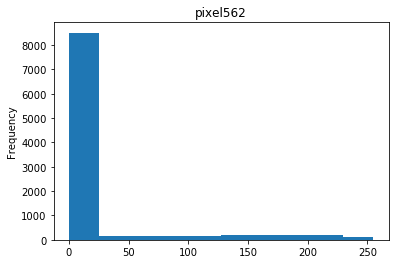

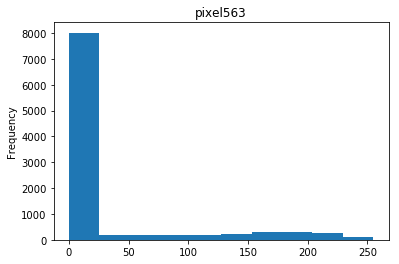

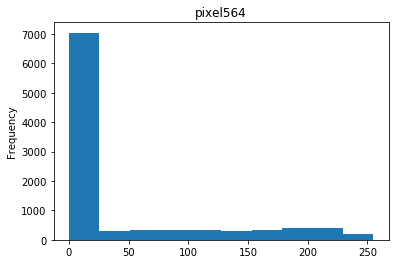

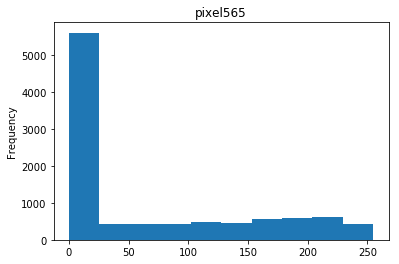

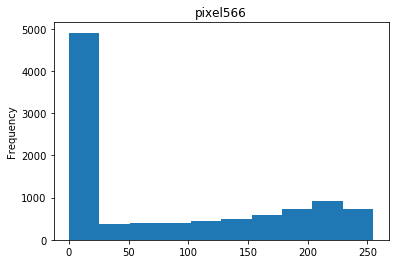

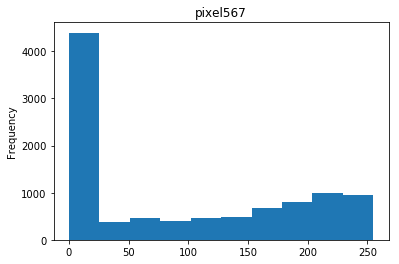

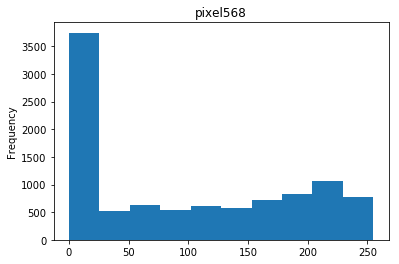

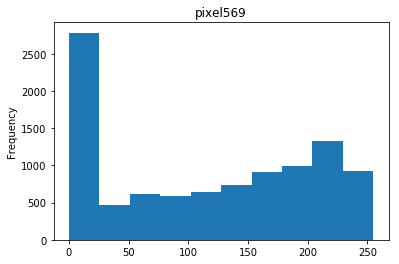

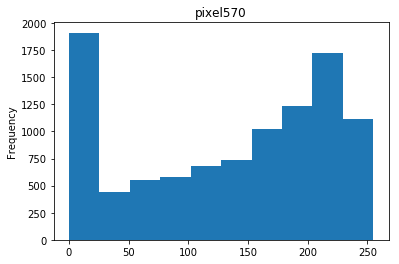

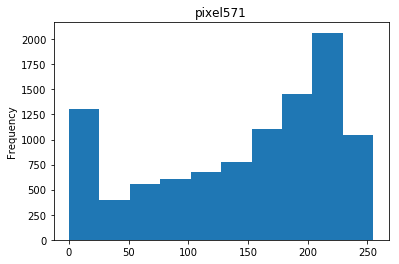

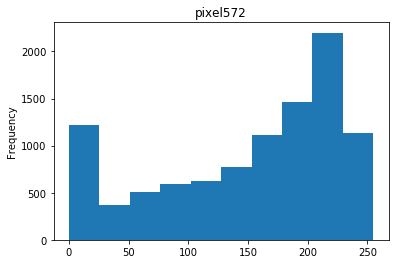

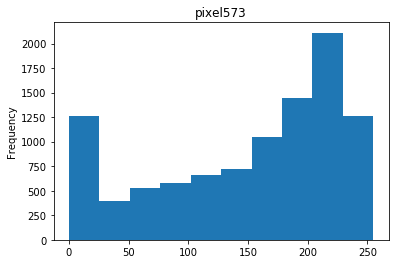

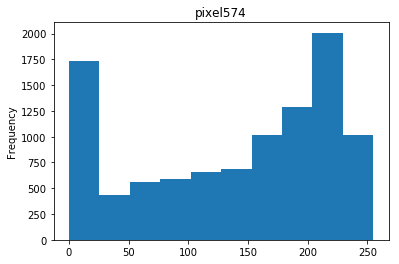

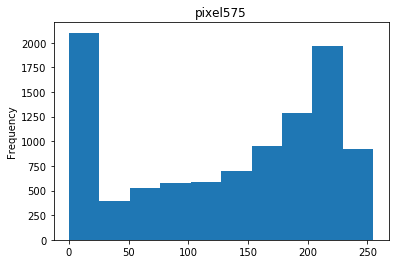

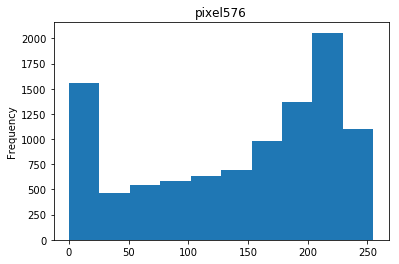

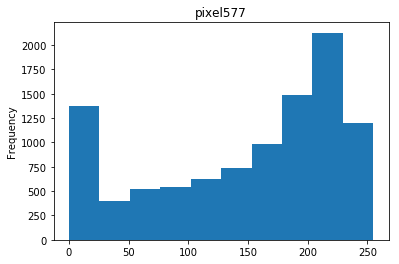

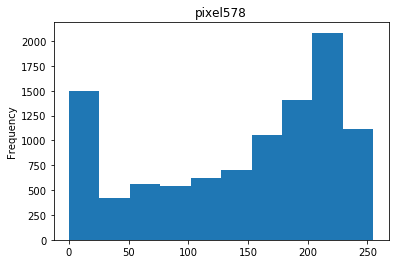

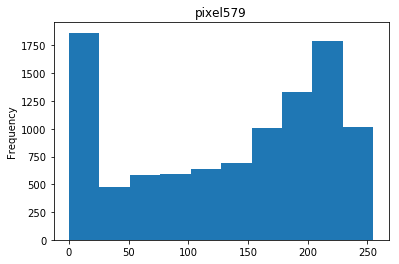

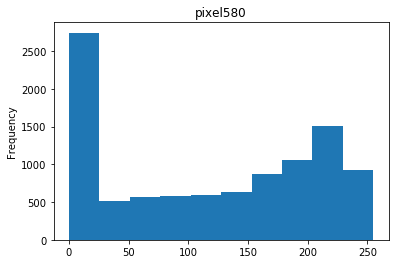

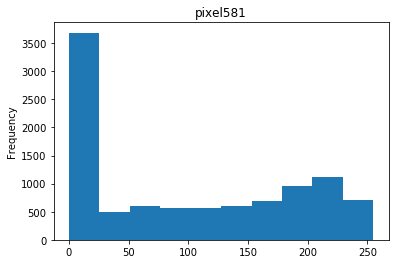

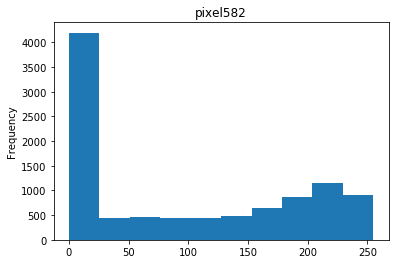

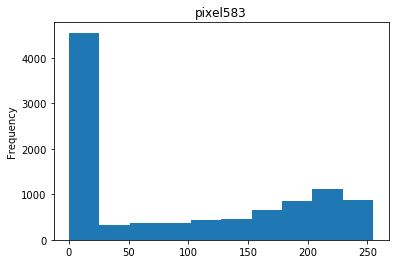

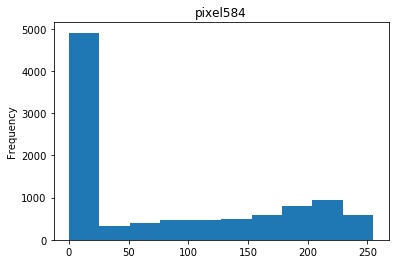

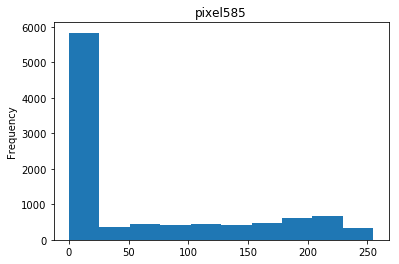

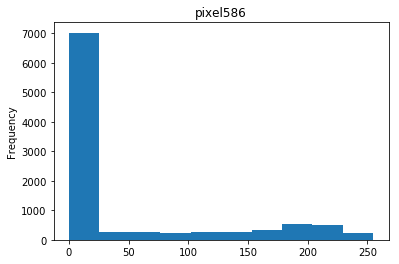

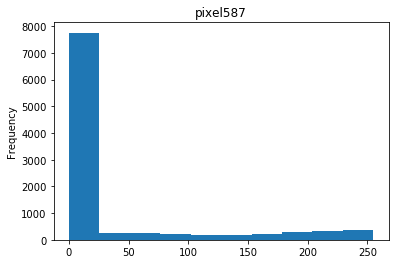

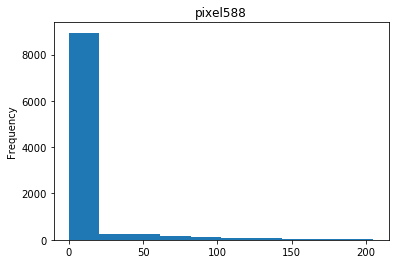

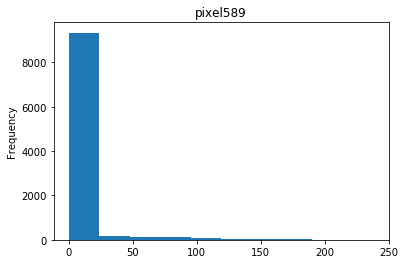

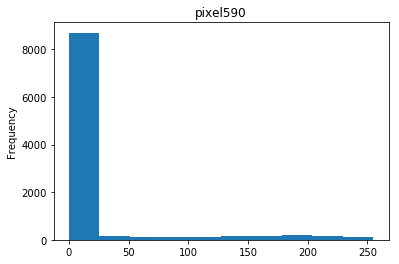

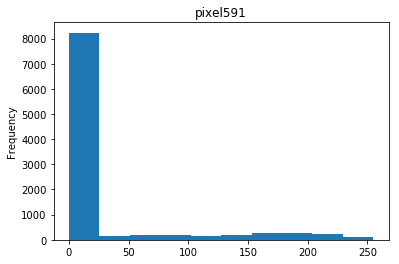

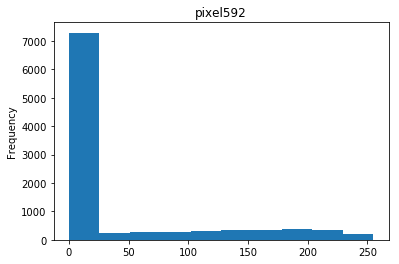

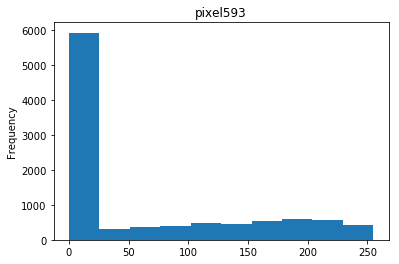

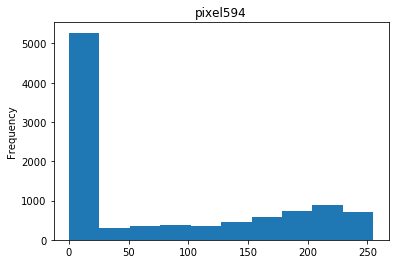

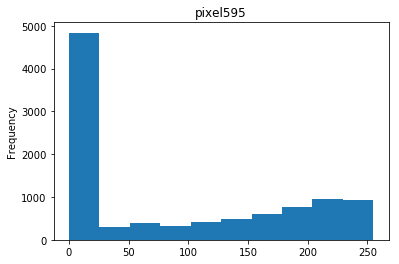

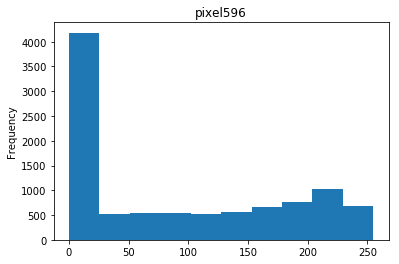

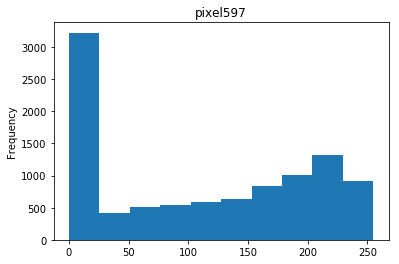

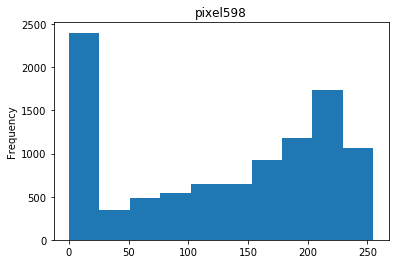

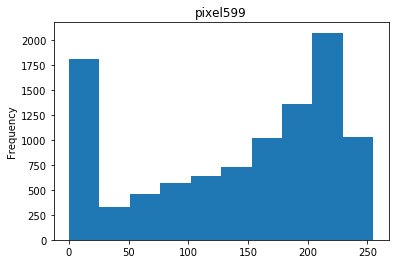

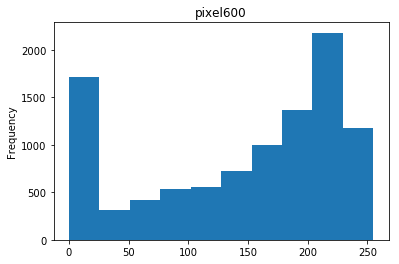

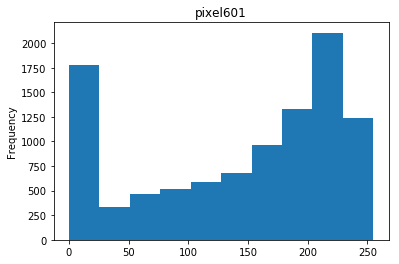

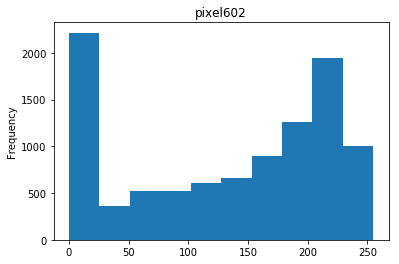

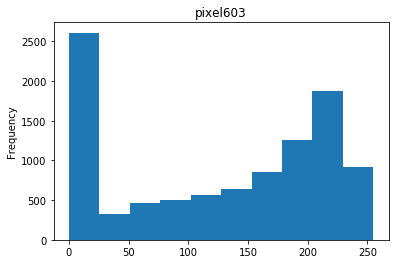

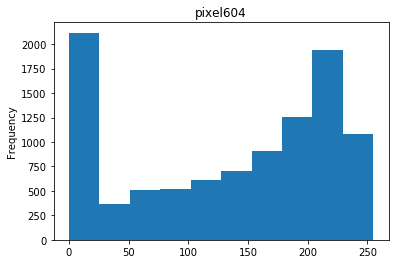

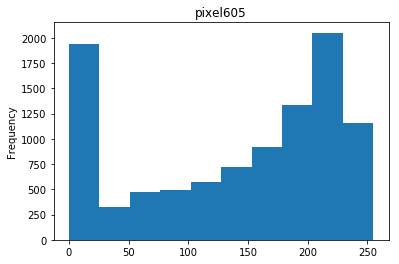

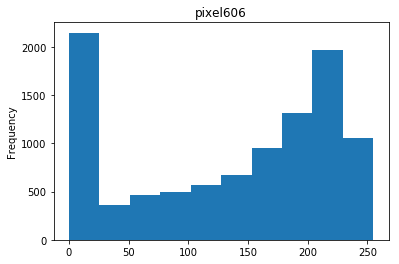

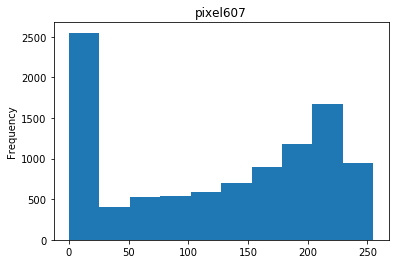

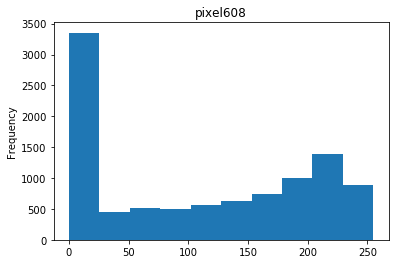

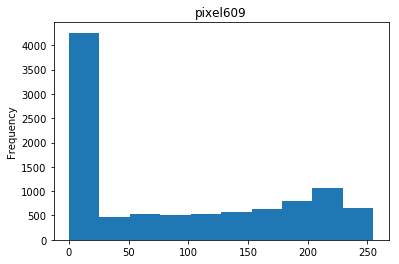

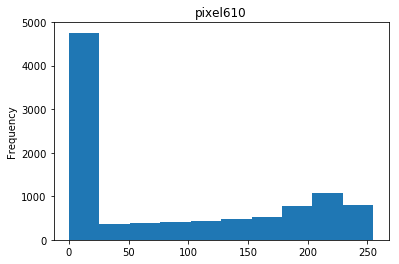

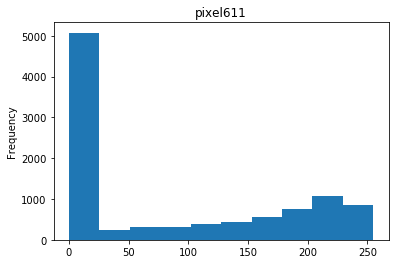

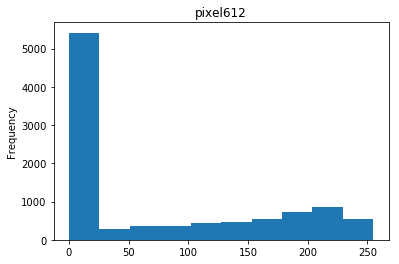

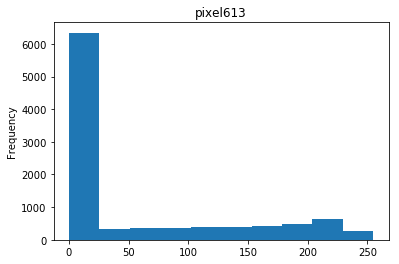

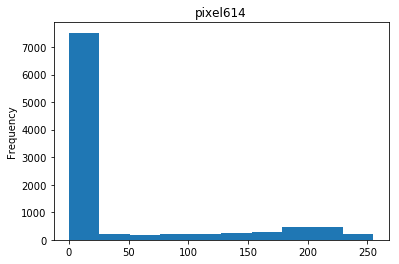

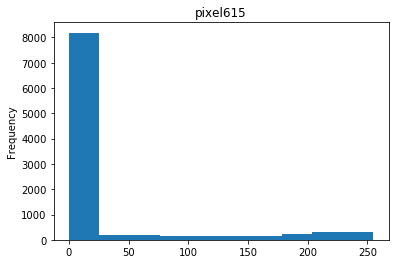

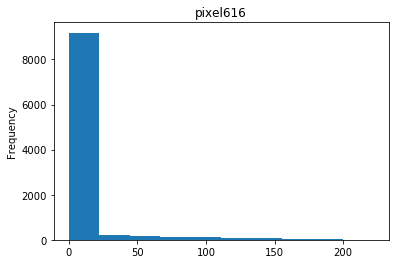

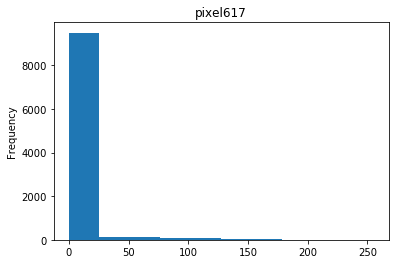

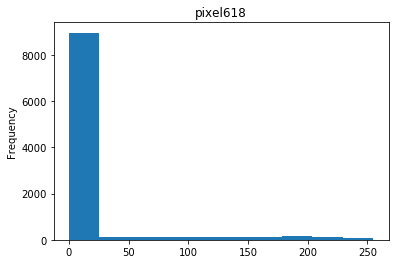

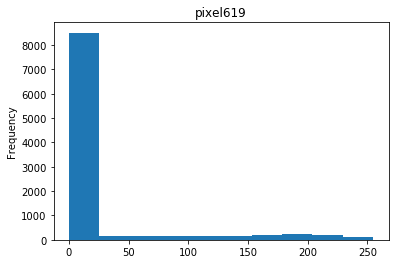

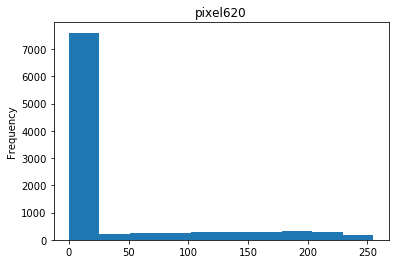

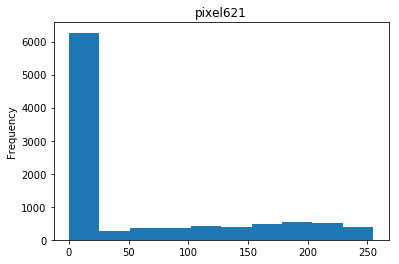

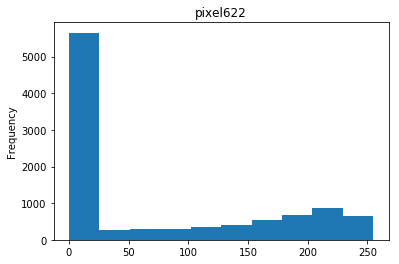

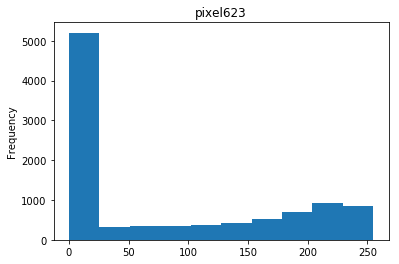

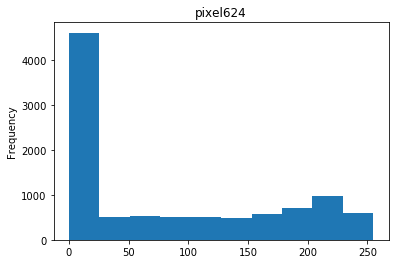

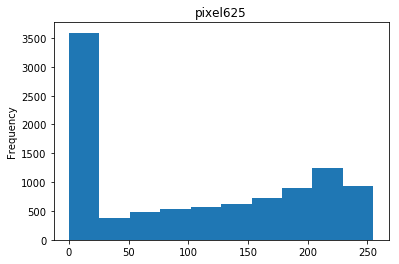

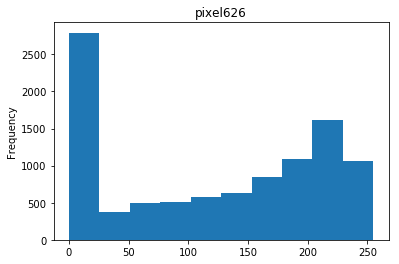

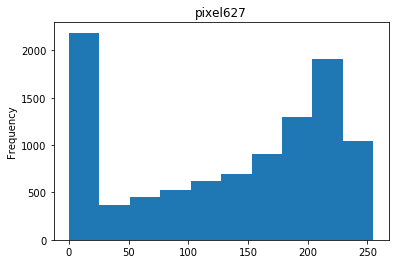

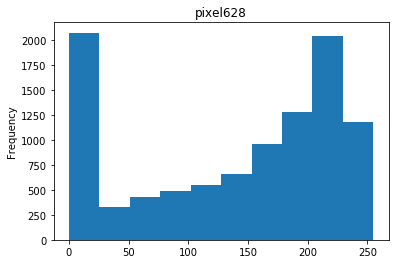

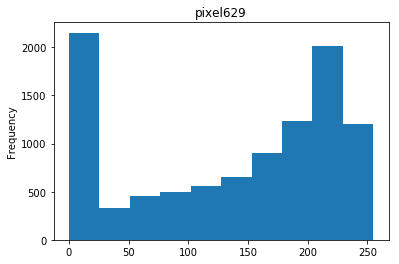

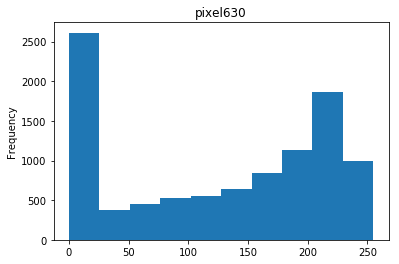

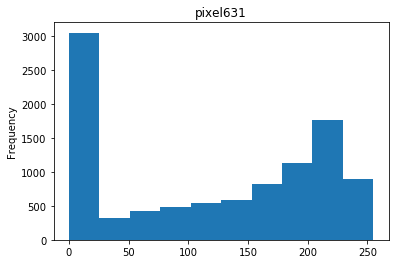

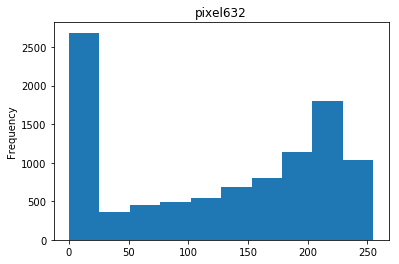

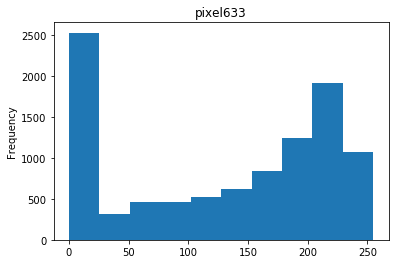

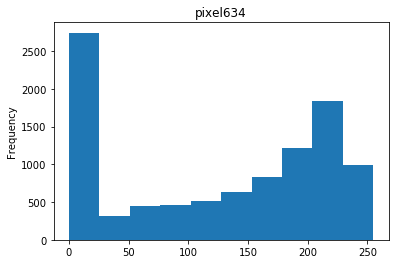

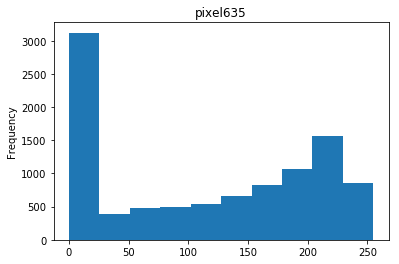

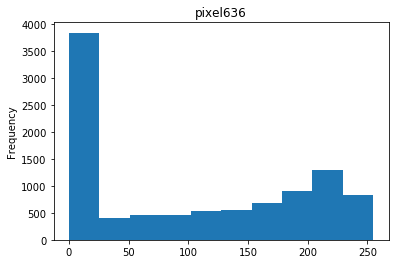

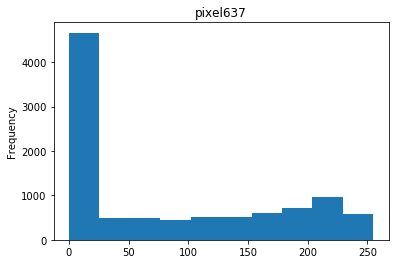

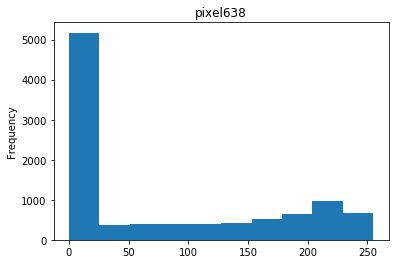

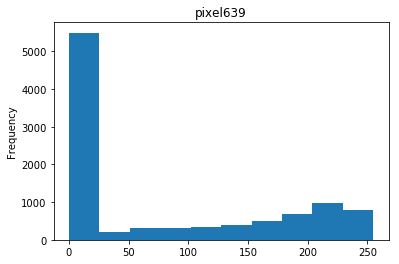

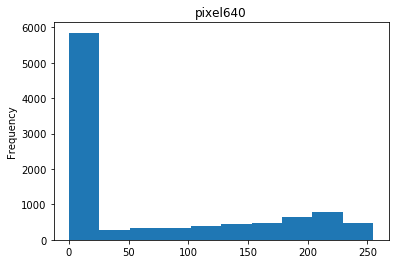

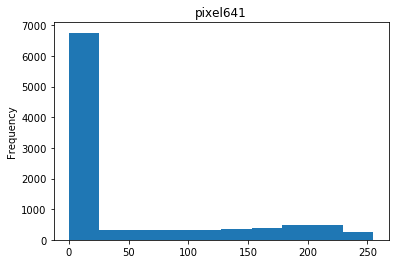

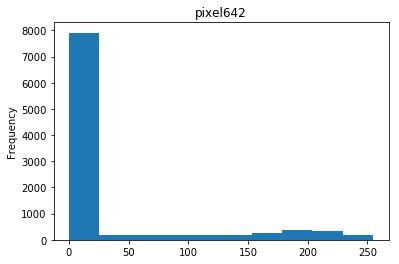

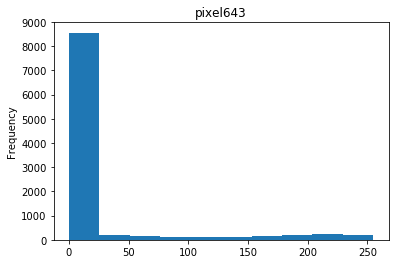

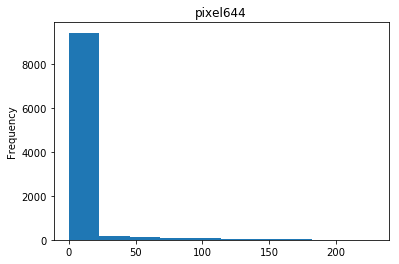

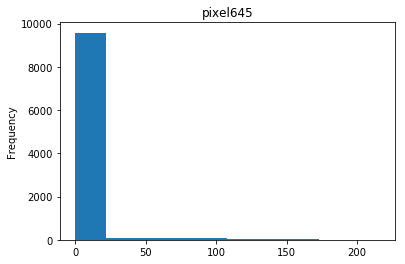

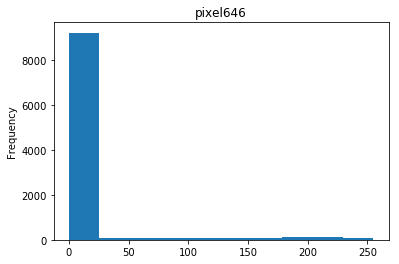

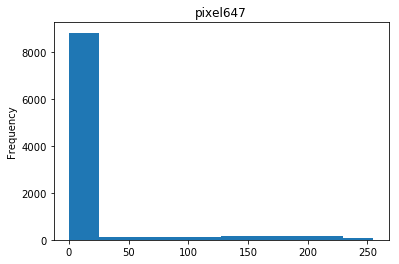

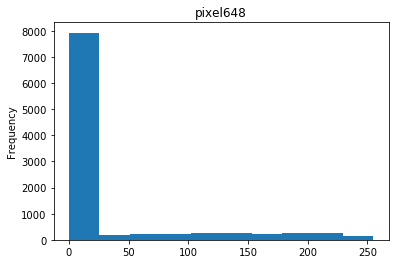

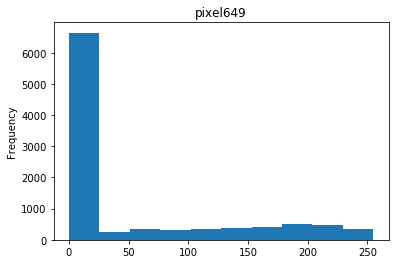

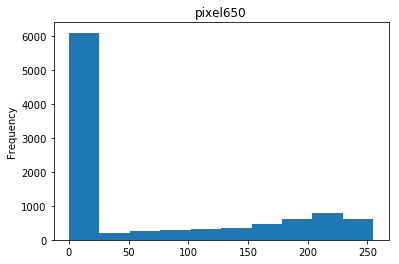

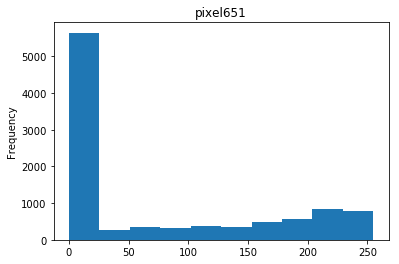

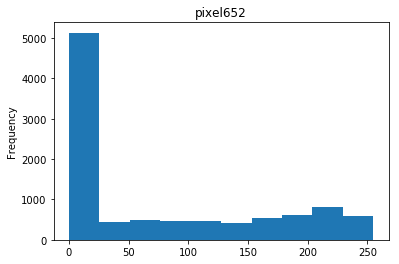

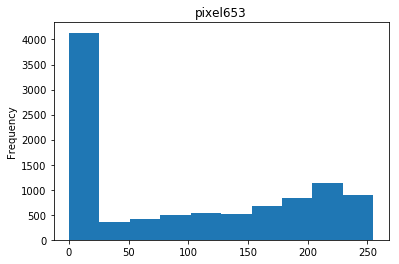

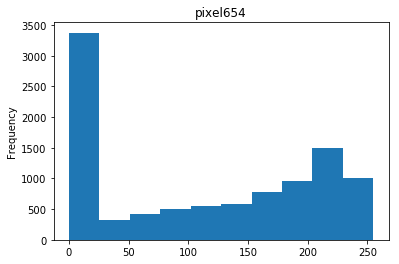

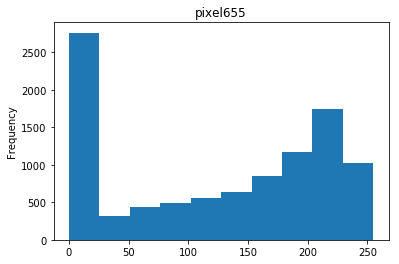

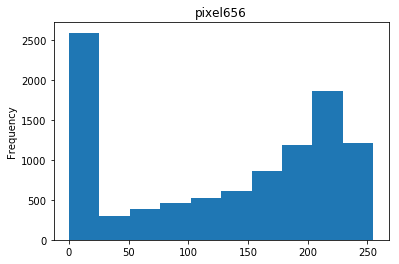

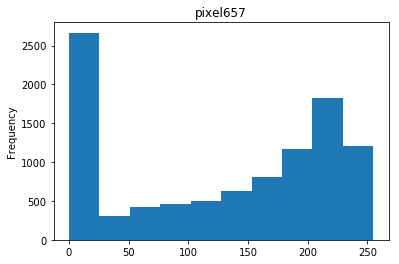

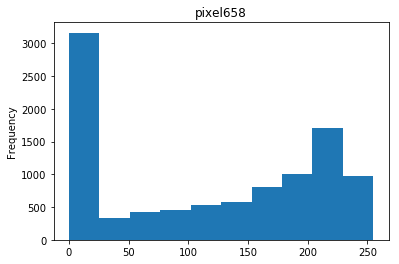

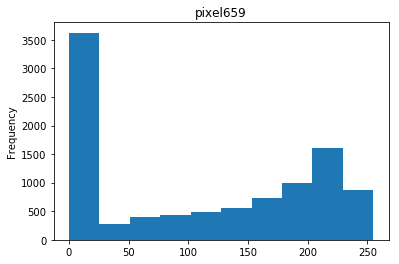

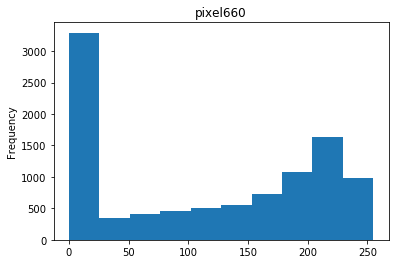

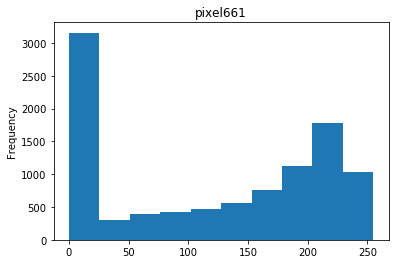

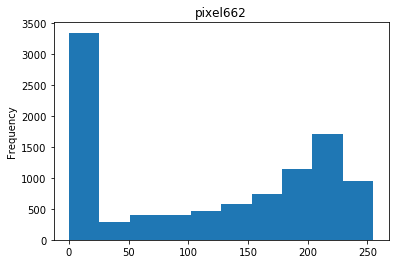

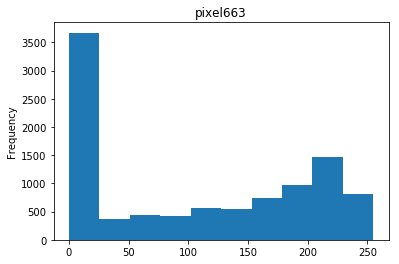

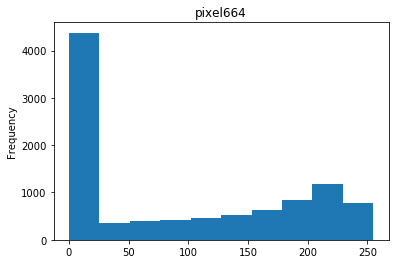

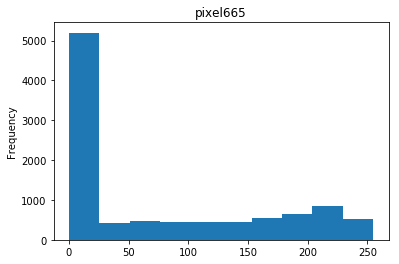

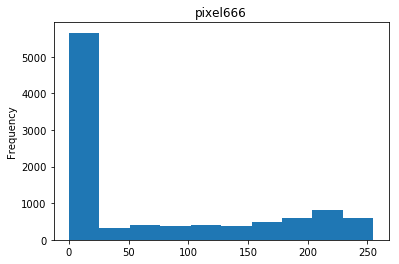

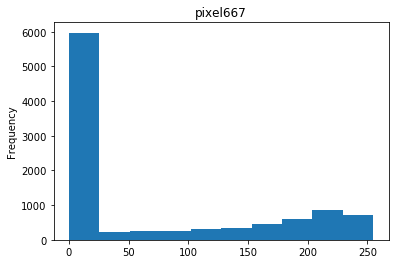

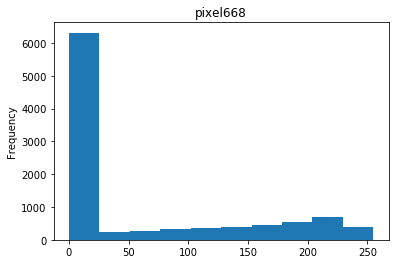

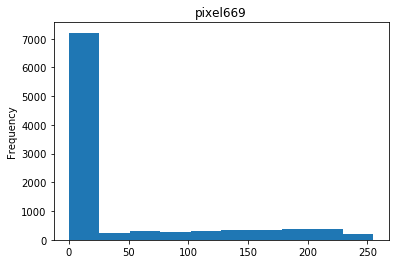

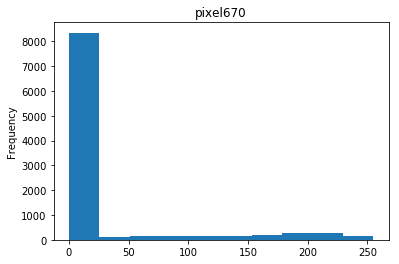

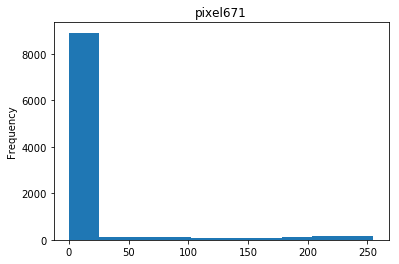

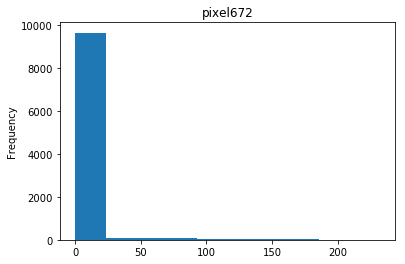

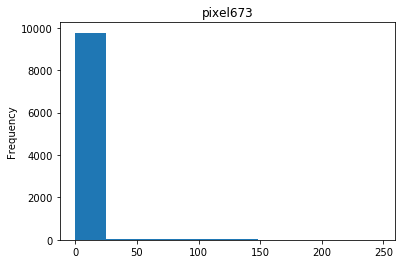

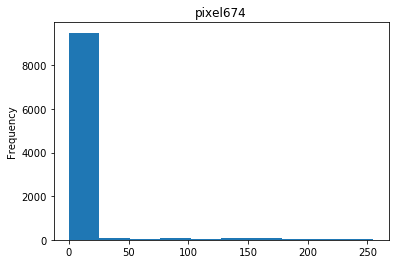

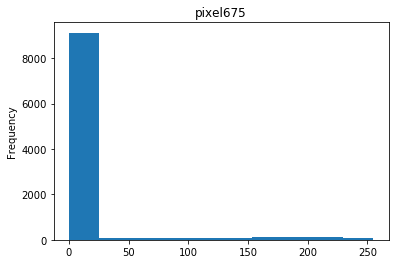

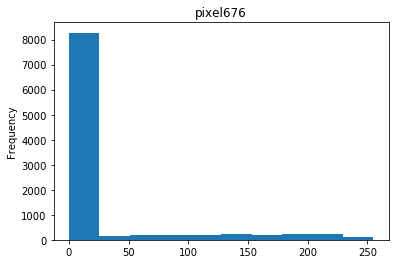

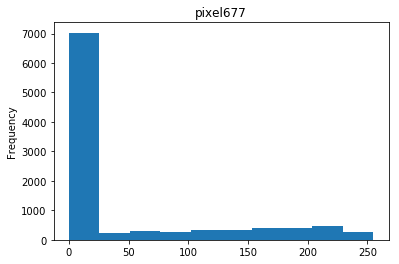

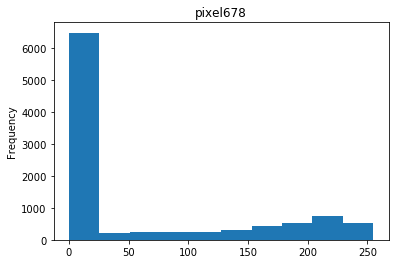

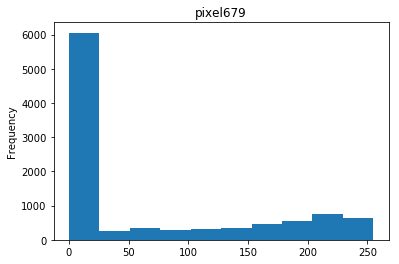

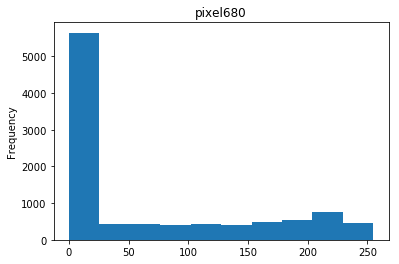

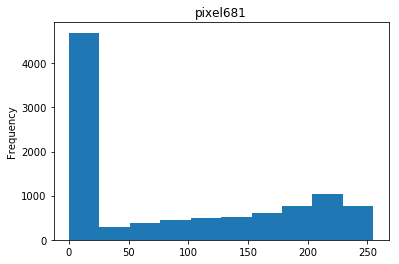

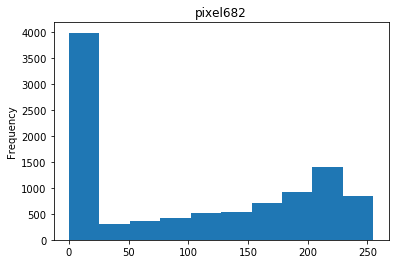

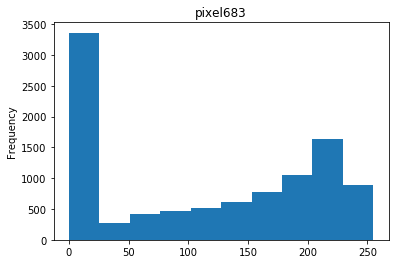

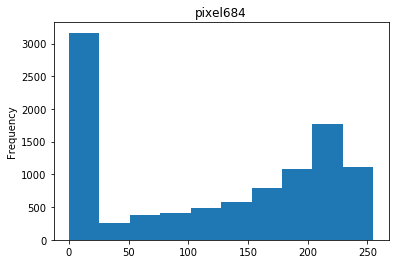

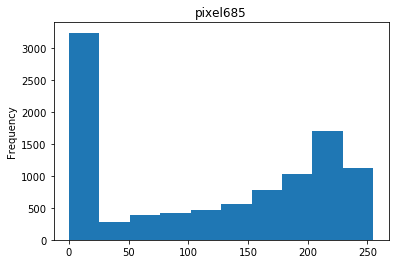

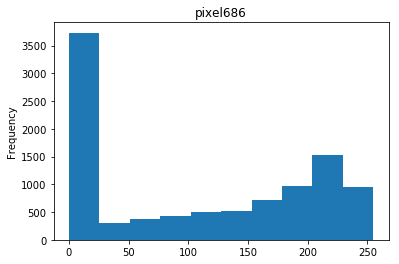

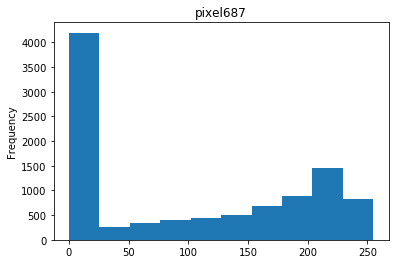

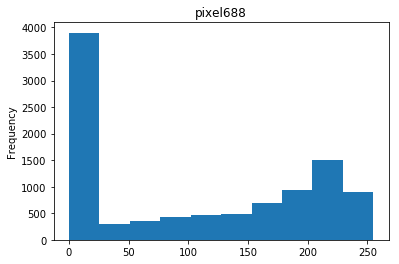

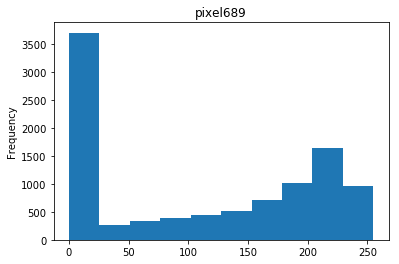

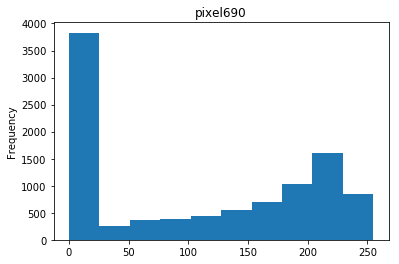

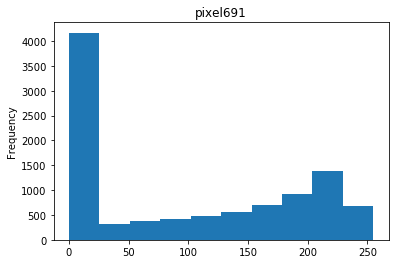

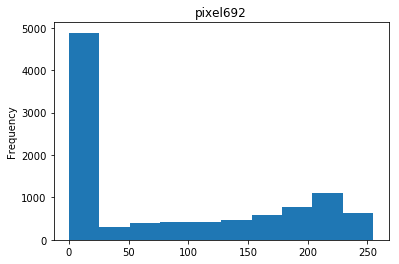

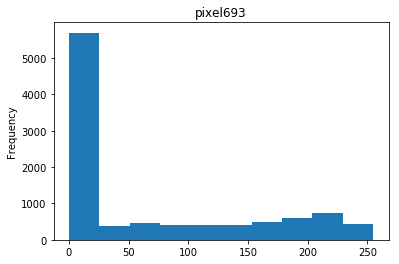

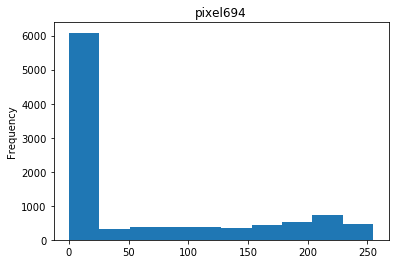

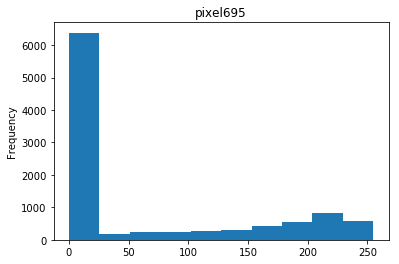

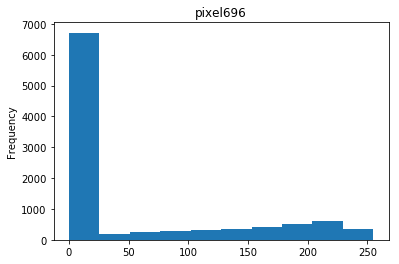

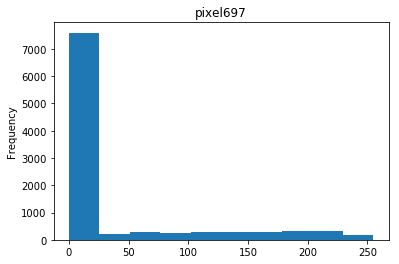

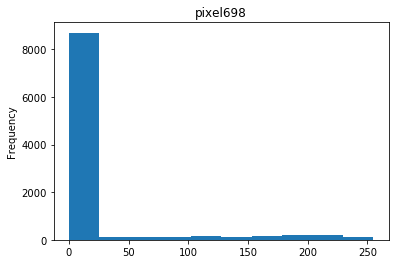

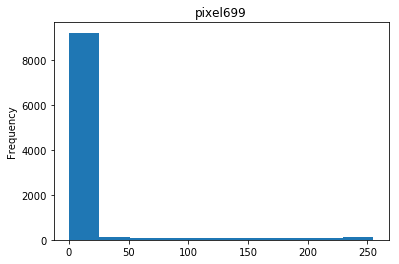

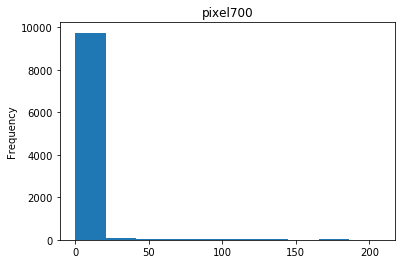

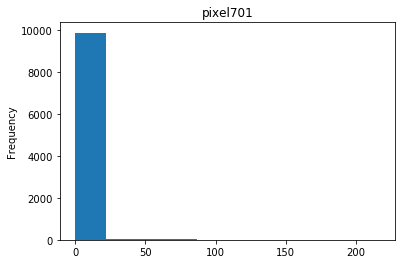

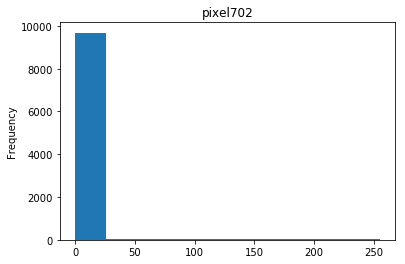

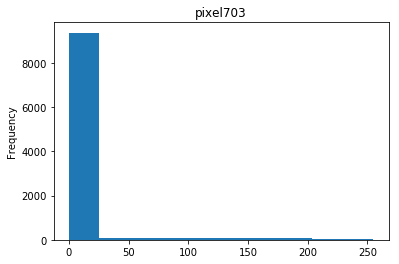

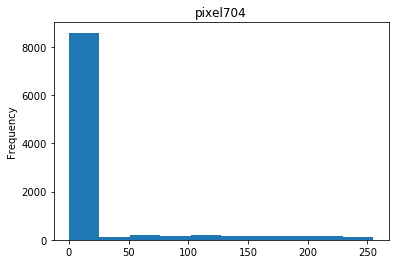

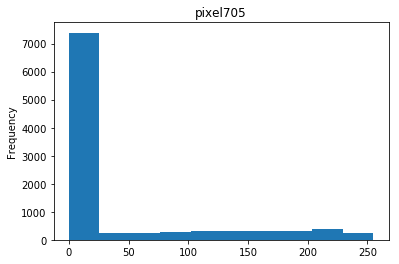

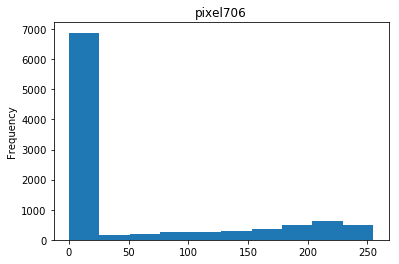

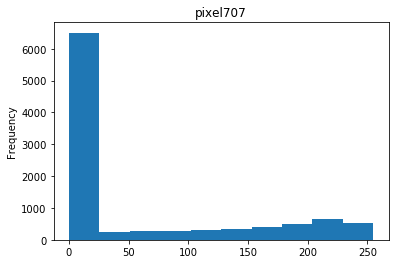

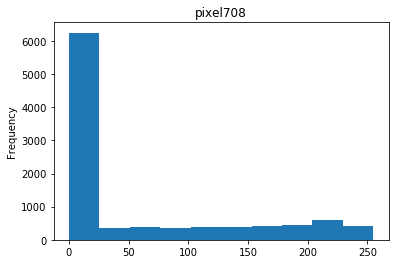

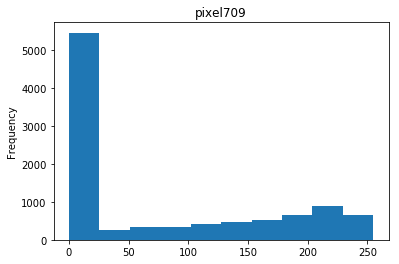

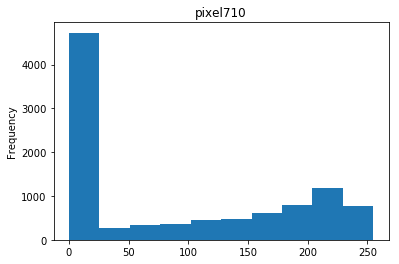

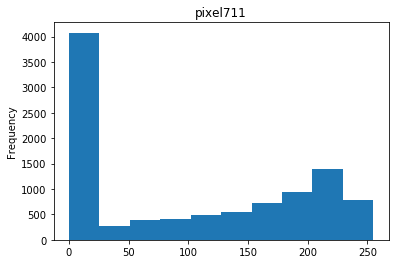

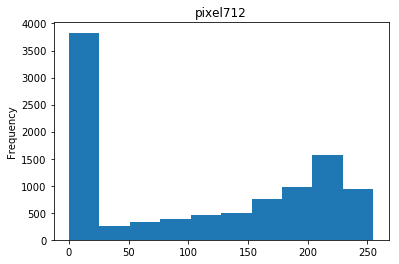

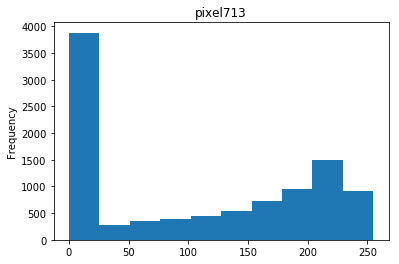

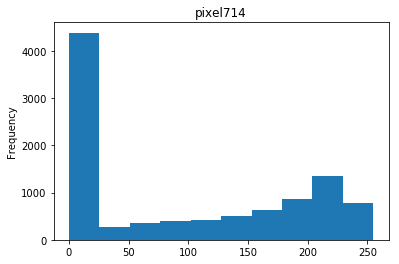

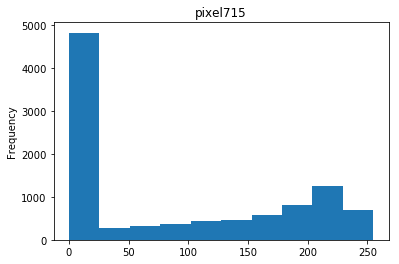

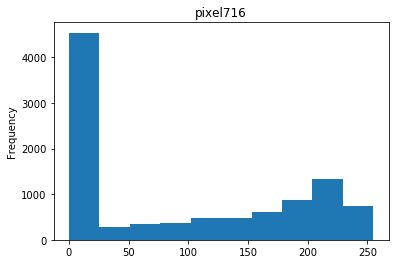

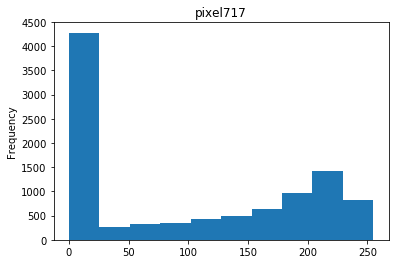

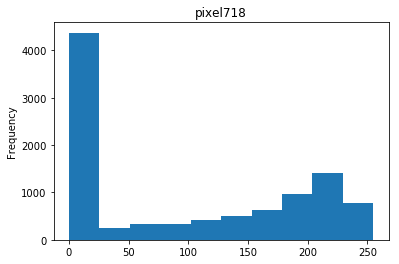

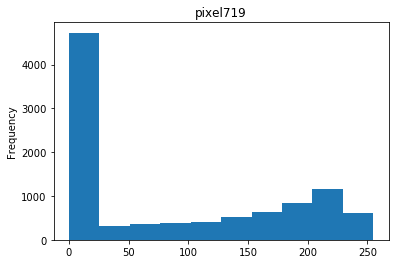

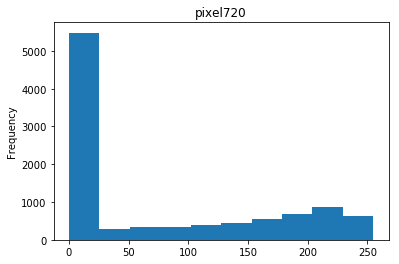

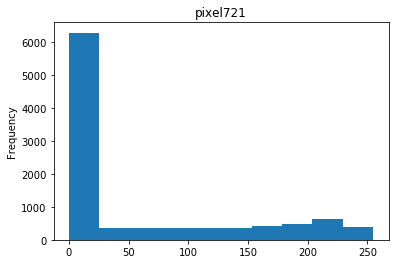

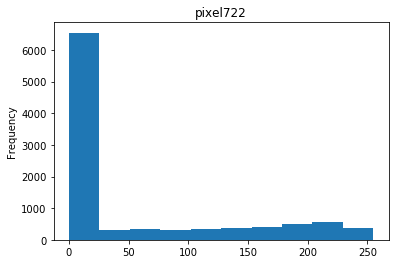

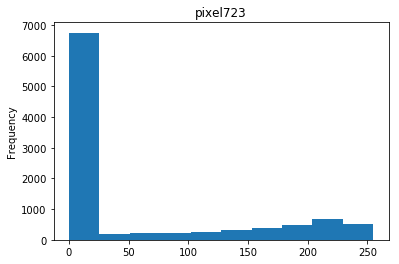

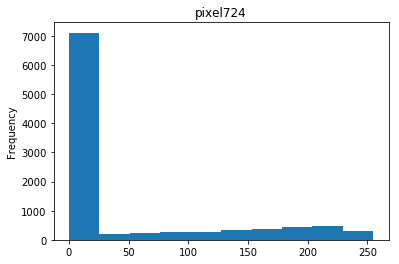

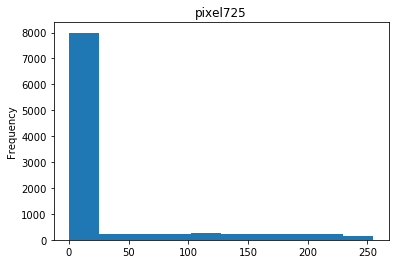

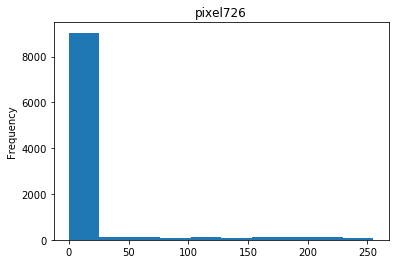

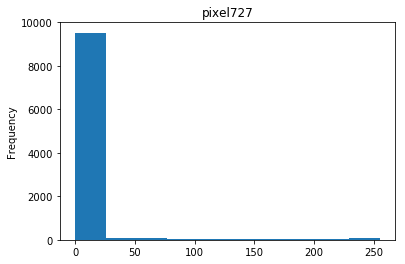

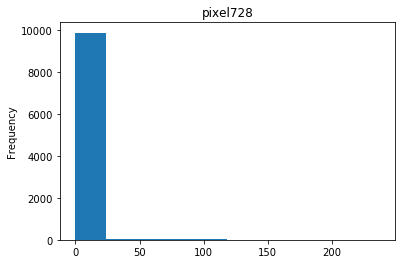

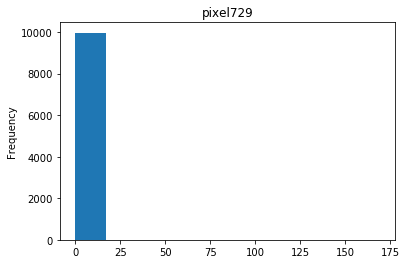

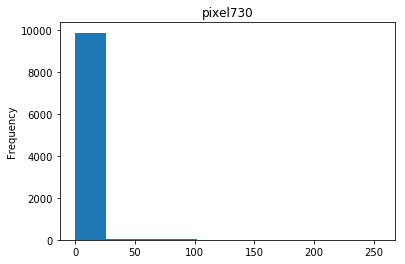

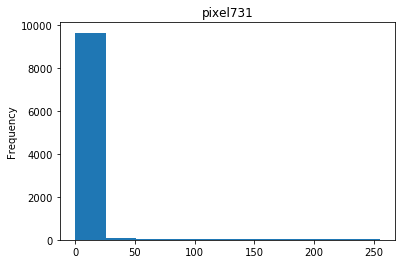

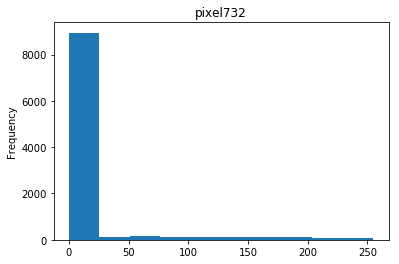

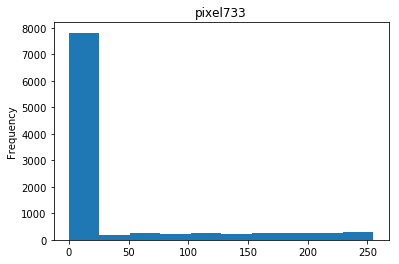

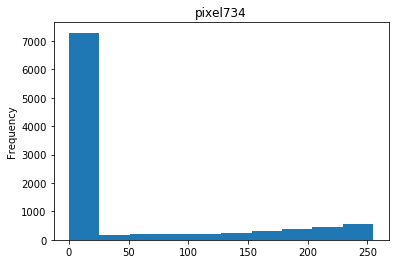

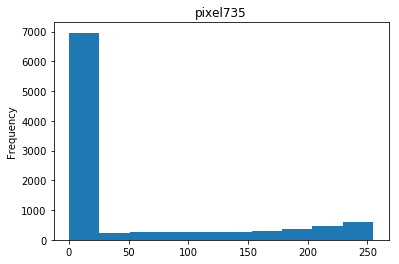

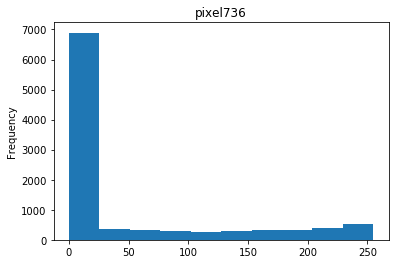

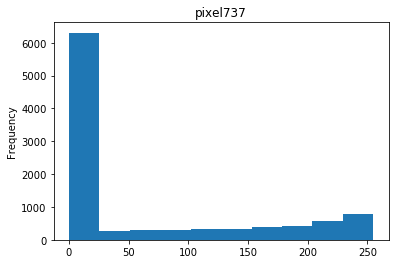

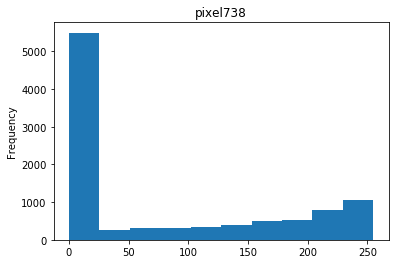

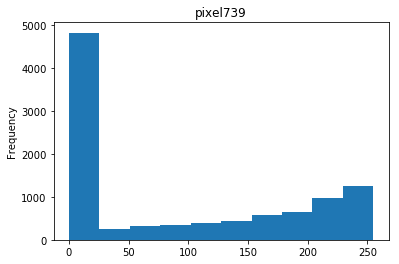

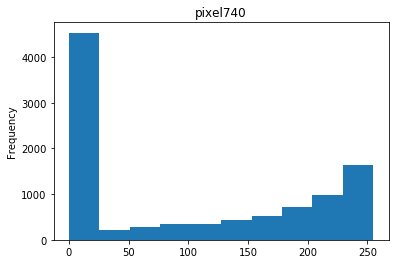

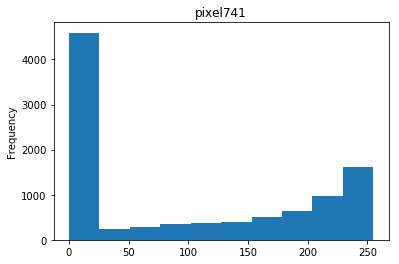

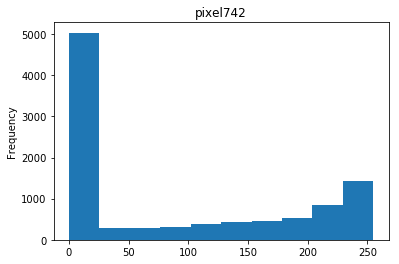

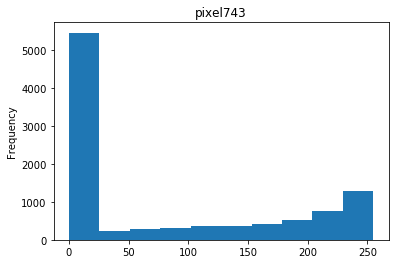

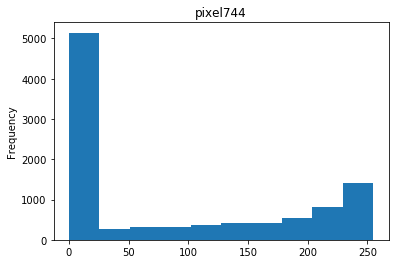

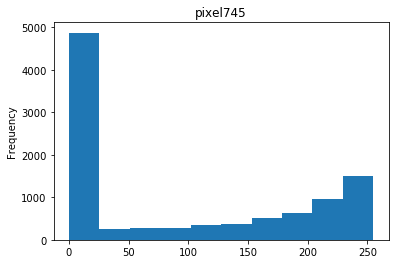

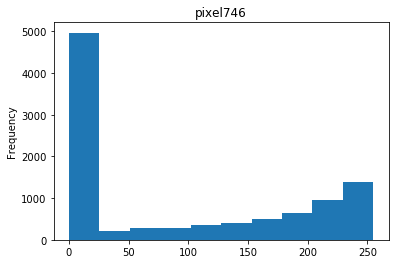

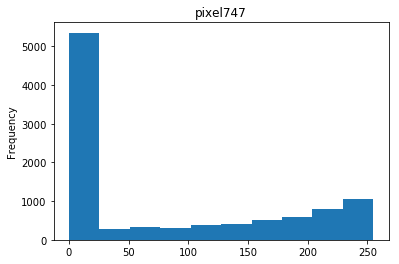

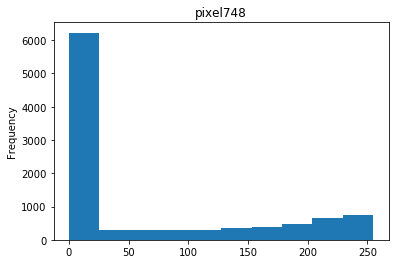

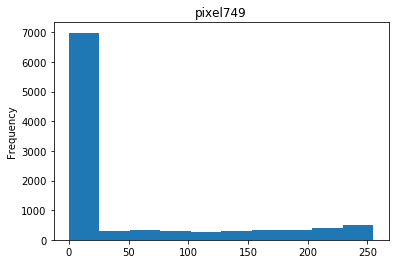

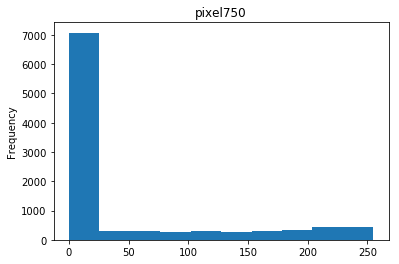

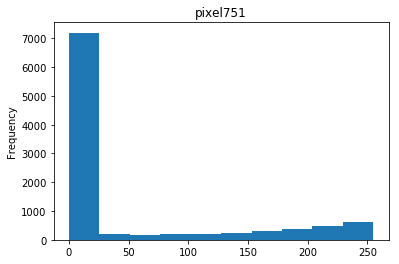

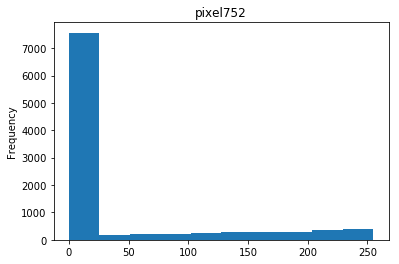

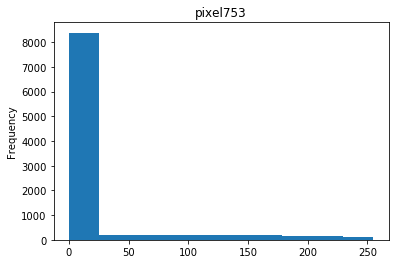

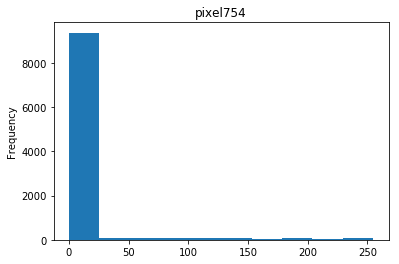

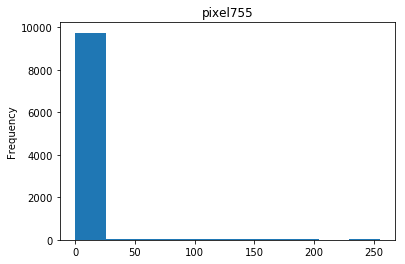

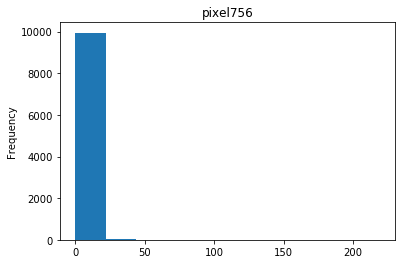

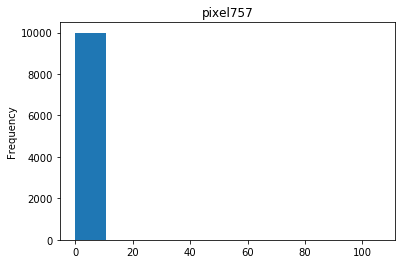

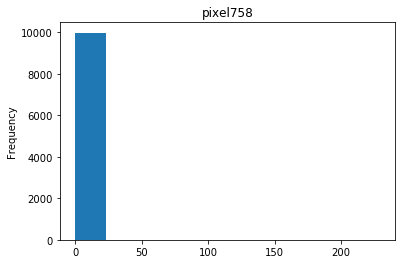

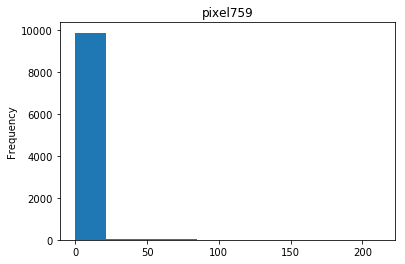

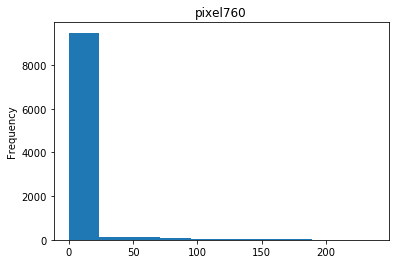

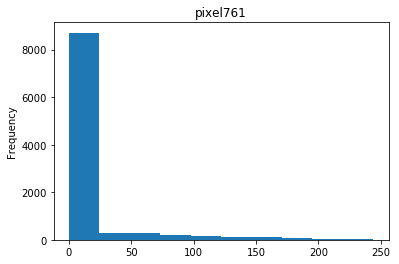

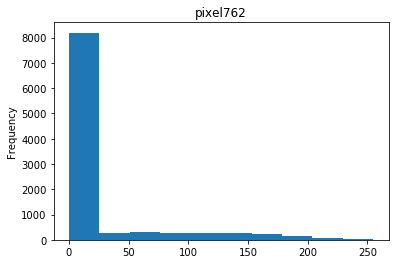

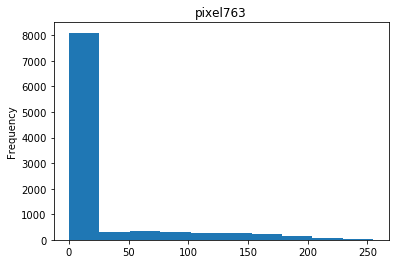

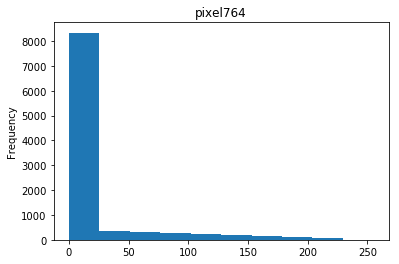

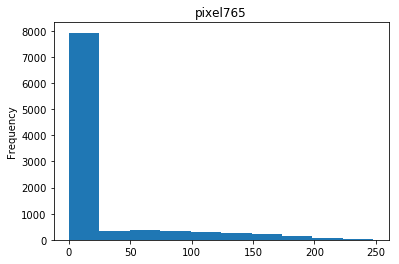

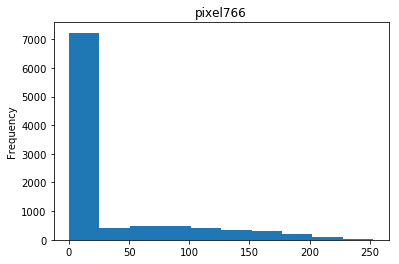

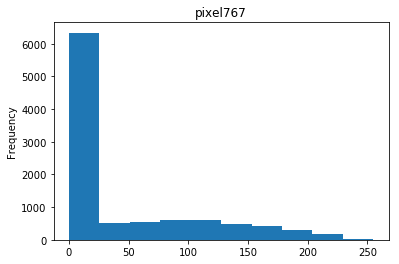

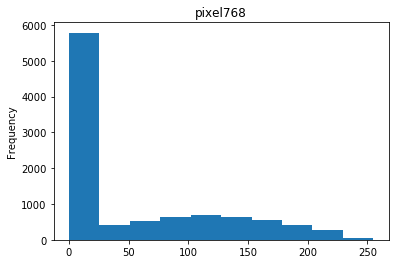

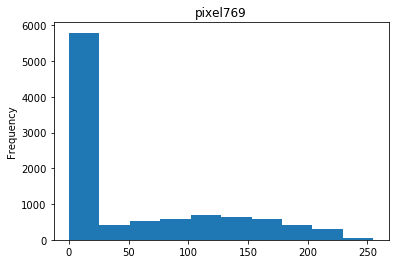

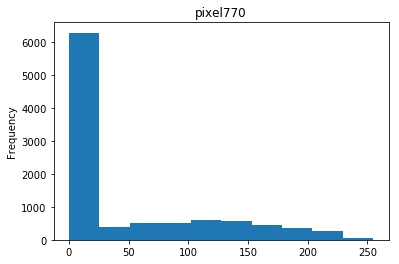

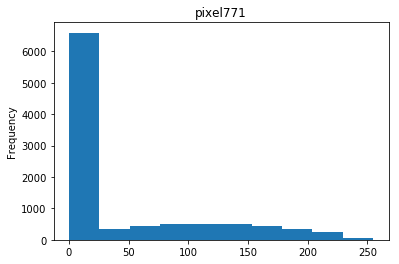

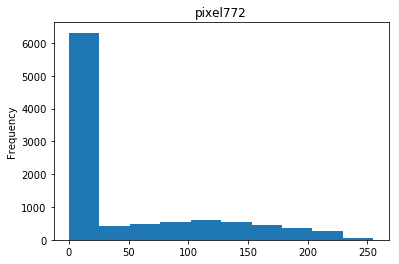

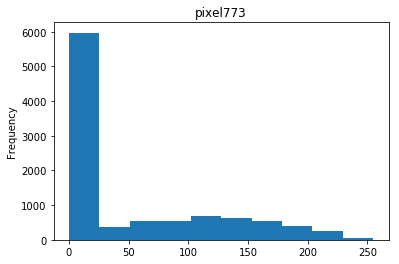

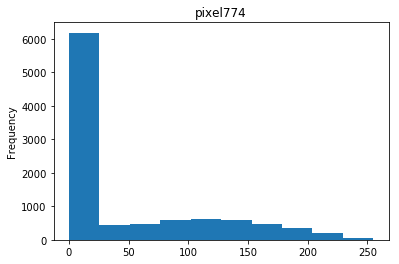

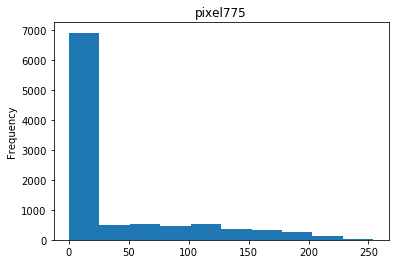

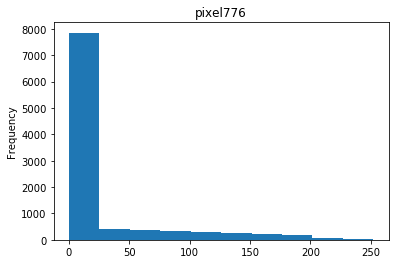

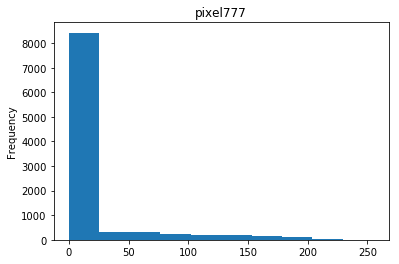

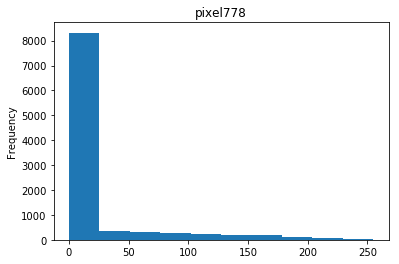

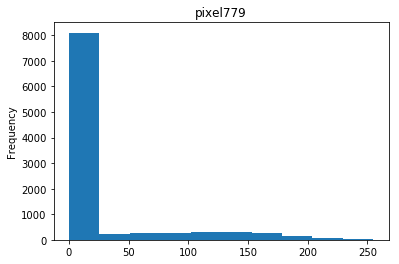

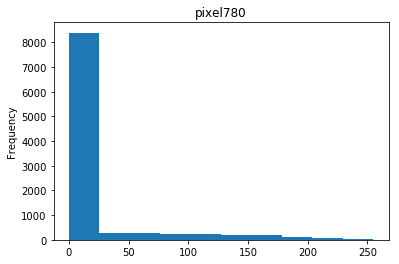

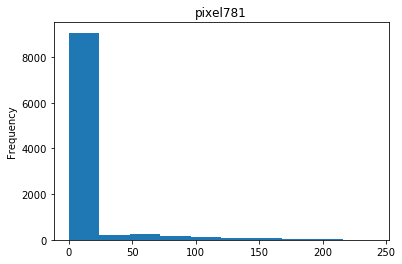

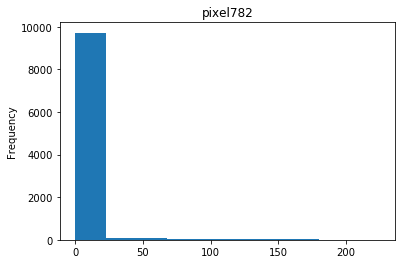

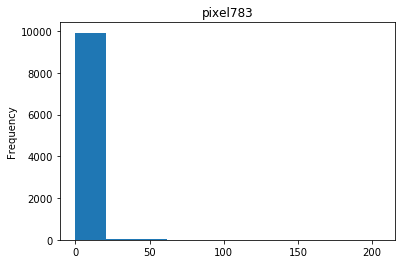

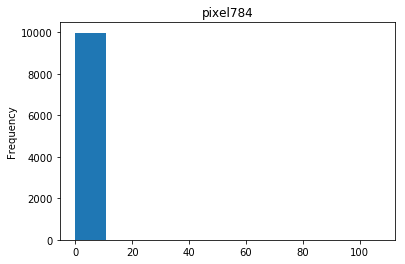

In [ ]:
data_viz(dataset)

label


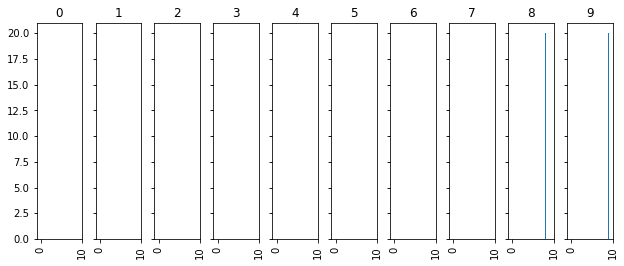

pixel1


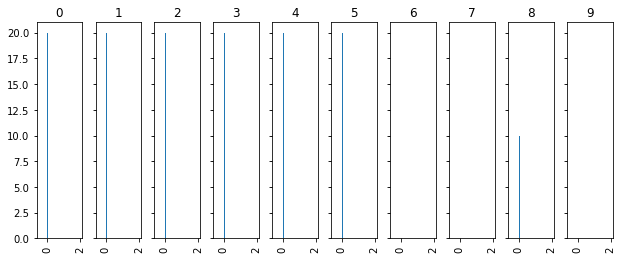

pixel2


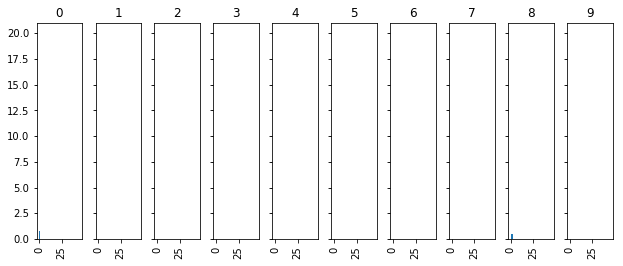

pixel3


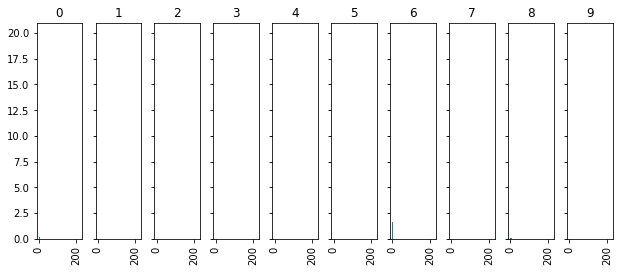

pixel4


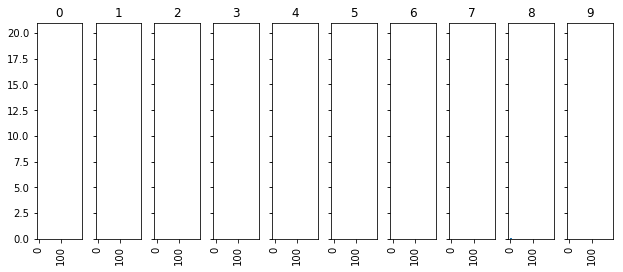

pixel5


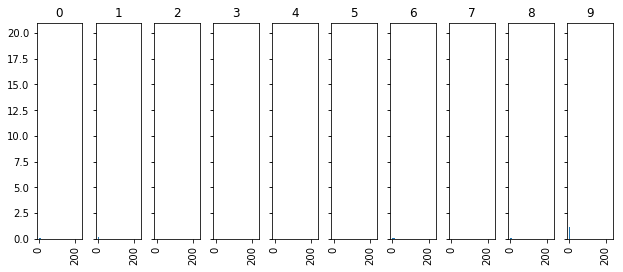

pixel6


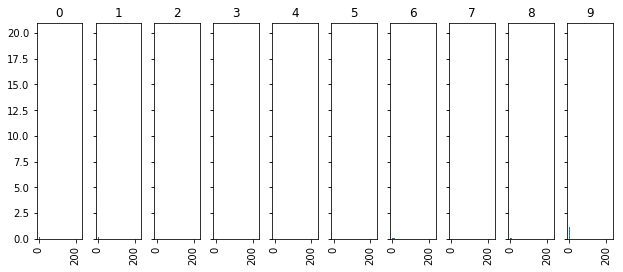

pixel7


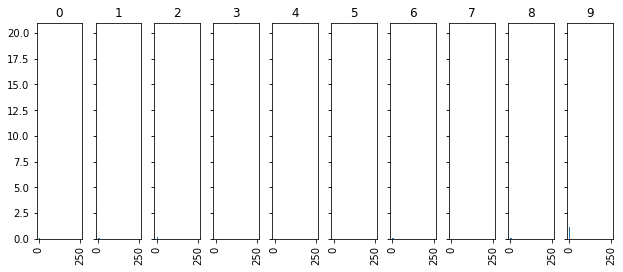

pixel8


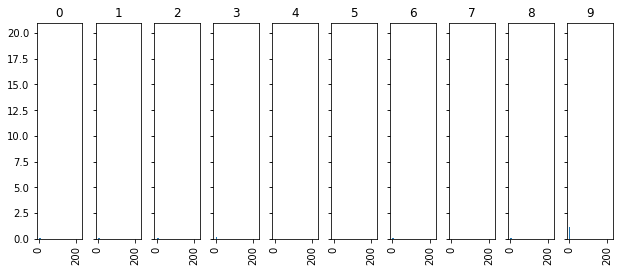

pixel9


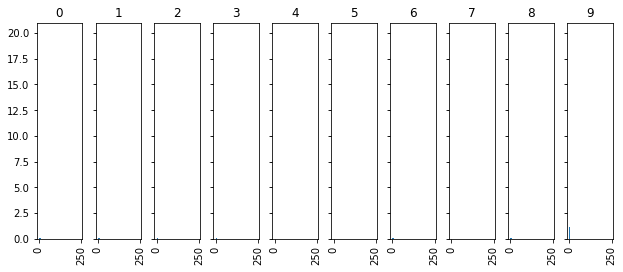

pixel10


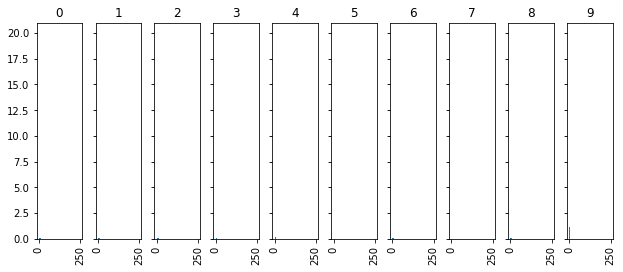

pixel11


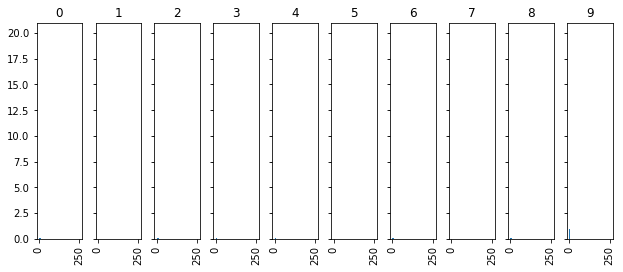

pixel12


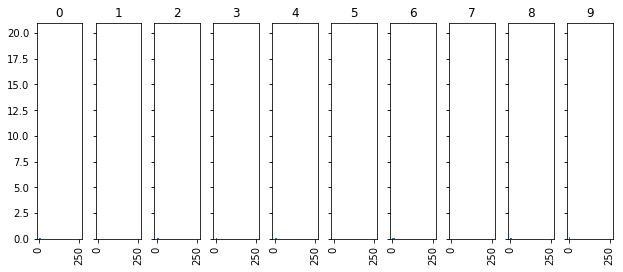

pixel13


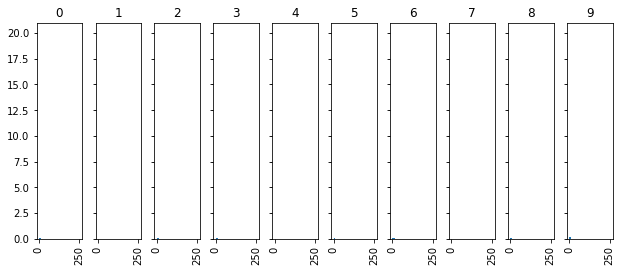

pixel14


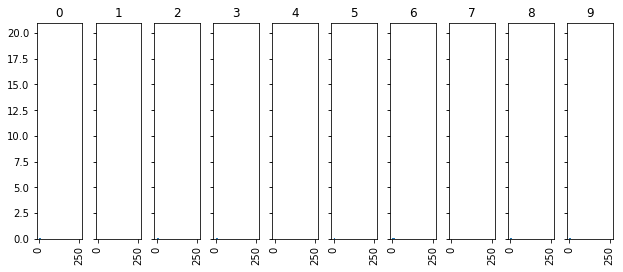

pixel15


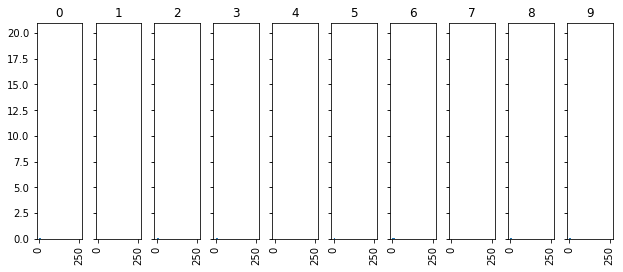

pixel16


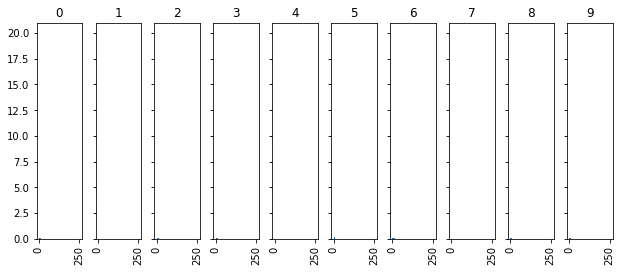

pixel17


In [ ]:
data_viz_target(dataset, "label")